In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib, os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
import numpy as np
pd.set_option('precision', 4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/',
              model_directory+'/baseline/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], k))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))


baseline_cols = [c for c in gather_df.columns if any(pattern in c for pattern in ['PriA-SSB FP', 'RMI-FANCM FP', 'Mean', 'Median'])]
gather_df.loc[('baseline', 'test_metrics'), baseline_cols] = 0
gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df)
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

ROC AUC PriA-SSB AS               ROC AUC PriA-SSB FP               ROC AUC RMI-FANCM FP             BEDROC AUC PriA-SSB AS            BEDROC AUC PriA-SSB FP            BEDROC AUC RMI-FANCM FP       PR auc.integral PriA-SSB AS       PR auc.integral PriA-SSB FP      PR auc.integral RMI-FANCM FP             NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP            NEF_0.1 % RMI-FANCM FP             NEF_0.15 % PriA-SSB AS            NEF_0.15 % PriA-SSB FP           NEF_0.15 % RMI-FANCM FP              NEF_0.5 % PriA-SSB AS             NEF_0.5 % PriA-SSB FP             NEF_0.5 % RMI-FANCM FP                NEF_1 % PriA-SSB AS               NEF_1 % PriA-SSB FP               NEF_1 % RMI-FANCM FP                NEF_2 % PriA-SSB AS               NEF_2 % PriA-SSB FP               NEF_2 % RMI-FANCM FP                NEF_5 % PriA-SSB AS               NEF_5 % PriA-SSB FP               NEF_5 % RMI-FANCM FP               NEF_10 % PriA-SSB AS  \
0                 RandomForest_e, 1.0           SingleRegression_a, 1.0                RandomForest_a, 1.0                      baseline, 1.0           SingleRegression_b, 1.0                         IRV_d, 1.0           SingleRegression_a, 1.0           SingleRegression_b, 1.0       SingleClassification_b, 1.0                        IRV_d, 1.0           SingleRegression_b, 1.0           SingleRegression_b, 1.0            SingleRegression_a, 1.0           SingleRegression_b, 1.0                        IRV_a, 1.0        SingleClassification_b, 1.0           SingleRegression_b, 1.0        SingleClassification_b, 1.0                      baseline, 1.0           SingleRegression_b, 1.0        SingleClassification_b, 1.0        SingleClassification_a, 1.0           SingleRegression_a, 1.0        SingleClassification_a, 1.0                      baseline, 1.0           SingleRegression_a, 1.0                RandomForest_h, 1.0                      baseline, 1.0   
1         SingleClassification_a, 2.0           SingleRegression_b, 2.0                RandomForest_h, 1.0                RandomForest_c, 1.0           SingleRegression_a, 2.0                RandomForest_e, 1.0       SingleClassification_b, 1.0               Docking_hybrid, 2.0       SingleClassification_a, 1.0               RandomForest_a, 1.0               Docking_hybrid, 1.0                        IRV_a, 1.0                         IRV_c, 1.0               Docking_hybrid, 1.0           SingleRegression_b, 2.0                         IRV_d, 2.0               Docking_hybrid, 2.0        SingleClassification_a, 1.0                RandomForest_c, 1.0           SingleRegression_a, 1.0        SingleClassification_a, 1.0                      baseline, 2.0                        IRV_e, 2.0                RandomForest_h, 1.0                RandomForest_c, 1.0           SingleRegression_b, 2.0                RandomForest_g, 1.0                RandomForest_d, 1.0   
2                 RandomForest_f, 2.0                        IRV_e, 3.0                RandomForest_g, 1.0                         IRV_c, 1.0                        IRV_e, 3.0         MultiClassification_b, 1.0        MultiClassification_b, 1.0                        IRV_a, 2.0        MultiClassification_b, 3.0           SingleRegression_a, 1.0                        IRV_a, 1.0       SingleClassification_a, 3.0                         IRV_d, 3.0                        IRV_a, 1.0       SingleClassification_b, 3.0                RandomForest_d, 2.0                        IRV_a, 2.0                RandomForest_f, 1.0                         IRV_b, 1.0         ConsensusDocking_max, 3.0                RandomForest_h, 1.0                RandomForest_c, 2.0           SingleRegression_b, 3.0                RandomForest_f, 1.0                         IRV_c, 1.0         ConsensusDocking_max, 3.0                RandomForest_e, 3.0            SingleRegression_b, 1.0   
3                       baseline, 4.0               RandomForest_h, 3.0                RandomForest_e, 1.0            SingleRegres

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

n_hits_100 PriA-SSB AS                             n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM FP                             n_hits_250 PriA-SSB AS                             n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM FP        n_hits_500 PriA-SSB AS                             n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM FP                        n_hits_1000 PriA-SSB AS                            n_hits_1000 PriA-SSB FP n_hits_1000 RMI-FANCM FP                 n_hits_2500 PriA-SSB AS                            n_hits_2500 PriA-SSB FP  n_hits_2500 RMI-FANCM FP                 n_hits_5000 PriA-SSB AS                            n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM FP      n_hits_10000 PriA-SSB AS                           n_hits_10000 PriA-SSB FP                          n_hits_10000 RMI-FANCM FP
0   PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....                 NEF_1 %                                            NEF_2 %  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...                 NEF_2 %      PR auc.integral, NEF_1 %  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...                 NEF_5 %  BEDROC AUC, PR auc.integral, NEF_5 %, NEF AUC  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....        NEF_10 %, NEF AUC  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_5...                  NEF_20 %  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....                 NEF_20 %                       NEF_1 %  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...
1                        BEDROC AUC, NEF_5 %, NEF AUC                                   ROC AUC, NEF_5 %         PR auc.integral  ROC AUC, BEDROC AUC, NEF_0.15 %, NEF_1 %, NEF_...  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10...         PR auc.integral  BEDROC AUC, NEF_5 %, NEF AUC                                            NEF_2 %         PR auc.integral                             NEF_10 %, NEF_20 %                                   ROC AUC, NEF_5 %               BEDROC AUC                                NEF_20 %  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_2 ...                   NEF AUC                                 NEF_1 %                      BEDROC AUC, NEF_5 %, NEF_20 %                  NEF AUC                       NEF_5 %   BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10 %                                                   
2                                             NEF_2 %                                            NEF_2 %              NEF_0.15 %               PR auc.integral, NEF_0.5 %, NEF_10 %                                                           NEF_1 %, NEF_5 %                     NEF_0.5 %                                                                 BEDROC AUC                               NEF_1 %, NEF_2 %                                            NEF_2 %                 NEF_20 %                                 NEF_1 %                                                                      ROC AUC               PR auc.integral, NEF_20 %                                   ROC AUC, NEF_2 %                 NEF_10 %                     NEF_0.5 %                                                                                                      
3                                            NEF_10 %                                                                  NEF_0.1 %                                          NEF_0.1 %                                                                 BEDROC AUC                      NEF_10 %                                                                   NEF_10 %                                        ROC AUC                                                                     ROC AUC                         PR auc.integral                                                                     NEF_10 %                                 NEF_2 %

---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

overlap_perc
RandomForest_h                     0.5217
RandomForest_e                     0.2935
SingleRegression_b                 0.2935
SingleRegression_a                 0.2717
SingleClassification_b             0.2717
SingleClassification_a             0.2717
RandomForest_d                     0.2609
IRV_e                              0.2391
RandomForest_a                     0.2283
RandomForest_g                     0.2174
RandomForest_f                     0.1957
RandomForest_b                     0.1848
MultiClassification_b              0.1848
IRV_c                              0.1630
RandomForest_c                     0.1630
ConsensusDocking_efr1_opt          0.1304
IRV_d                              0.1196
LSTM_a                             0.1196
baseline                           0.1196
IRV_a                              0.0870
IRV_b                              0.0761
MultiClassification_a              0.0435
Docking_smina                      0.0326
Docking_dock6                      0.0326
Docking_plants                     0.0326
Docking_rdocktot                   0.0326
ConsensusDocking_max               0.0326
ConsensusDocking_median            0.0326
Docking_rdockint                   0.0326
ConsensusDocking_rocauc_opt        0.0326
Docking_hybrid                     0.0326
LSTM_b                             0.0326
Docking_surflex                    0.0326
Docking_ad4                        0.0326
Docking_fred                       0.0326
ConsensusDocking_mean              0.0326

In [6]:
get_overlap(agg_comp_dict, N=5)

overlap_perc
RandomForest_h                     0.8804
RandomForest_d                     0.8261
RandomForest_e                     0.8152
RandomForest_g                     0.7717
RandomForest_a                     0.7609
RandomForest_b                     0.7283
RandomForest_c                     0.7174
SingleClassification_a             0.6304
IRV_e                              0.6196
SingleClassification_b             0.5978
RandomForest_f                     0.5978
MultiClassification_b              0.5870
SingleRegression_b                 0.5217
IRV_d                              0.4674
IRV_c                              0.4457
SingleRegression_a                 0.4348
LSTM_a                             0.3696
ConsensusDocking_efr1_opt          0.3478
IRV_a                              0.3370
IRV_b                              0.3370
MultiClassification_a              0.3043
Docking_rdockint                   0.2500
Docking_plants                     0.2500
Docking_dock6                      0.2500
Docking_rdocktot                   0.2500
ConsensusDocking_max               0.2500
ConsensusDocking_rocauc_opt        0.2500
ConsensusDocking_median            0.2500
LSTM_b                             0.2500
Docking_surflex                    0.2500
Docking_fred                       0.2500
ConsensusDocking_mean              0.2500
Docking_smina                      0.2500
Docking_hybrid                     0.2500
Docking_ad4                        0.2500
baseline                           0.1630

## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

In [8]:
ordered_spearman_df

n_hits_100 PriA-SSB AS n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM FP n_hits_250 PriA-SSB AS n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM FP n_hits_500 PriA-SSB AS n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM FP n_hits_1000 PriA-SSB AS n_hits_1000 PriA-SSB FP n_hits_1000 RMI-FANCM FP n_hits_2500 PriA-SSB AS n_hits_2500 PriA-SSB FP n_hits_2500 RMI-FANCM FP n_hits_5000 PriA-SSB AS n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM FP n_hits_10000 PriA-SSB AS n_hits_10000 PriA-SSB FP n_hits_10000 RMI-FANCM FP
0                 NEF_1 %              NEF_0.5 %                 NEF_1 %                NEF_2 %                NEF_2 %                 NEF_5 %                NEF_1 %                NEF AUC                 NEF_5 %                 NEF AUC                NEF_10 %                 NEF_10 %                NEF_20 %                 NEF_5 %                 NEF_20 %                NEF_20 %                NEF_10 %                  NEF AUC                NEF_0.5 %                  NEF_5 %                   ROC AUC
1               NEF_0.5 %        PR auc.integral                 NEF_2 %                NEF_5 %             BEDROC AUC                 NEF_2 %                NEF AUC                NEF_1 %                 NEF_2 %              BEDROC AUC                 NEF AUC                  NEF AUC                NEF_10 %                 NEF AUC                  NEF AUC                 ROC AUC                 NEF AUC                 NEF_20 %                  NEF_1 %                  NEF AUC                BEDROC AUC
2                 NEF_5 %               NEF_10 %                 NEF_5 %                NEF_1 %                ROC AUC                 NEF_1 %             BEDROC AUC               NEF_10 %              BEDROC AUC                 NEF_5 %                 NEF_1 %               BEDROC AUC                 NEF AUC                 NEF_1 %                 NEF_10 %                NEF_10 %                 NEF_1 %                  ROC AUC                  NEF_2 %                  NEF_1 %           PR auc.integral
3                 NEF AUC                NEF AUC               NEF_0.5 %                NEF AUC                NEF_5 %               NEF_0.5 %                NEF_5 %                NEF_5 %                NEF_10 %                NEF_10 %                 NEF_5 %                 NEF_20 %              BEDROC AUC                NEF_10 %               BEDROC AUC                 NEF AUC                 NEF_5 %                 NEF_10 %                  NEF_5 %                 NEF_10 %                 NEF_0.1 %
4              BEDROC AUC                NEF_1 %              BEDROC AUC             BEDROC AUC                NEF AUC              BEDROC AUC               NEF_10 %               NEF_20 %                 NEF AUC                 NEF_1 %              BEDROC AUC                  NEF_5 %                 NEF_5 %                NEF_20 %                  ROC AUC              BEDROC AUC              BEDROC AUC               BEDROC AUC                  ROC AUC                  NEF_2 %                NEF_0.15 %
5                 NEF_2 %                NEF_5 %                NEF_10 %               NEF_10 %                NEF_1 %                NEF_10 %                NEF_2 %             BEDROC AUC               NEF_0.5 %                 NEF_2 %                NEF_20 %                  ROC AUC                 ROC AUC              BEDROC AUC                  NEF_2 %                 NEF_5 %                NEF_20 %                  NEF_2 %                  NEF AUC                 NEF_20 %                 NEF_0.5 %
6                NEF_10 %             BEDROC AUC                 NEF AUC                ROC AUC               NEF_10 %                 NEF AUC               NEF_20 %                NEF_2 %                 NEF_1 %                NEF_20 %                 NEF_2 %                  NEF_2 %                 NEF_1 %                 NEF_2 %                  NEF_5 %                 NEF_1 %                 NEF_2 %                  NEF_5 %               B

In [9]:
spearman_df

n_hits_100 PriA-SSB AS  n_hits_100 PriA-SSB FP  n_hits_100 RMI-FANCM FP  n_hits_250 PriA-SSB AS  n_hits_250 PriA-SSB FP  n_hits_250 RMI-FANCM FP  n_hits_500 PriA-SSB AS  n_hits_500 PriA-SSB FP  n_hits_500 RMI-FANCM FP  n_hits_1000 PriA-SSB AS  n_hits_1000 PriA-SSB FP  n_hits_1000 RMI-FANCM FP  n_hits_2500 PriA-SSB AS  n_hits_2500 PriA-SSB FP  n_hits_2500 RMI-FANCM FP  n_hits_5000 PriA-SSB AS  n_hits_5000 PriA-SSB FP  n_hits_5000 RMI-FANCM FP  n_hits_10000 PriA-SSB AS  n_hits_10000 PriA-SSB FP  n_hits_10000 RMI-FANCM FP
ROC AUC                          0.8609                  0.4918                   0.7391                  0.9176                  0.8700                   0.8150                  0.9090                  0.7281                   0.8313                   0.9119                   0.7271                    0.9208                   0.8971                   0.7284                    0.8917                   0.9058                   0.4993                    0.7973                    0.7718                    0.5226                        NaN
BEDROC AUC                       0.9025                  0.5944                   0.8275                  0.9320                  0.9979                   0.9036                  0.9718                  0.8282                   0.9011                   0.9766                   0.8285                    0.9672                   0.9336                   0.8271                    0.8966                   0.8576                   0.5862                    0.7632                    0.7582                    0.5594                        NaN
PR auc.integral                  0.3340                  1.0000                   0.4326                  0.3064                  0.5421                   0.4359                  0.3594                  0.6966                   0.4302                   0.3594                   0.7174                    0.2172                   0.3973                   0.6752                    0.2204                   0.3571                   0.5226                    0.1487                    0.1452                   -0.0294                        NaN
NEF_0.1 %                        0.4634                     NaN                   0.5478                  0.4251                     NaN                   0.4665                  0.4254                     NaN                   0.3854                   0.4254                      NaN                    0.2062                   0.4101                      NaN                    0.1504                   0.2541                      NaN                    0.1130                    0.3827                       NaN                        NaN
NEF_0.15 %                       0.5787                     NaN                   0.4394                  0.5939                     NaN                   0.3307                  0.5102                     NaN                   0.2823                   0.5023                      NaN                    0.1149                   0.3352                      NaN                    0.0003                   0.2349                      NaN                   -0.0401                    0.5841                       NaN                        NaN
NEF_0.5 %                        0.9539                  1.0000                   0.8491                  0.9023                  0.5421                   0.9108                  0.9123                  0.6966                   0.8844                   0.8463                   0.7174                    0.7668                   0.7602                   0.6752                    0.6479                   0.6736                   0.5226                    0.5617                    0.8631                   -0.0294                        NaN
NEF_1 %                          0.9885                  0.6966                   0.9963                  0.9544                  0.8159                   0.9115                  0.9739                  1.0000              

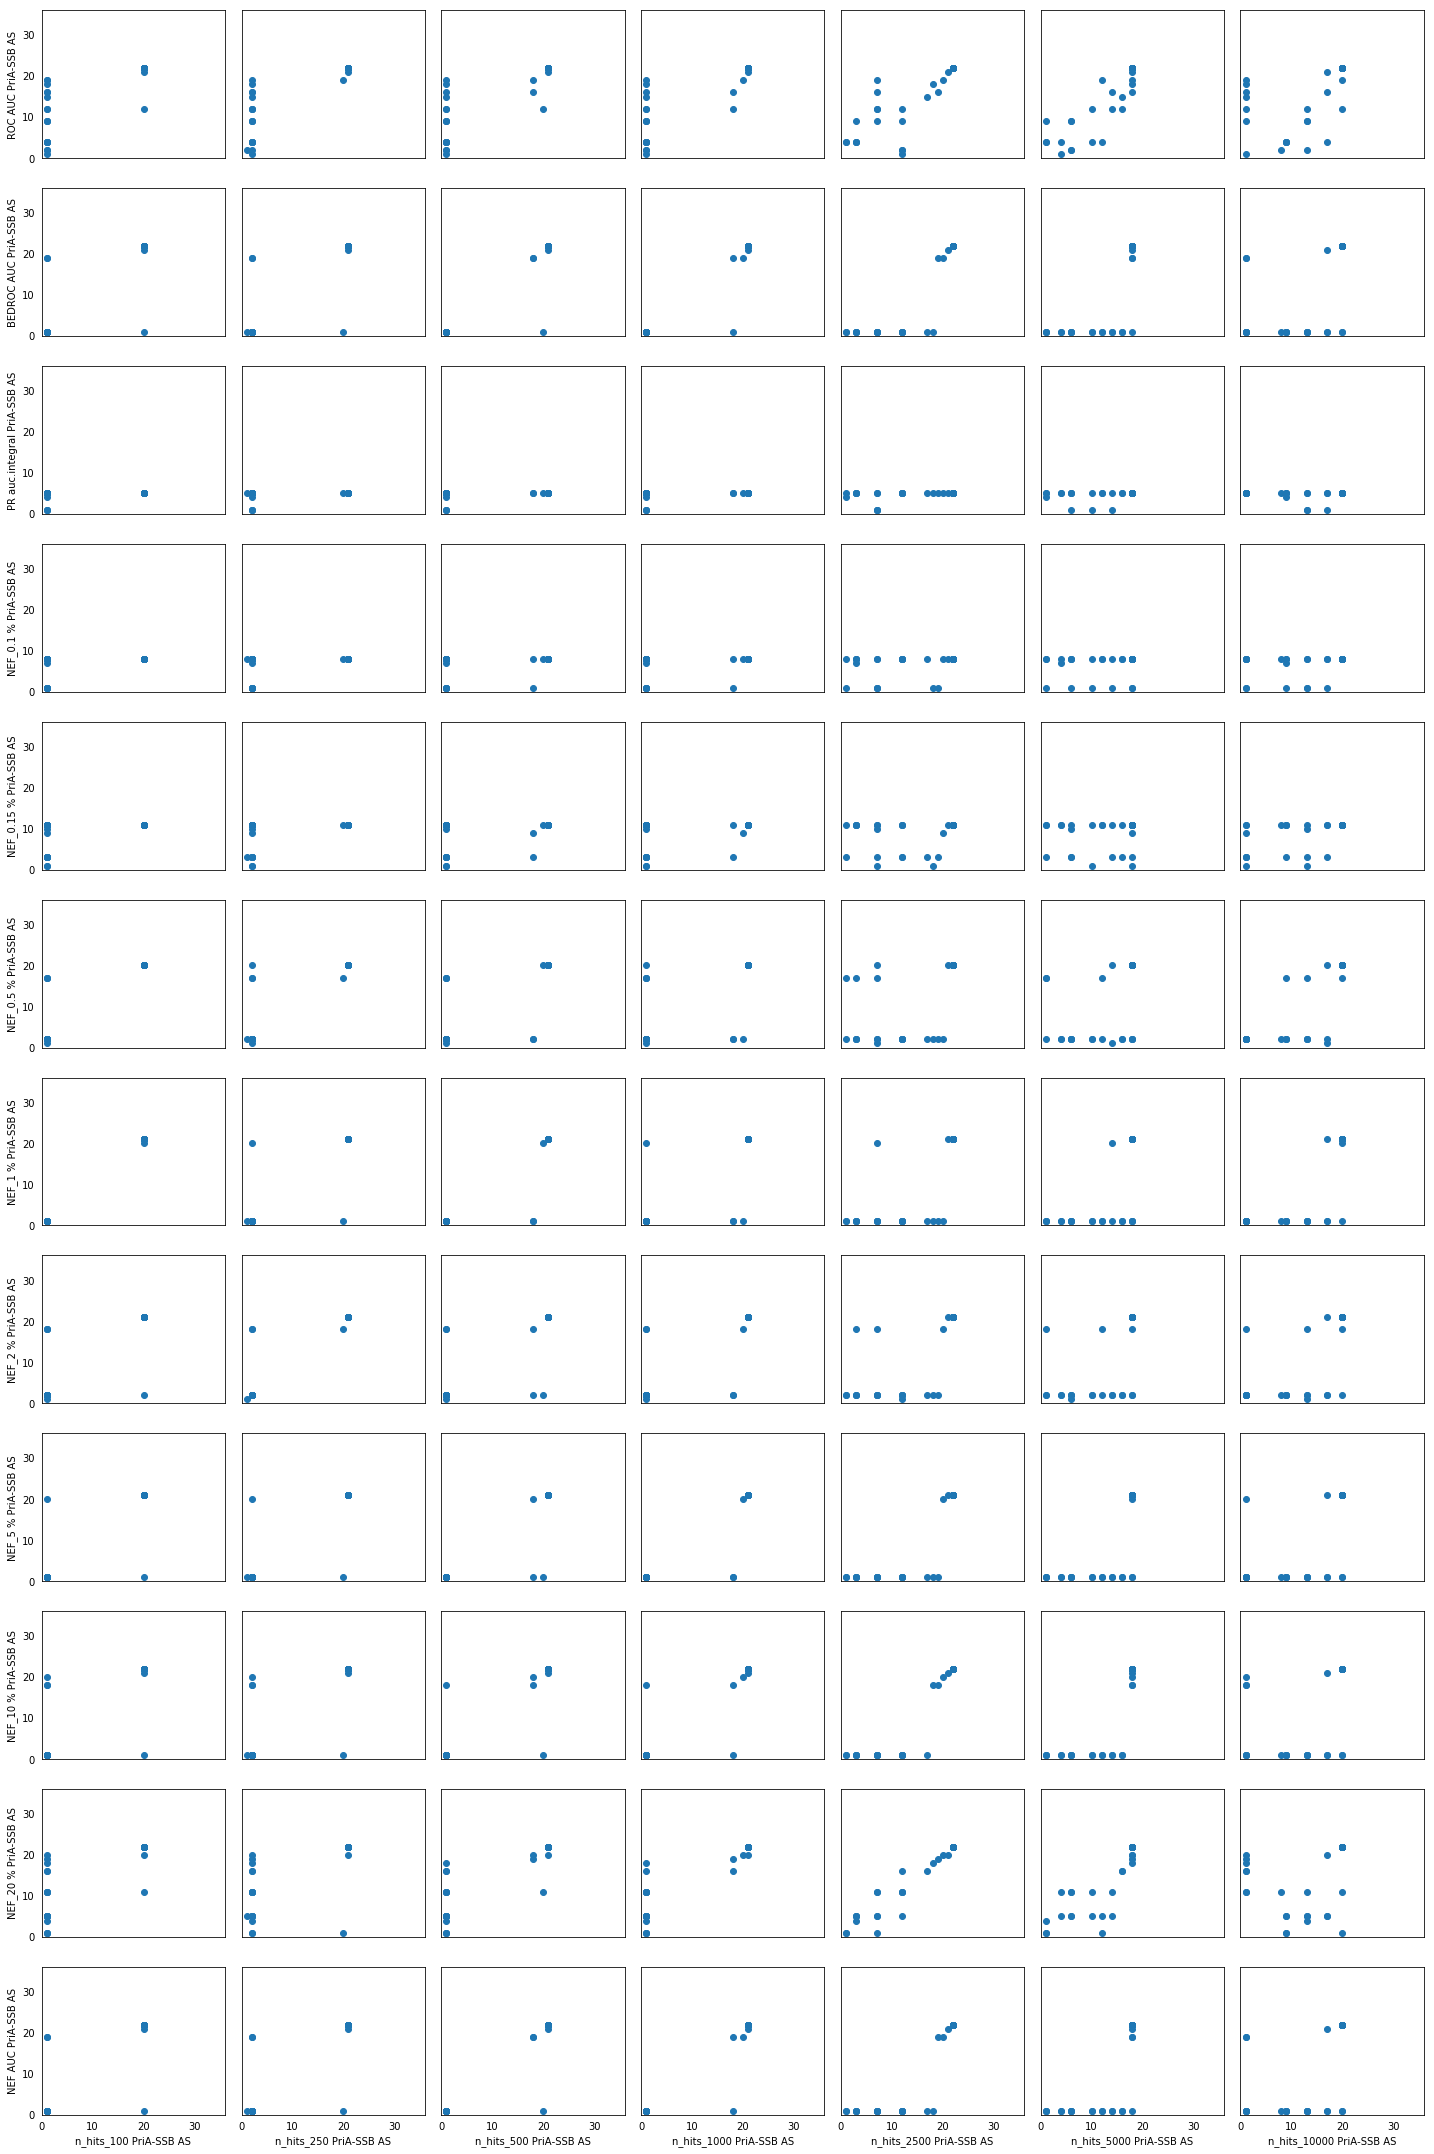

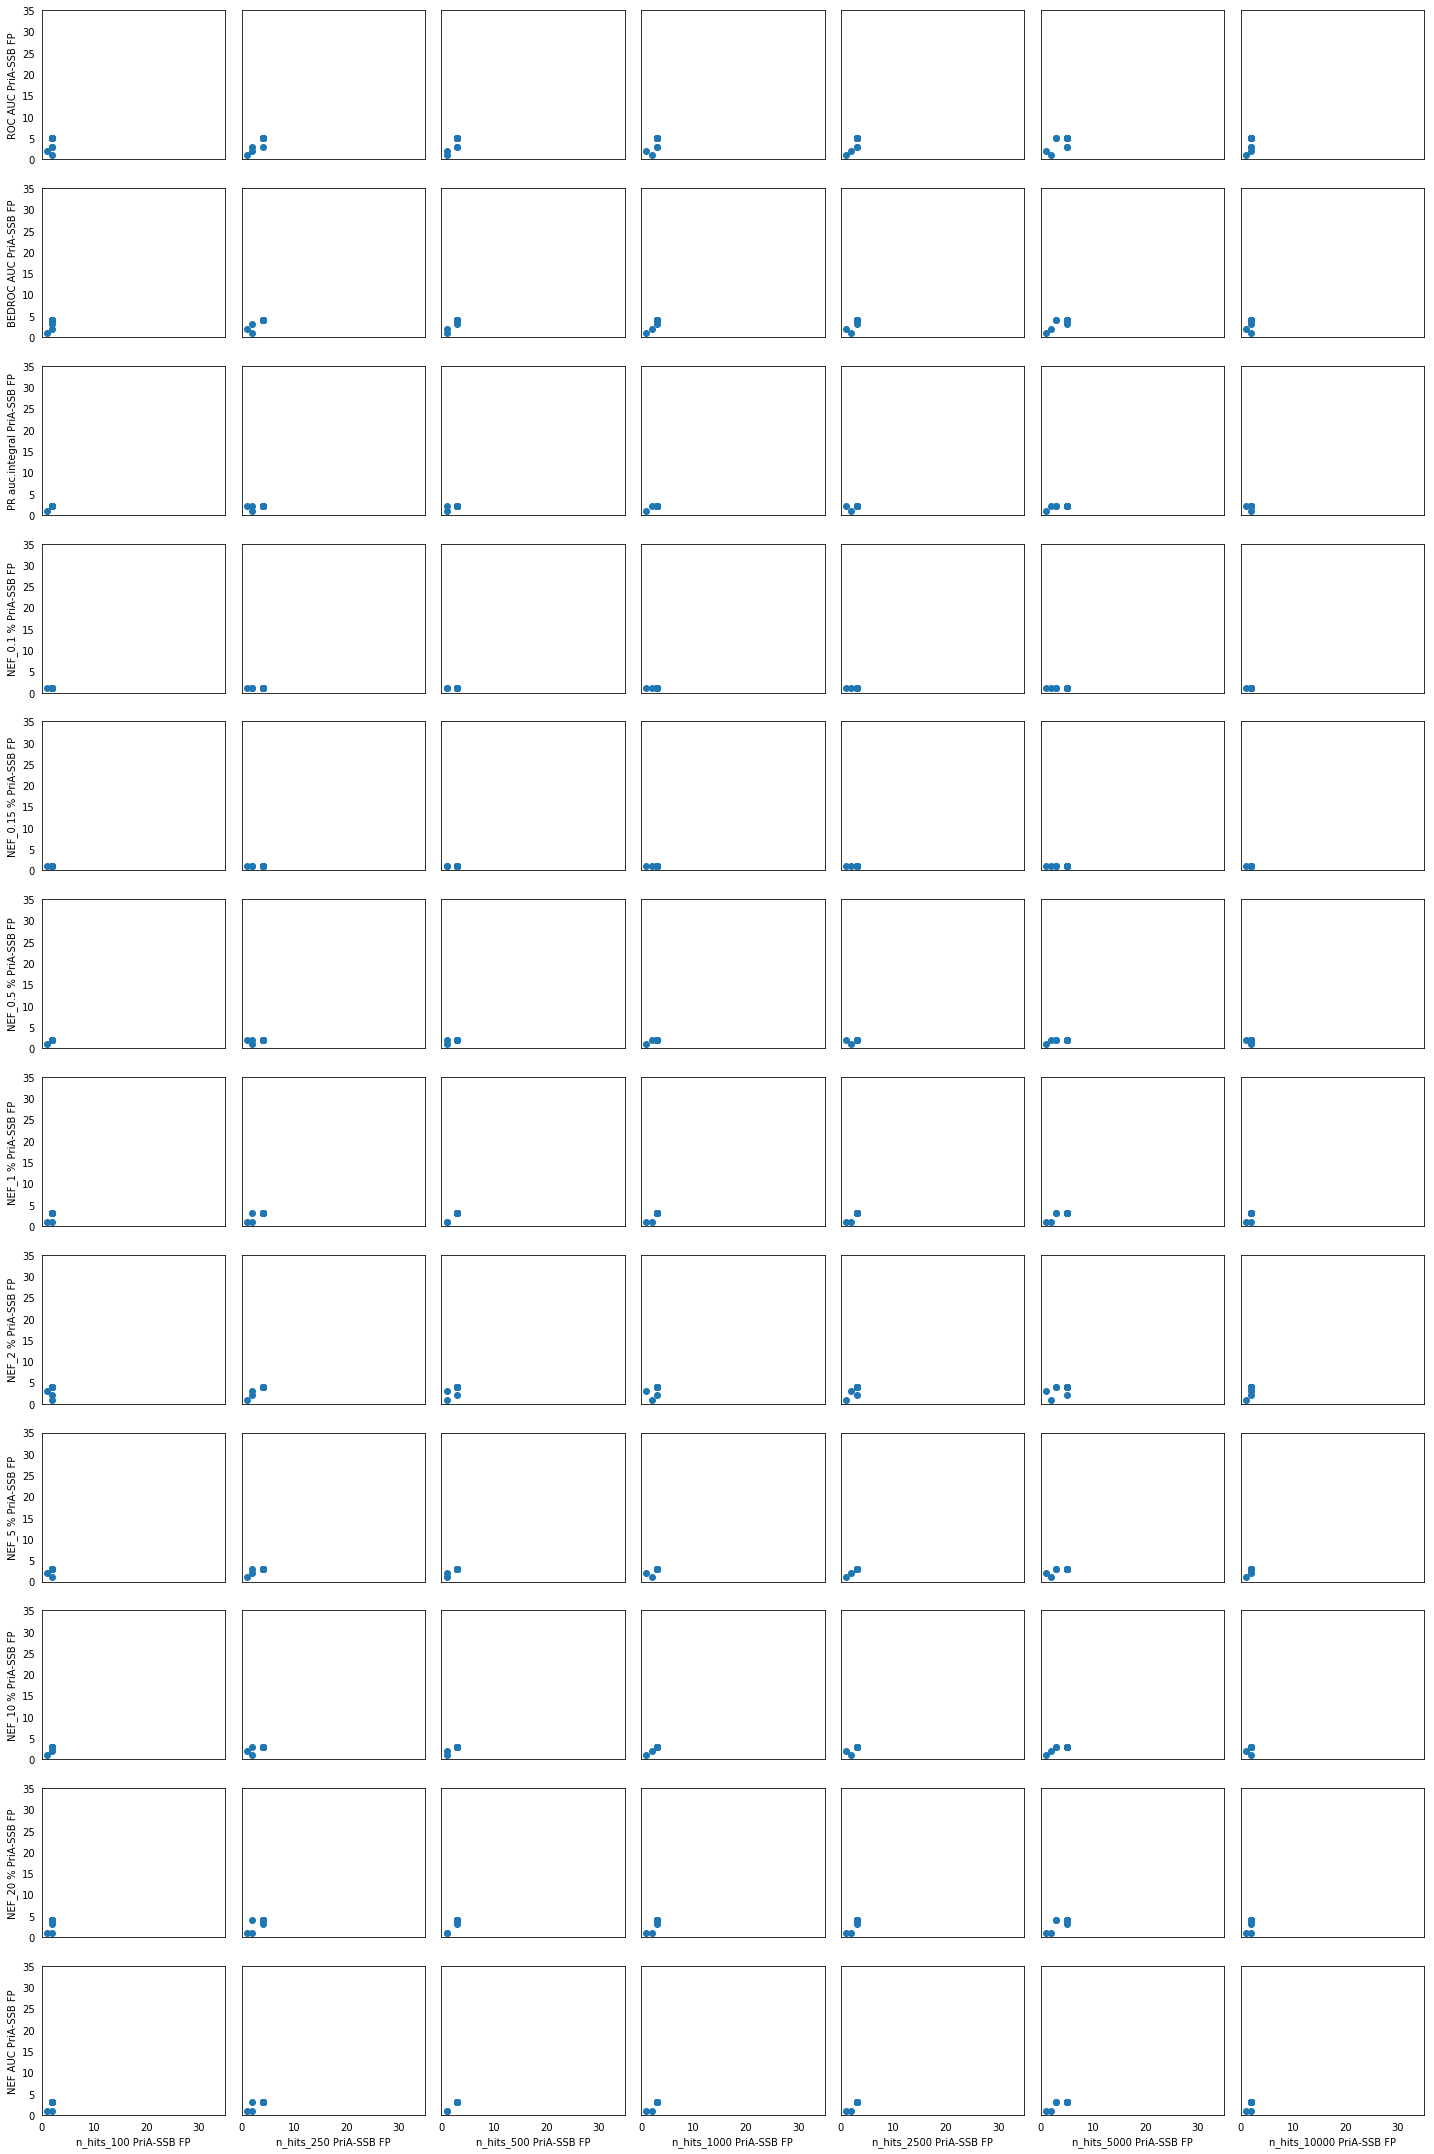

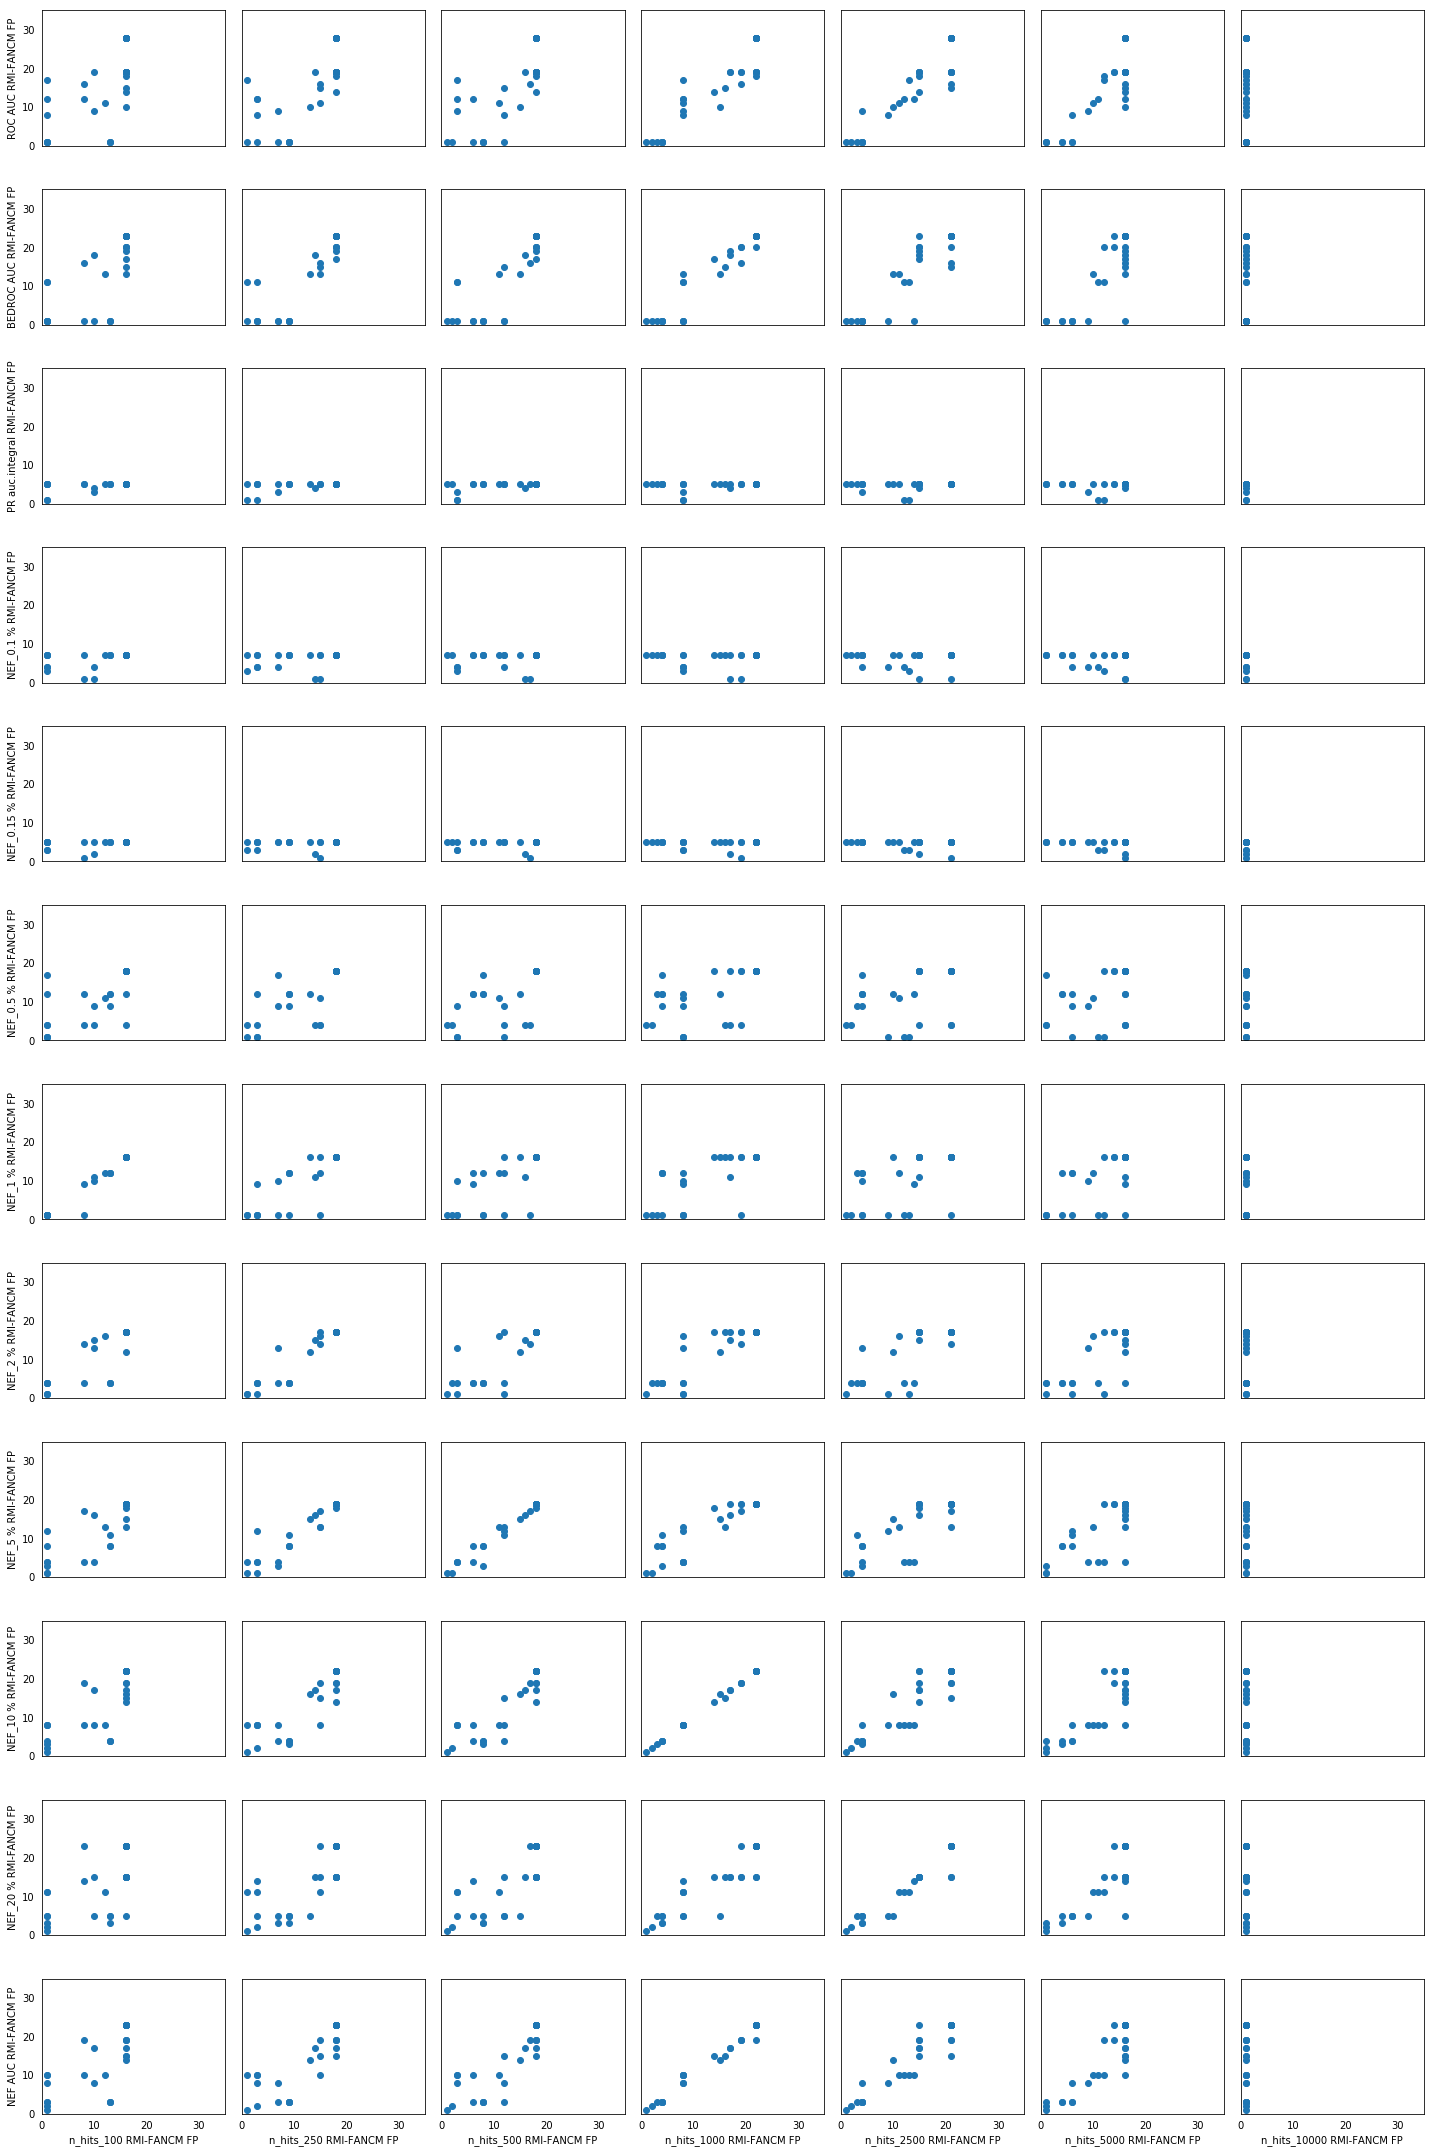

In [10]:
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM']
matplotlib.rcParams.update({'font.size': 10})
for l in labels:
    curr_metrics = [m for m in metric_names[:-21] if l in m]
    curr_hits = [m for m in metric_names[-21:] if l in m]
    file_name = './cv_ps_figures/cv_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Box Plots for all Models

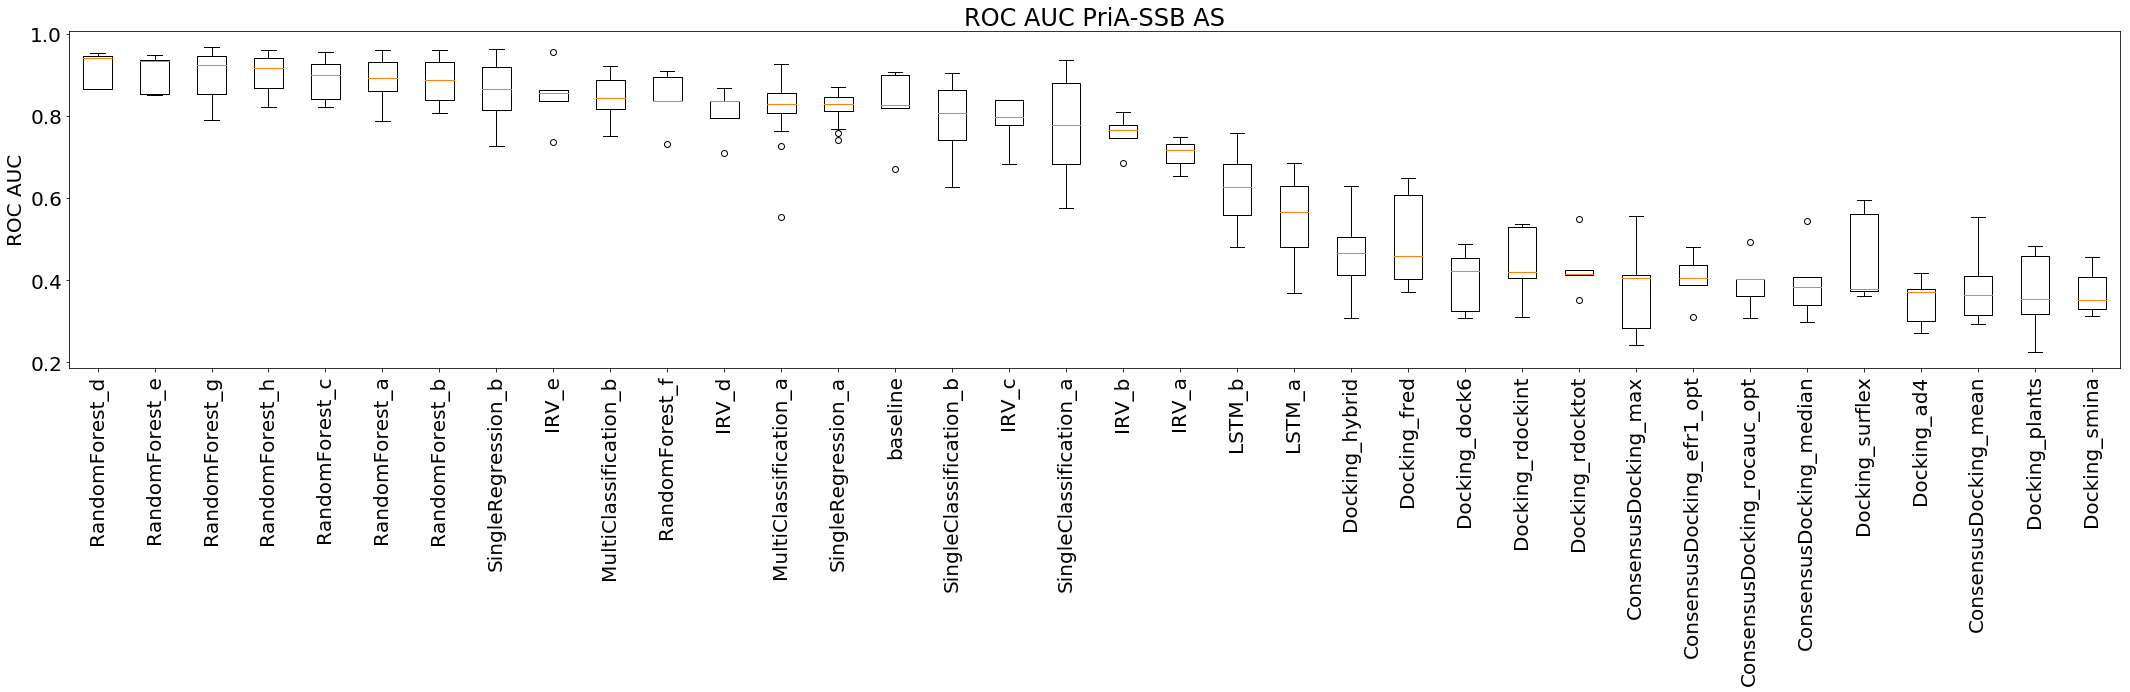

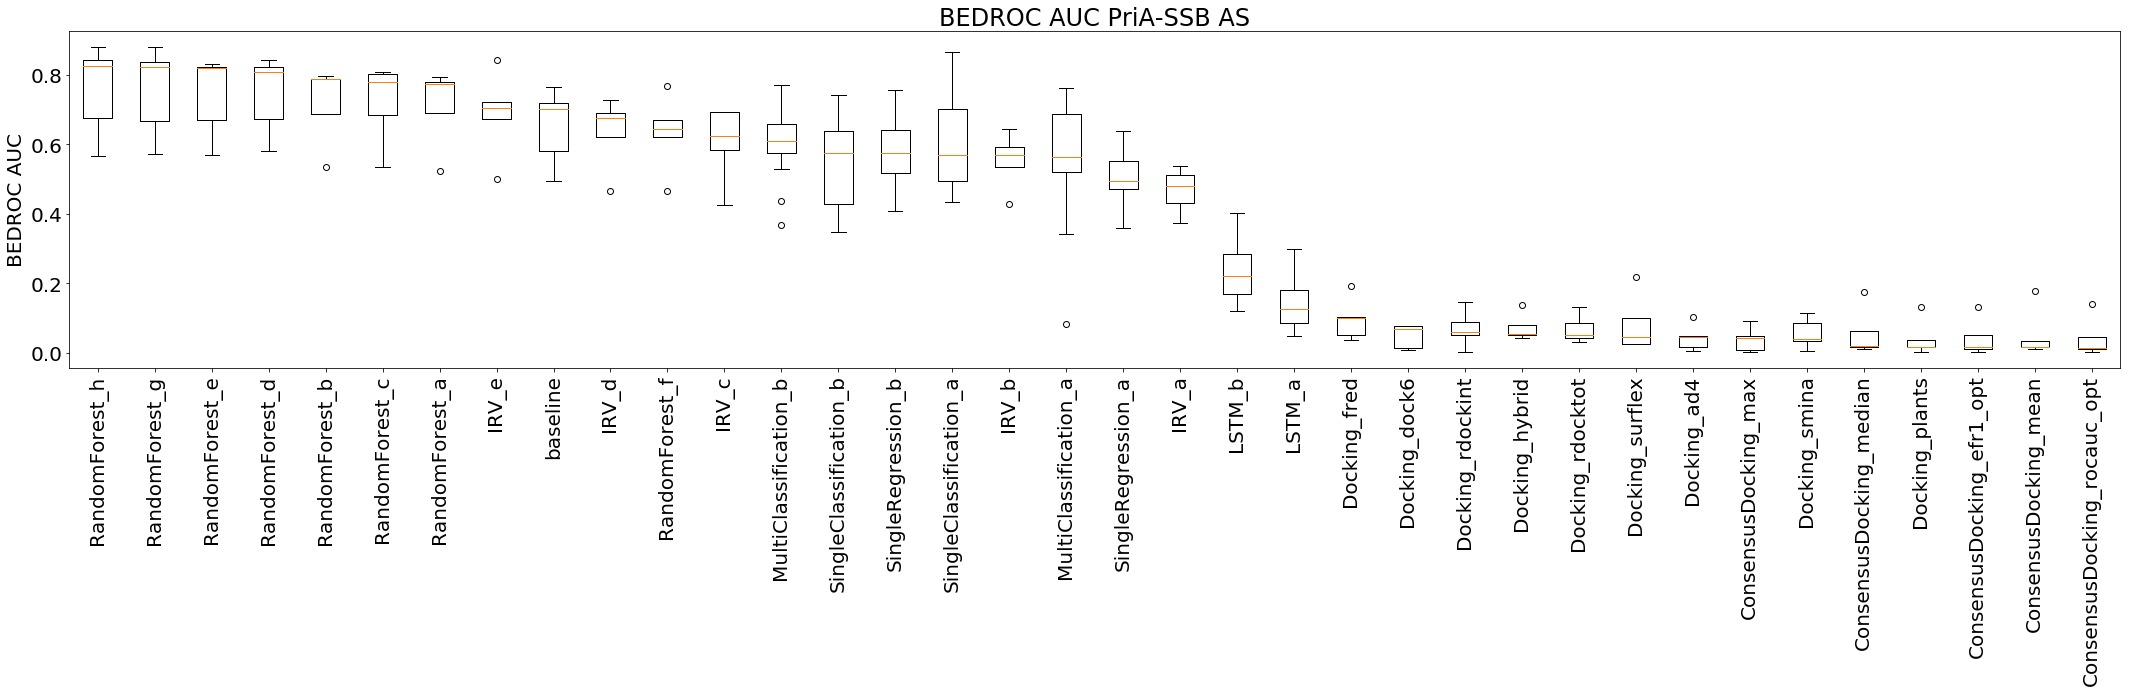

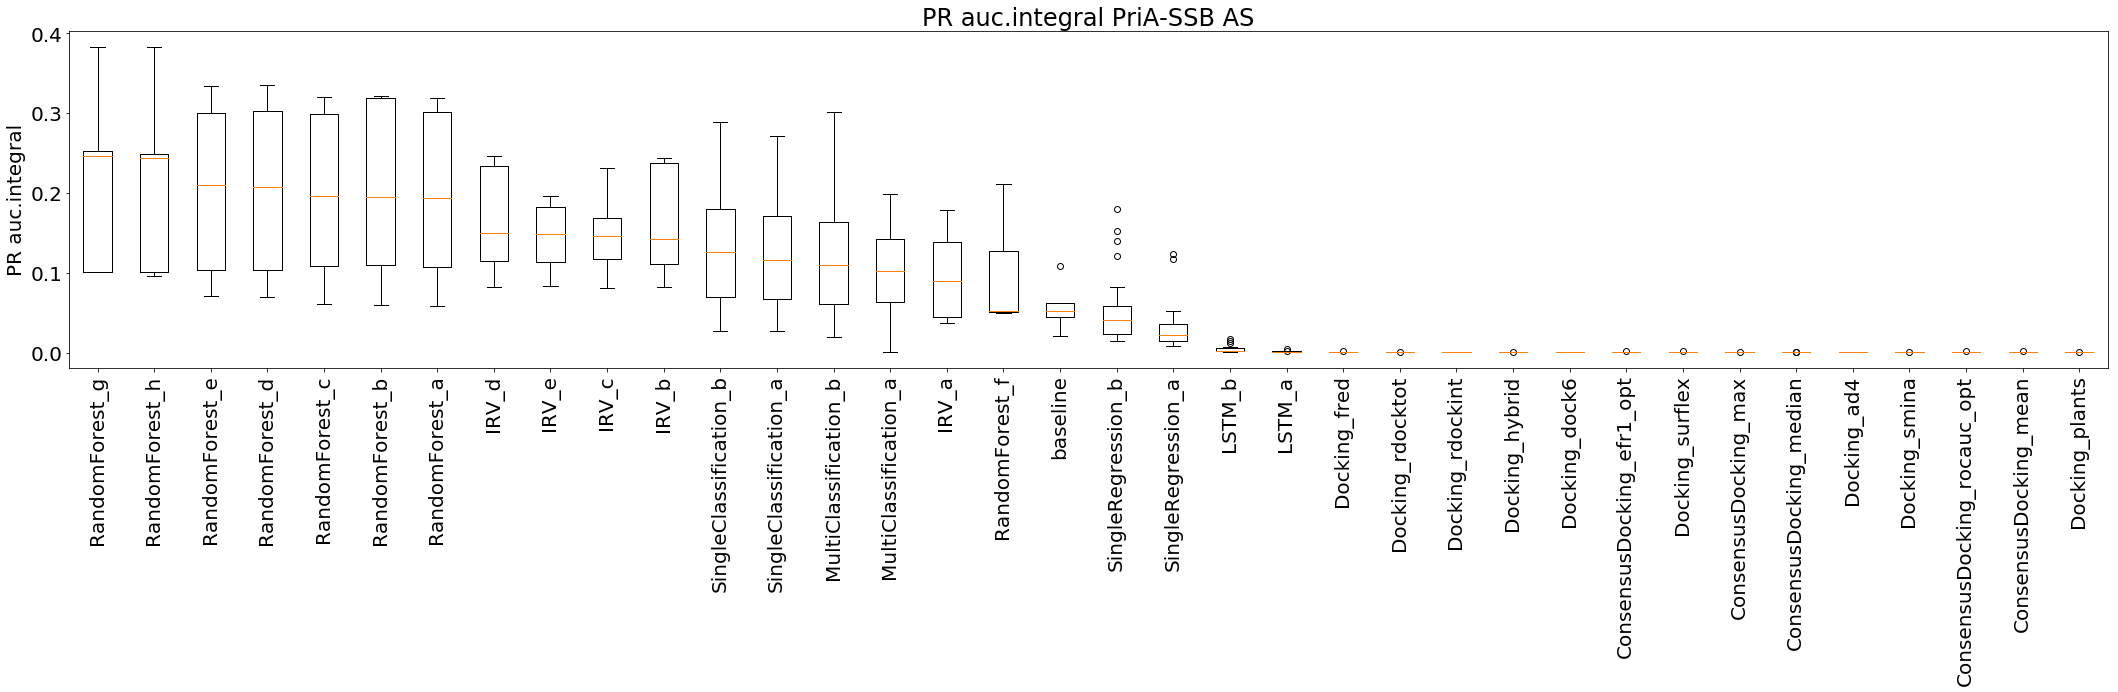

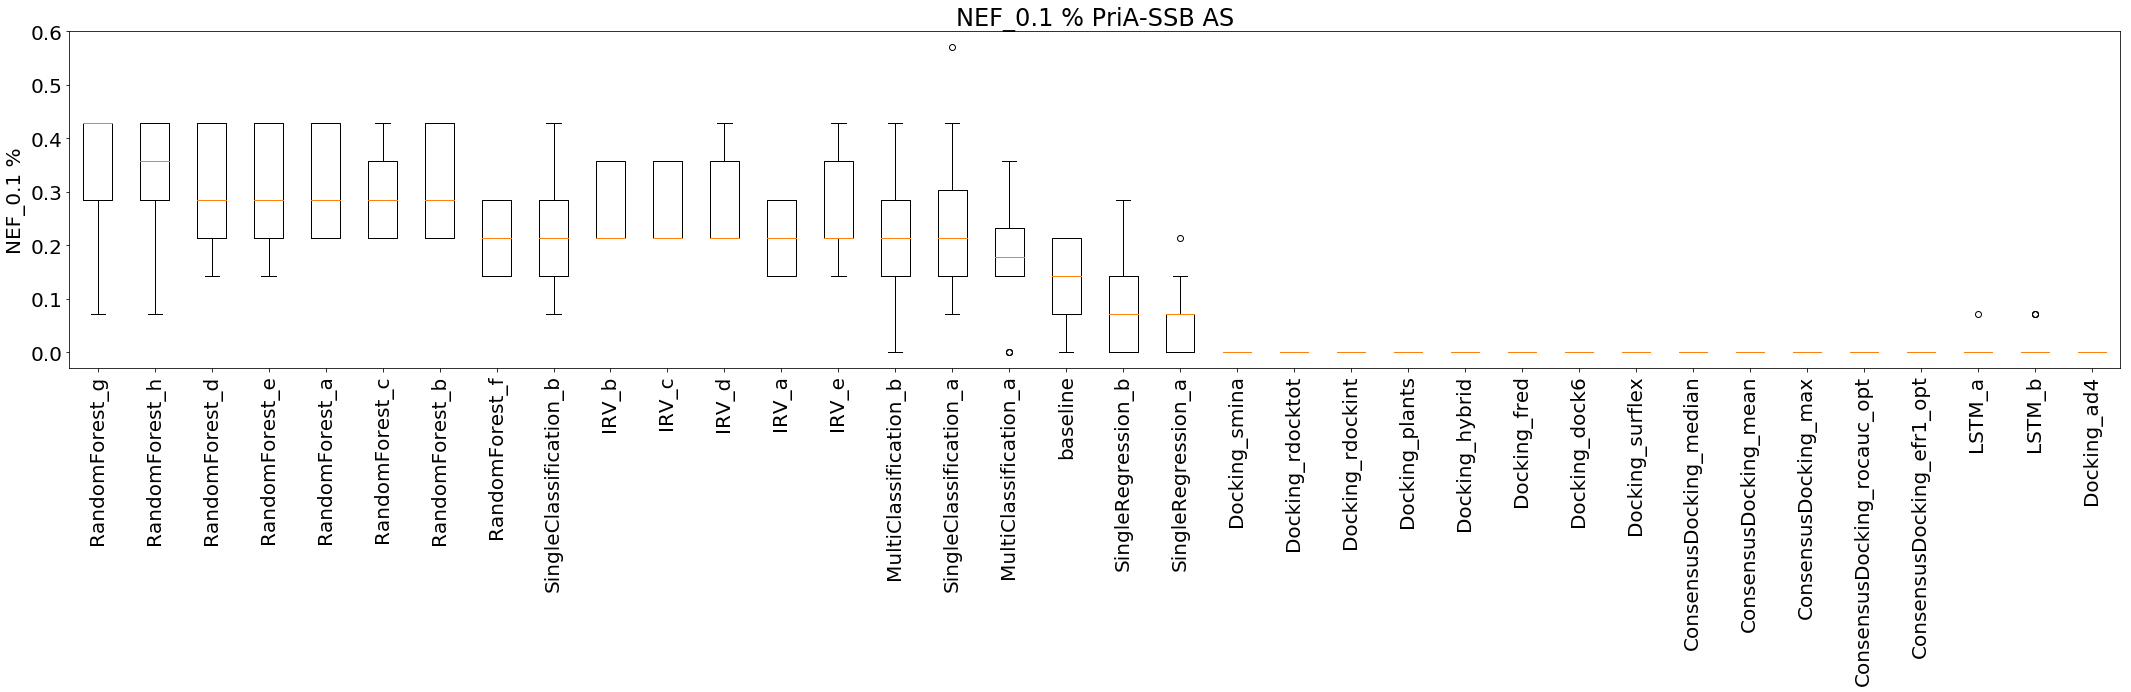

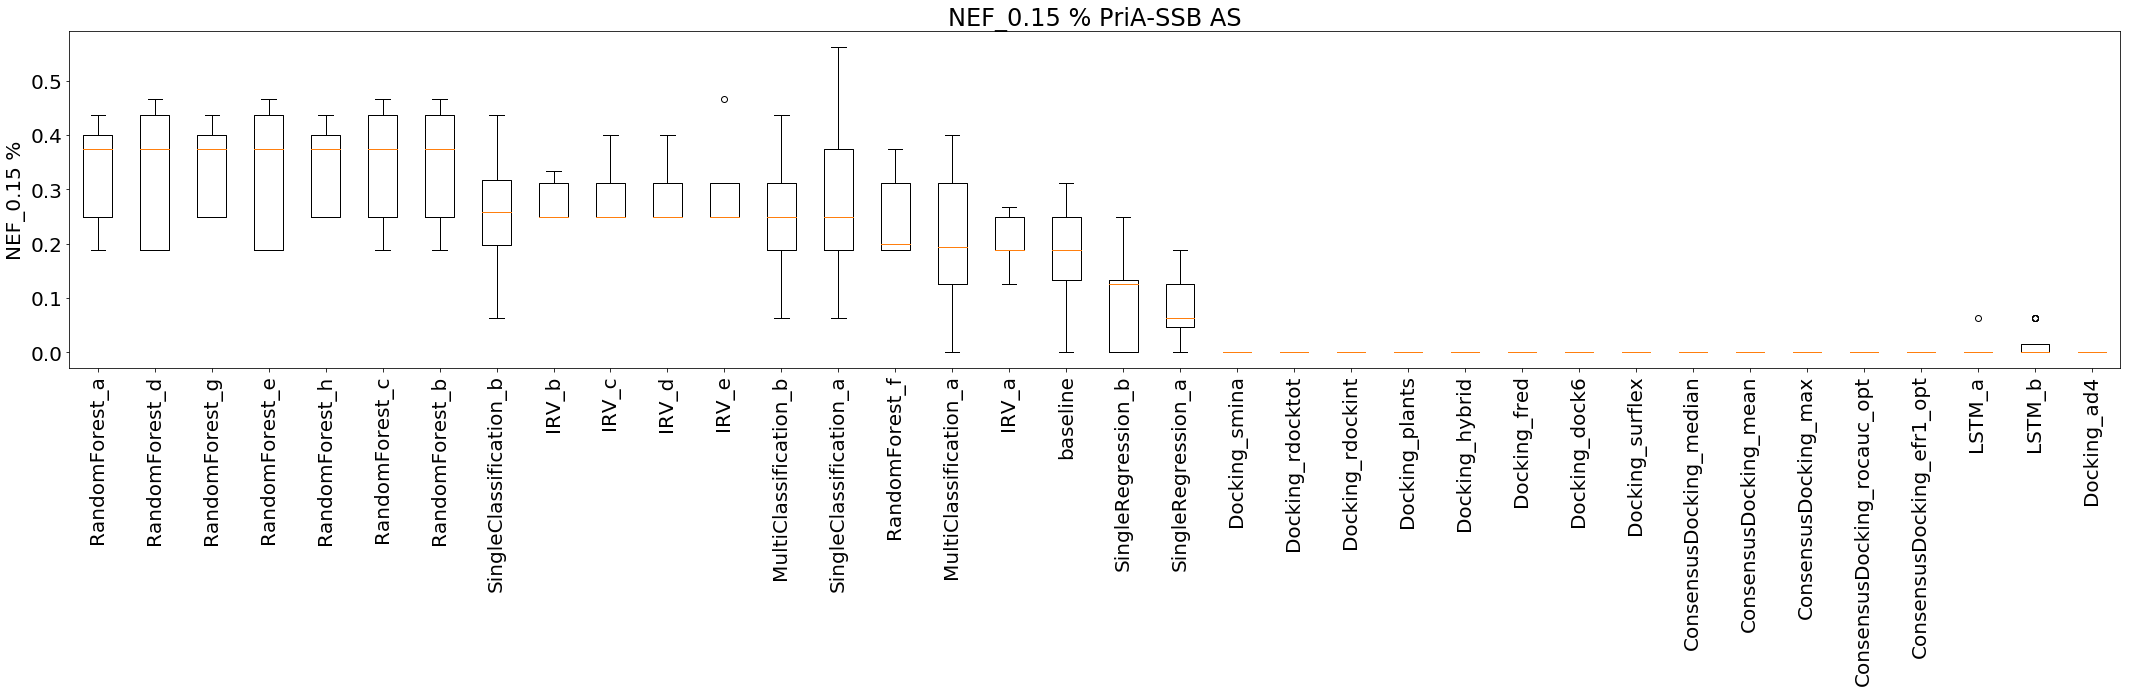

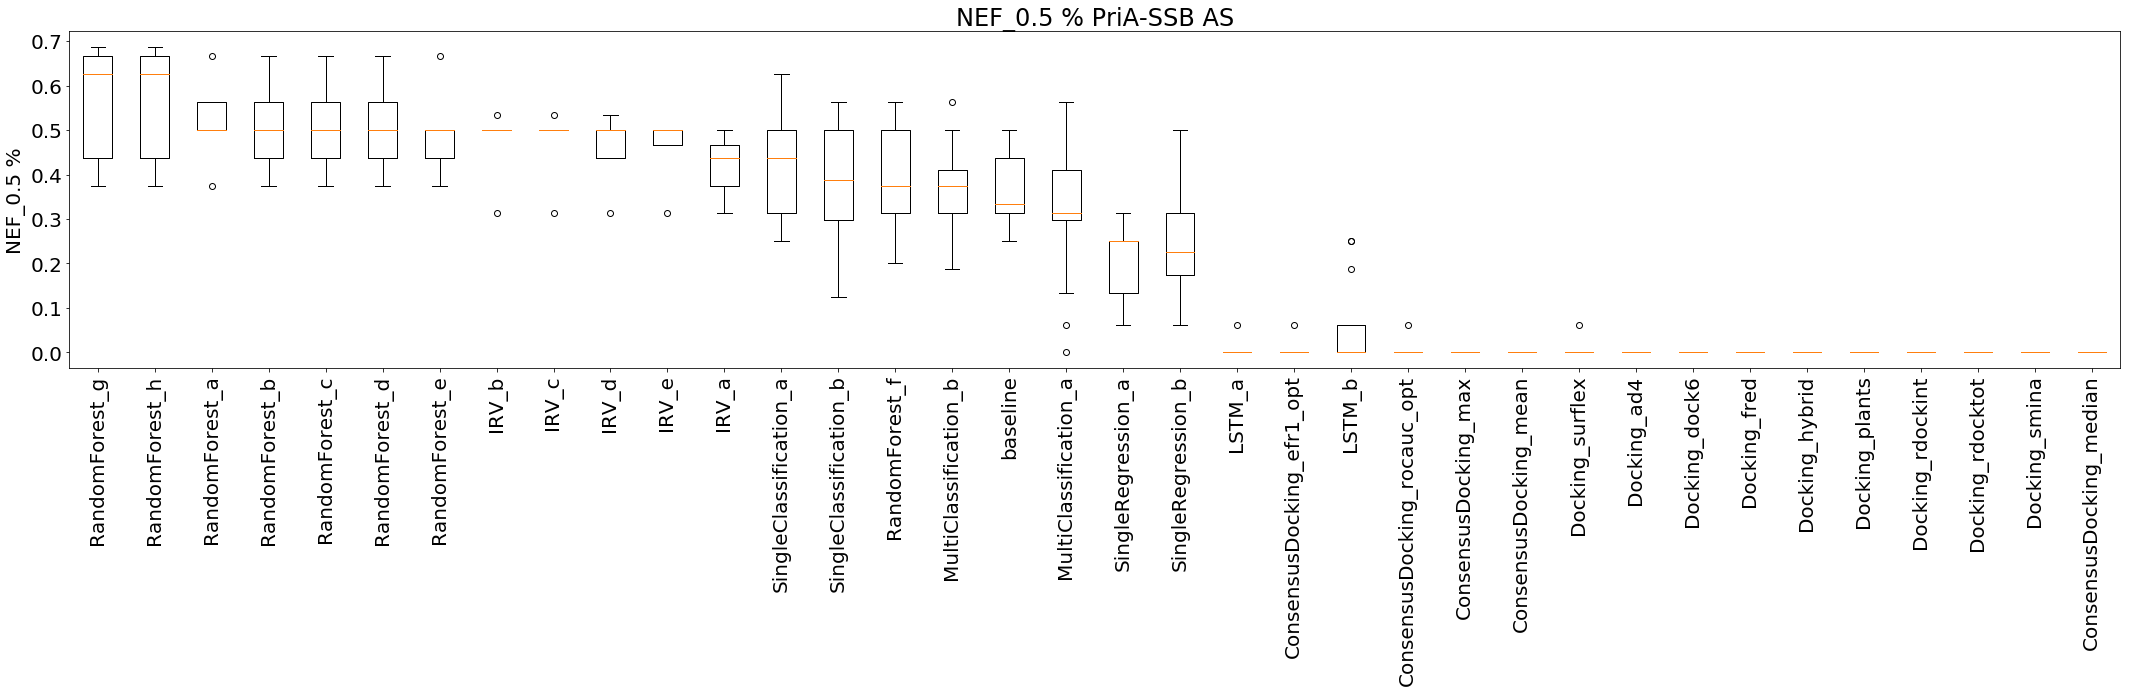

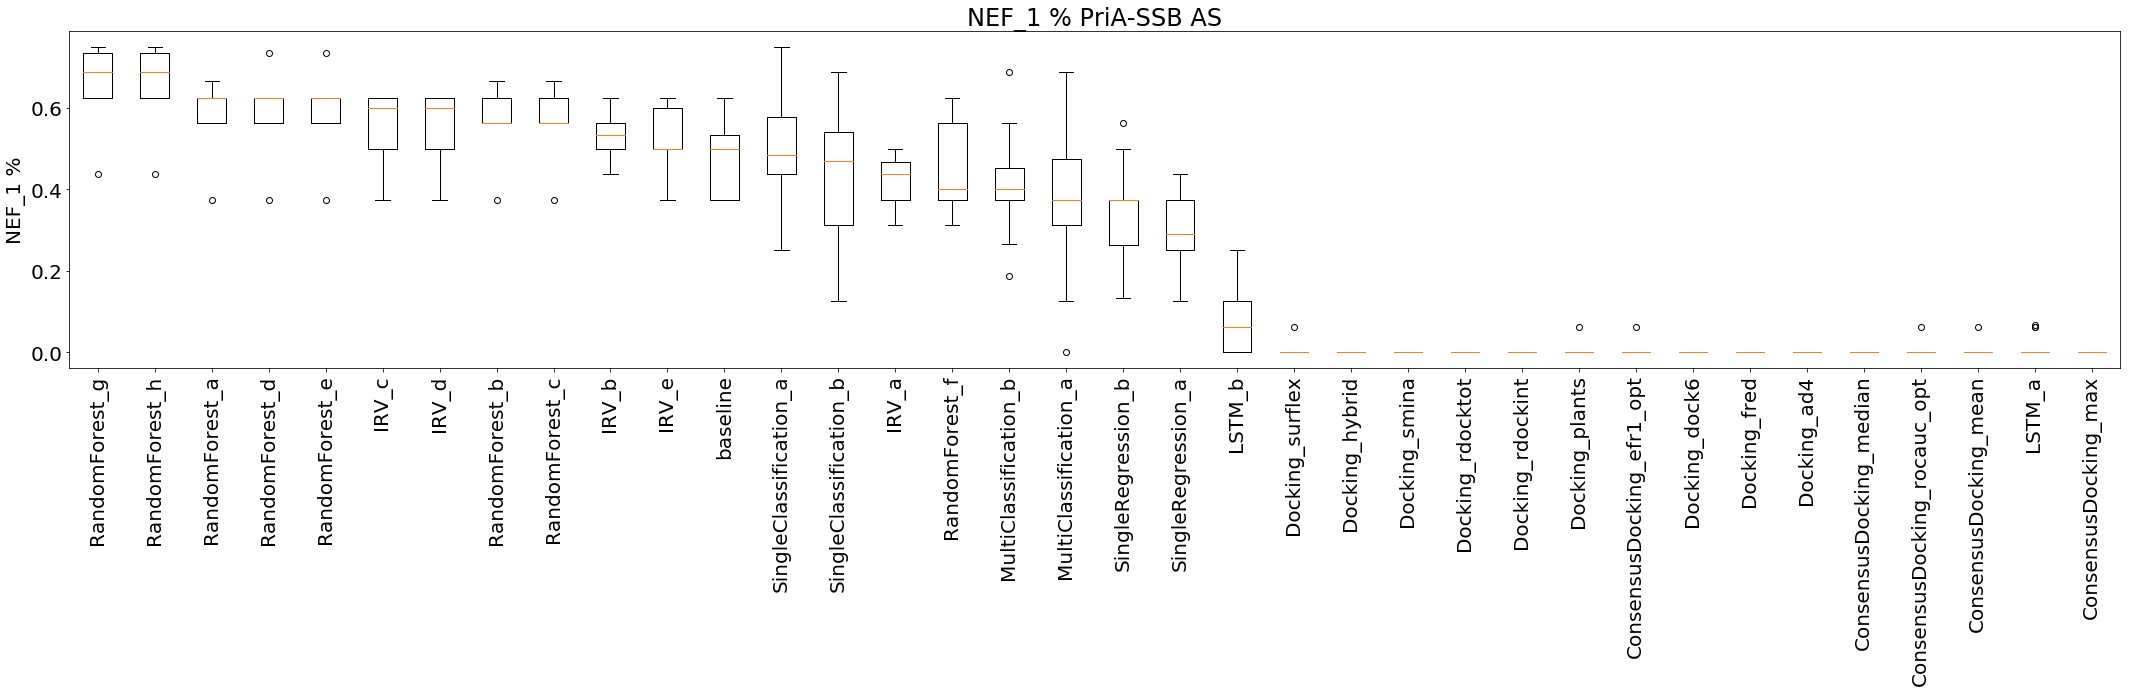

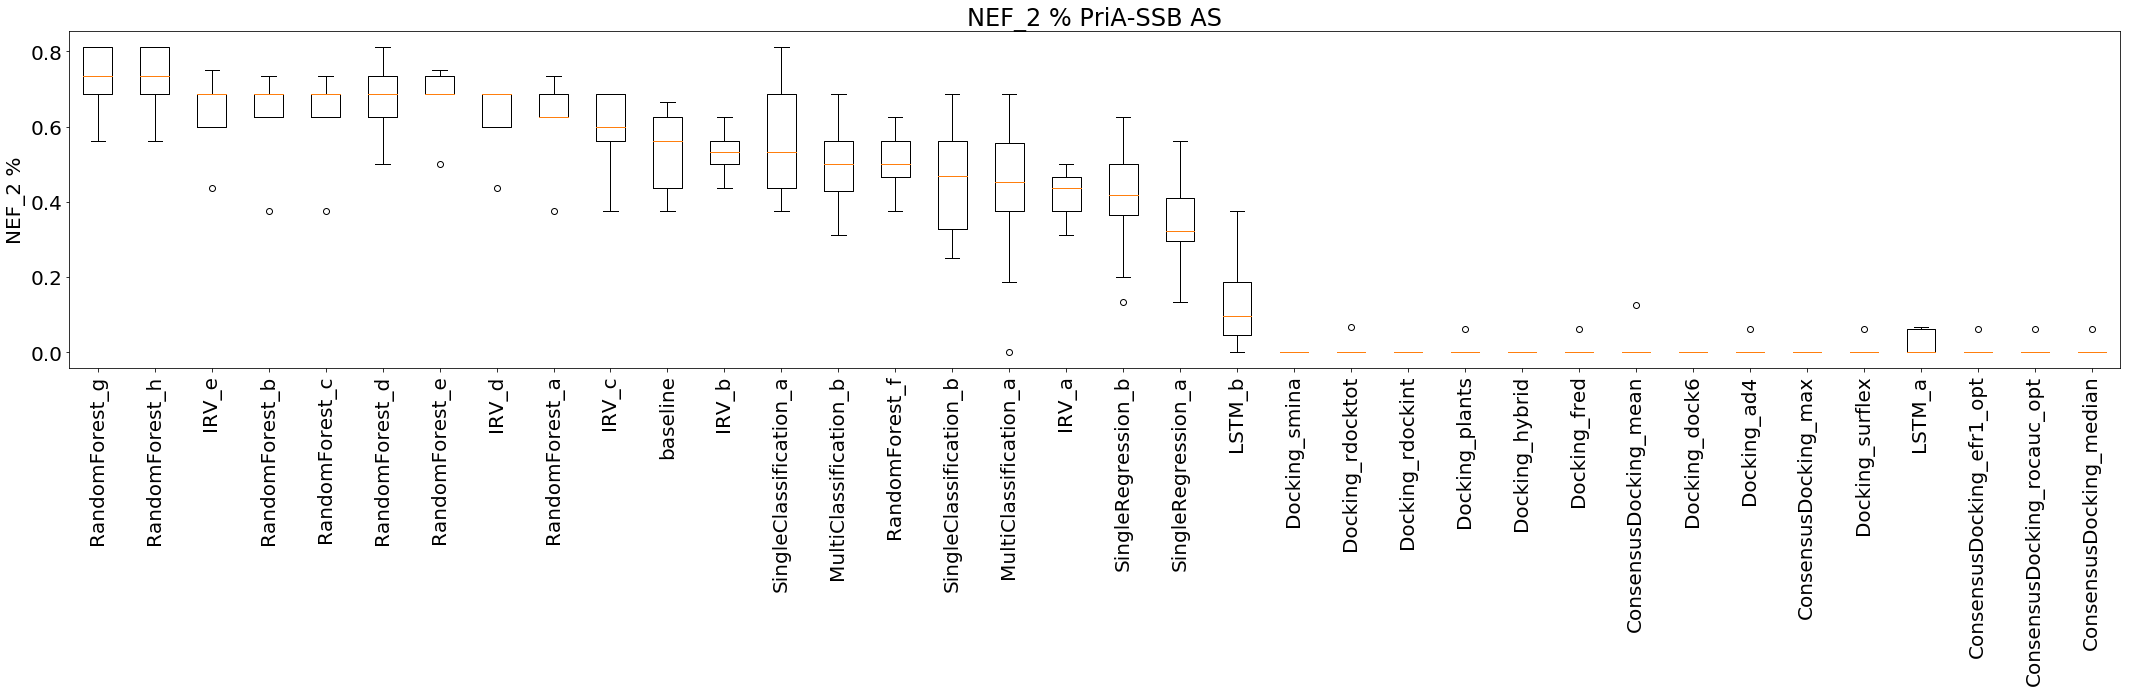

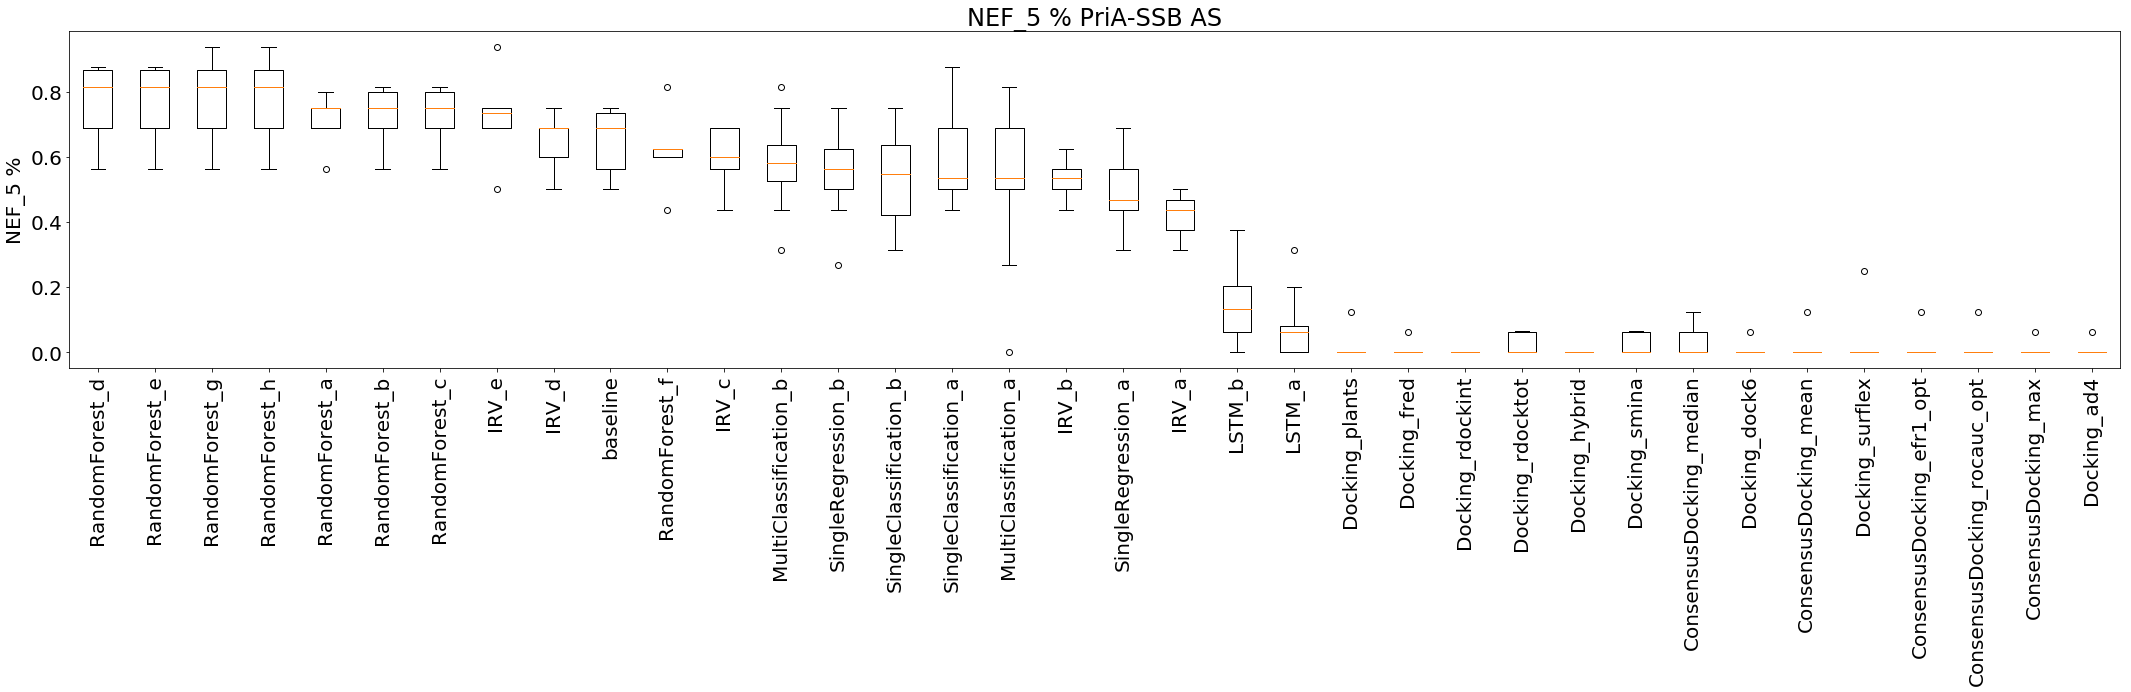

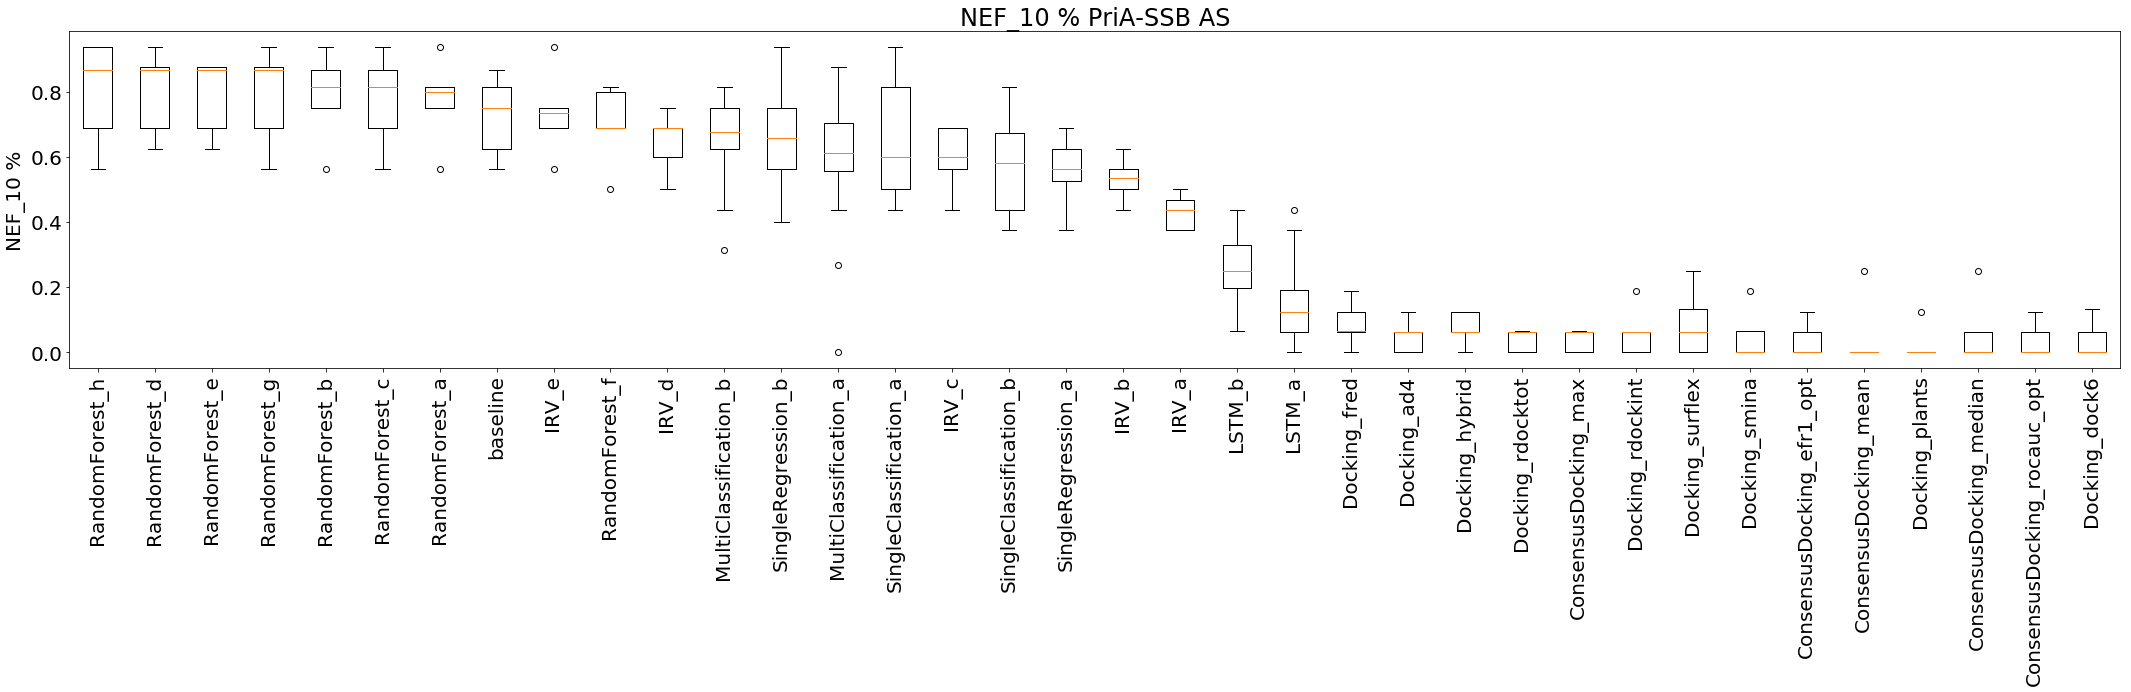

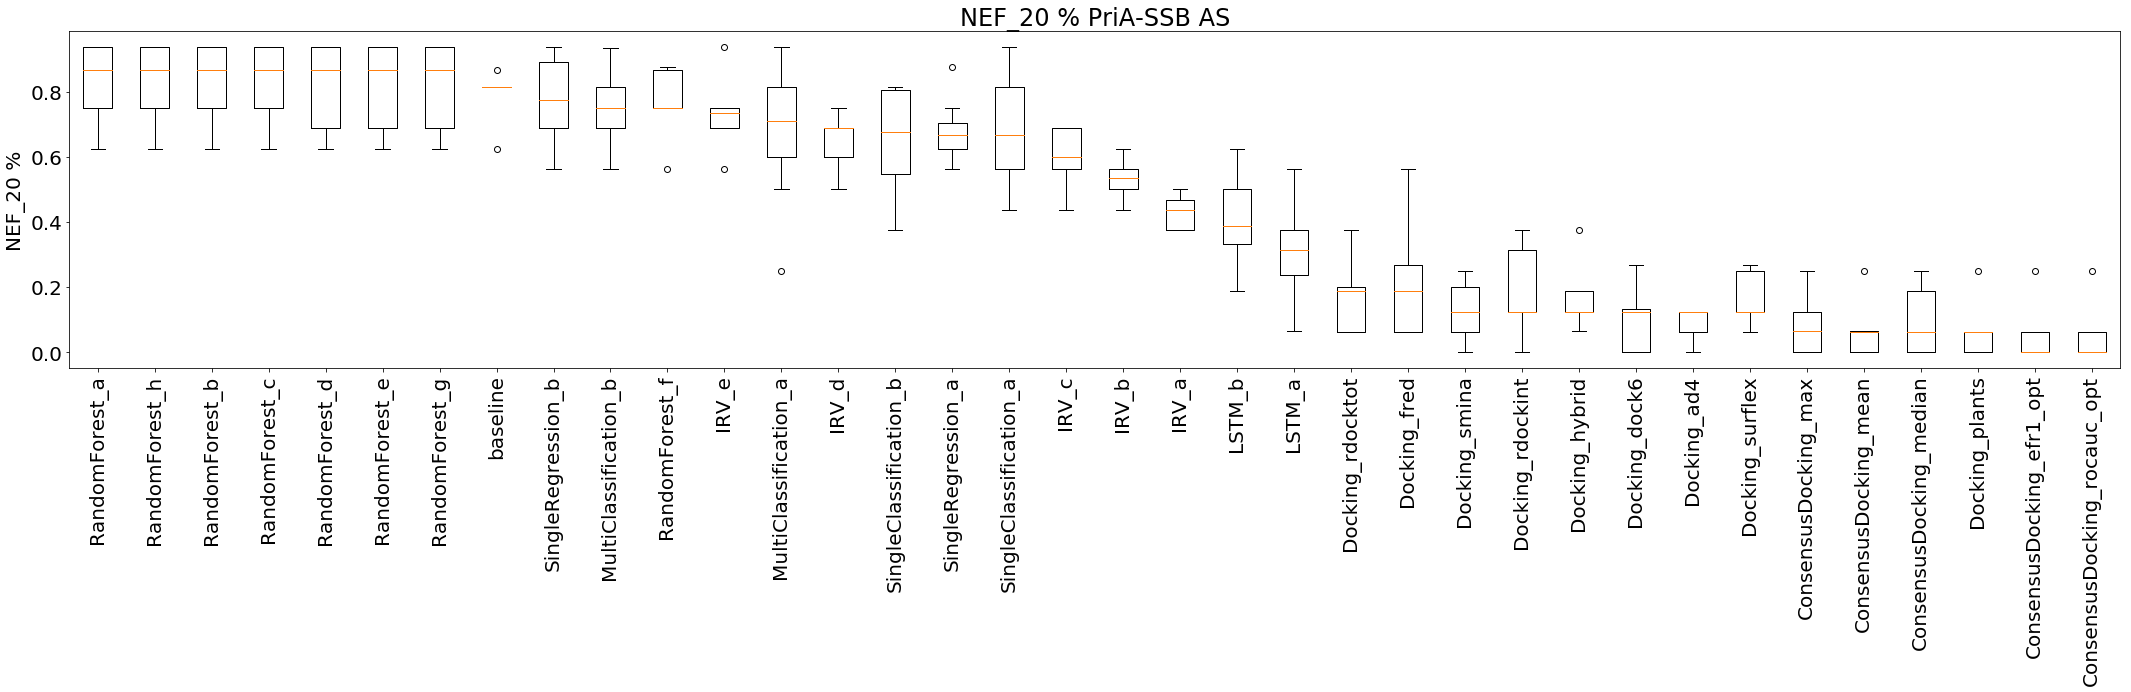

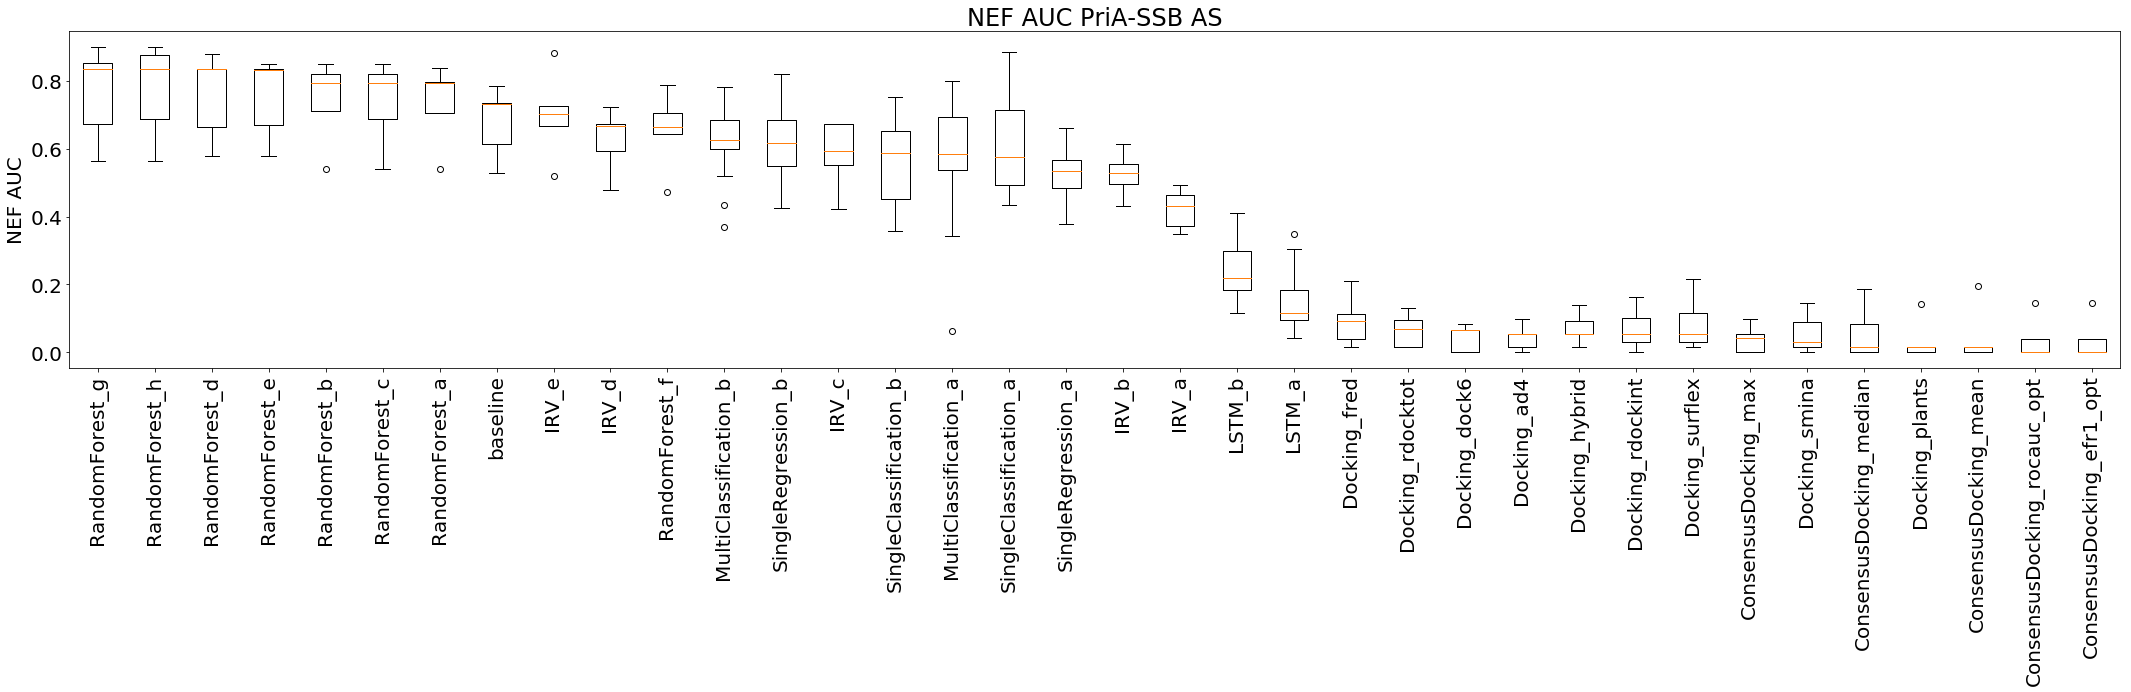

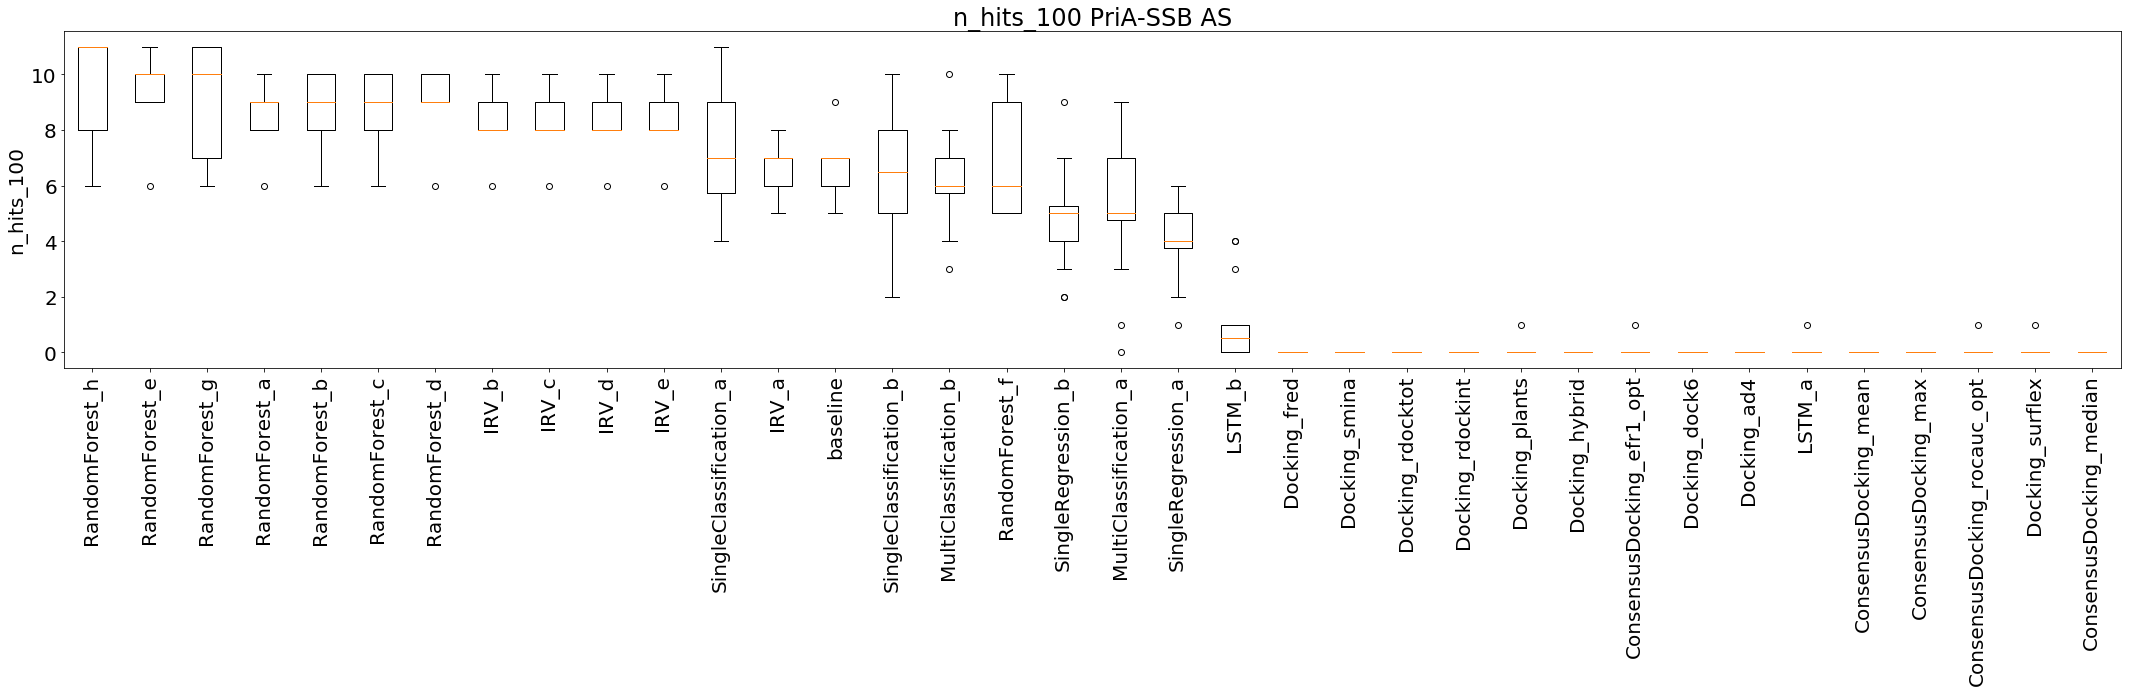

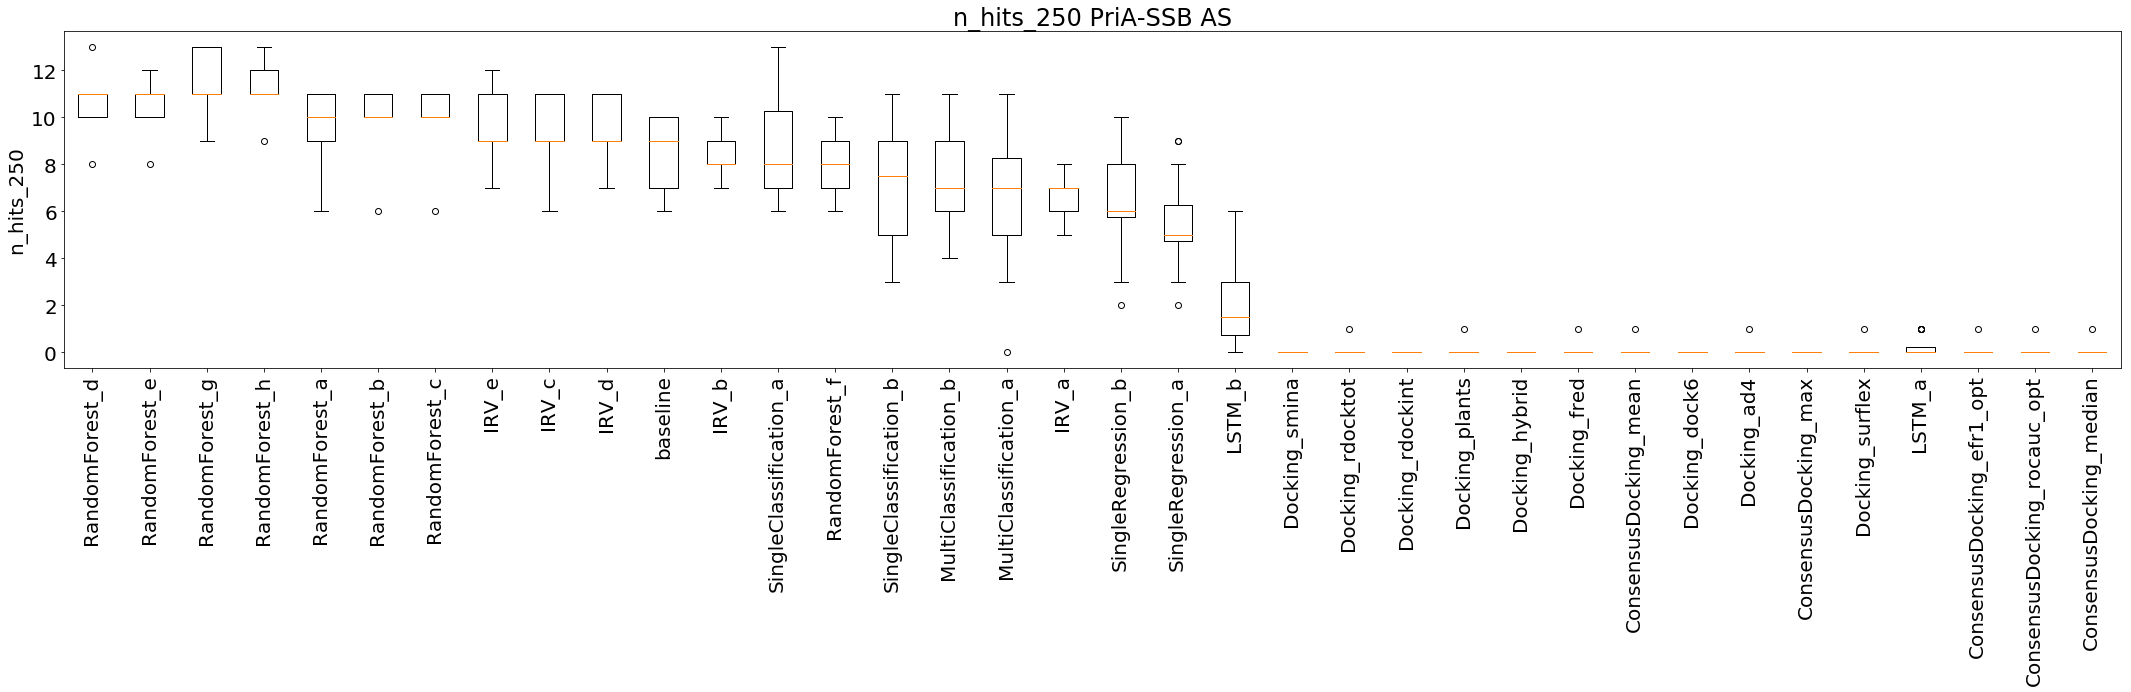

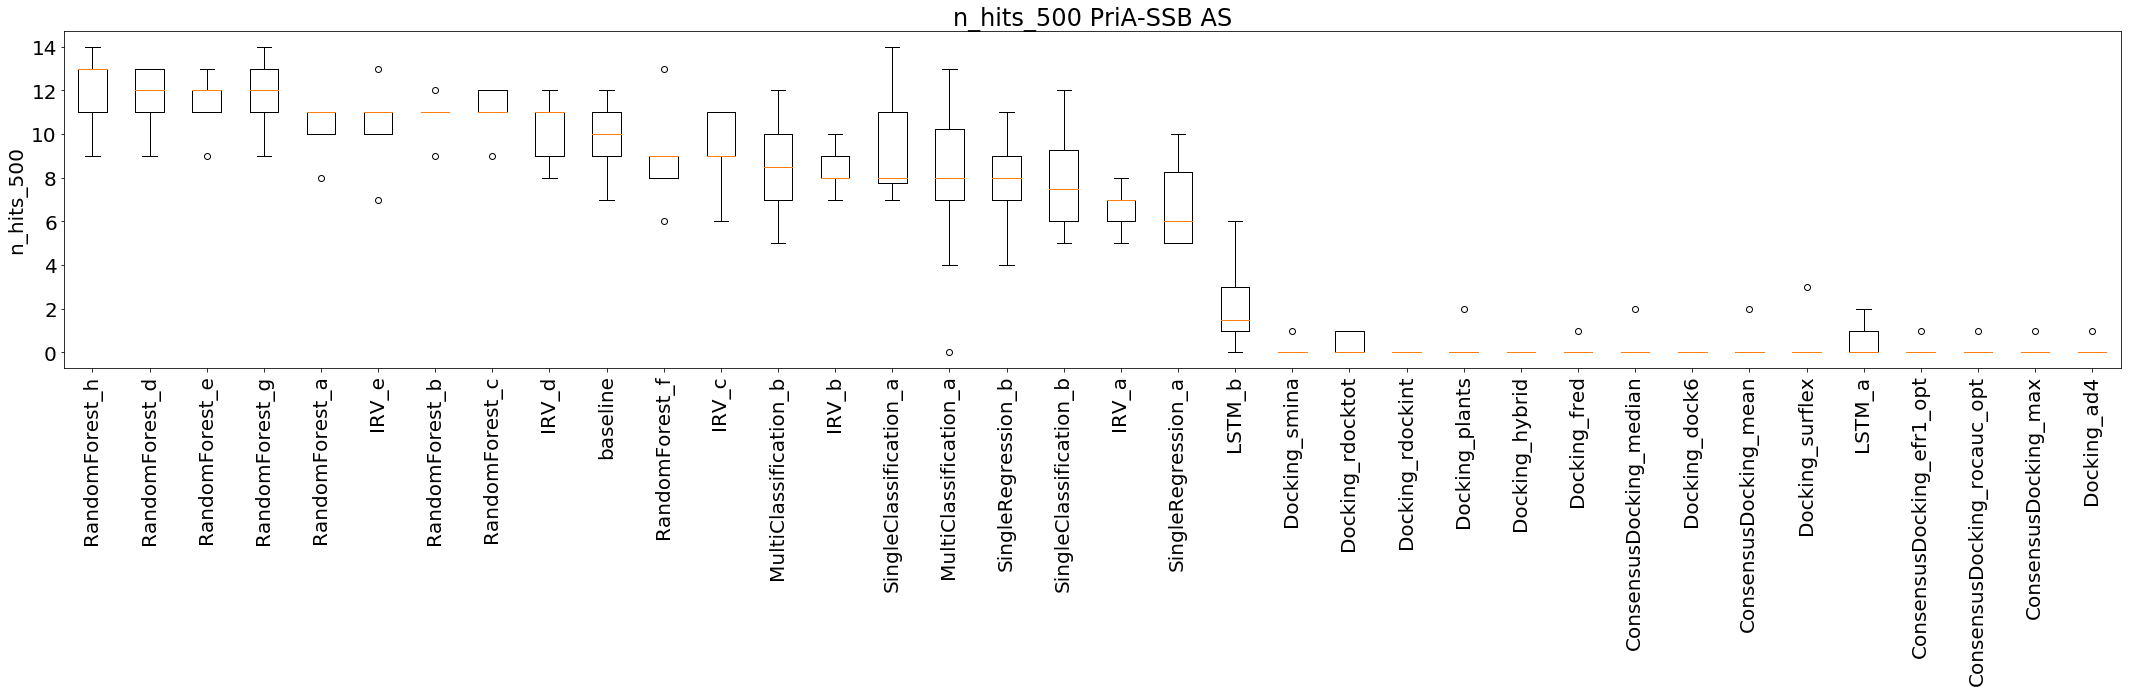

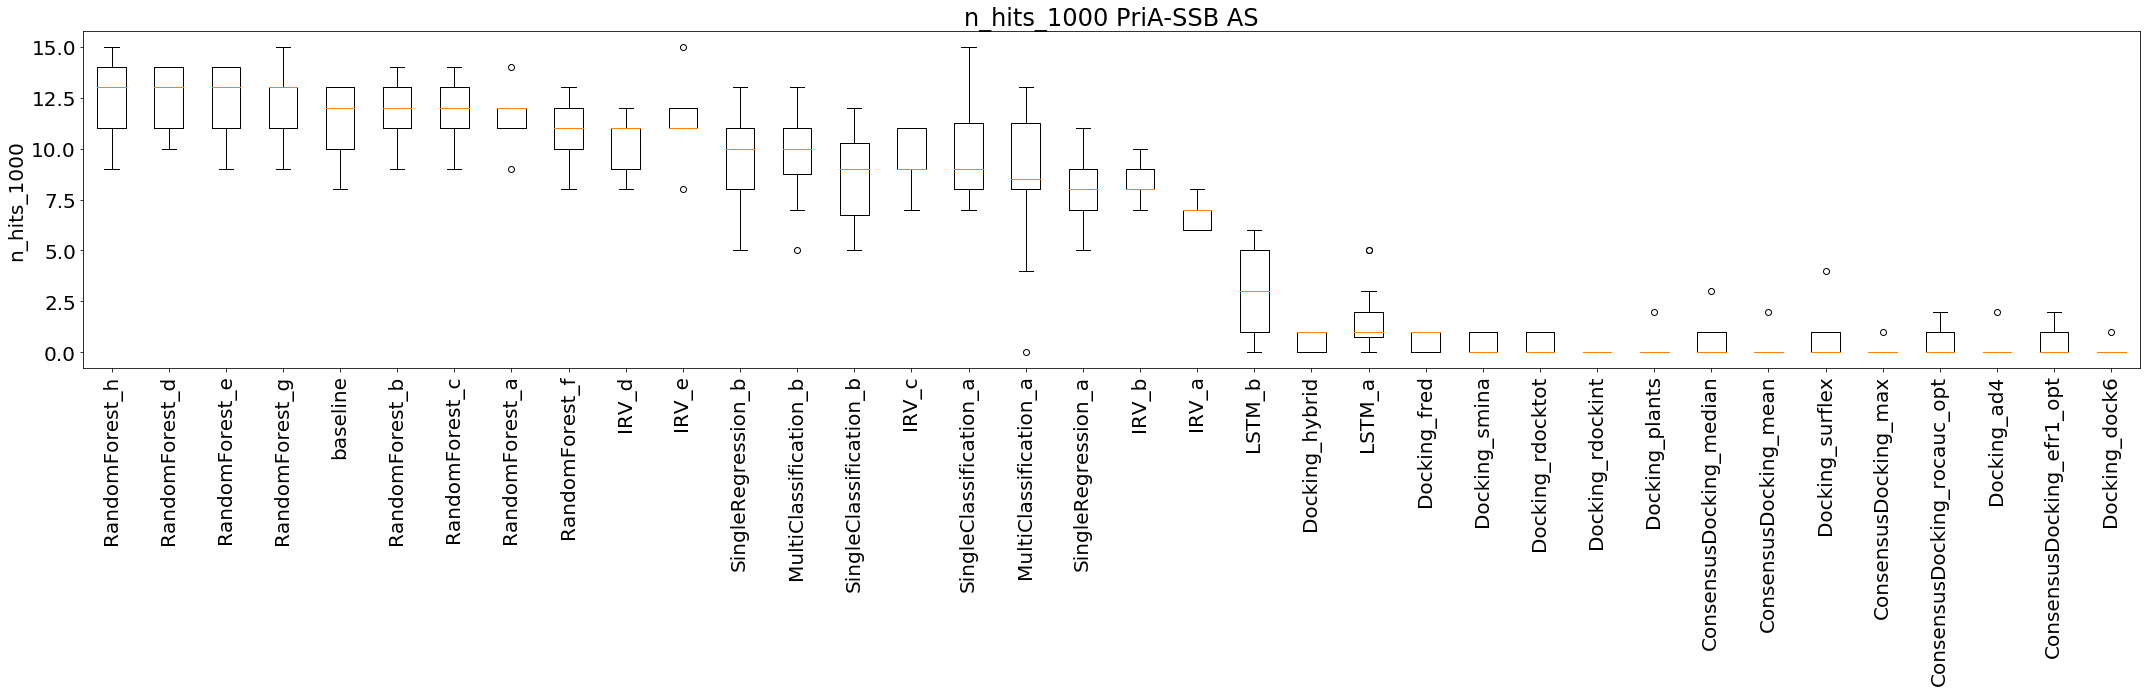

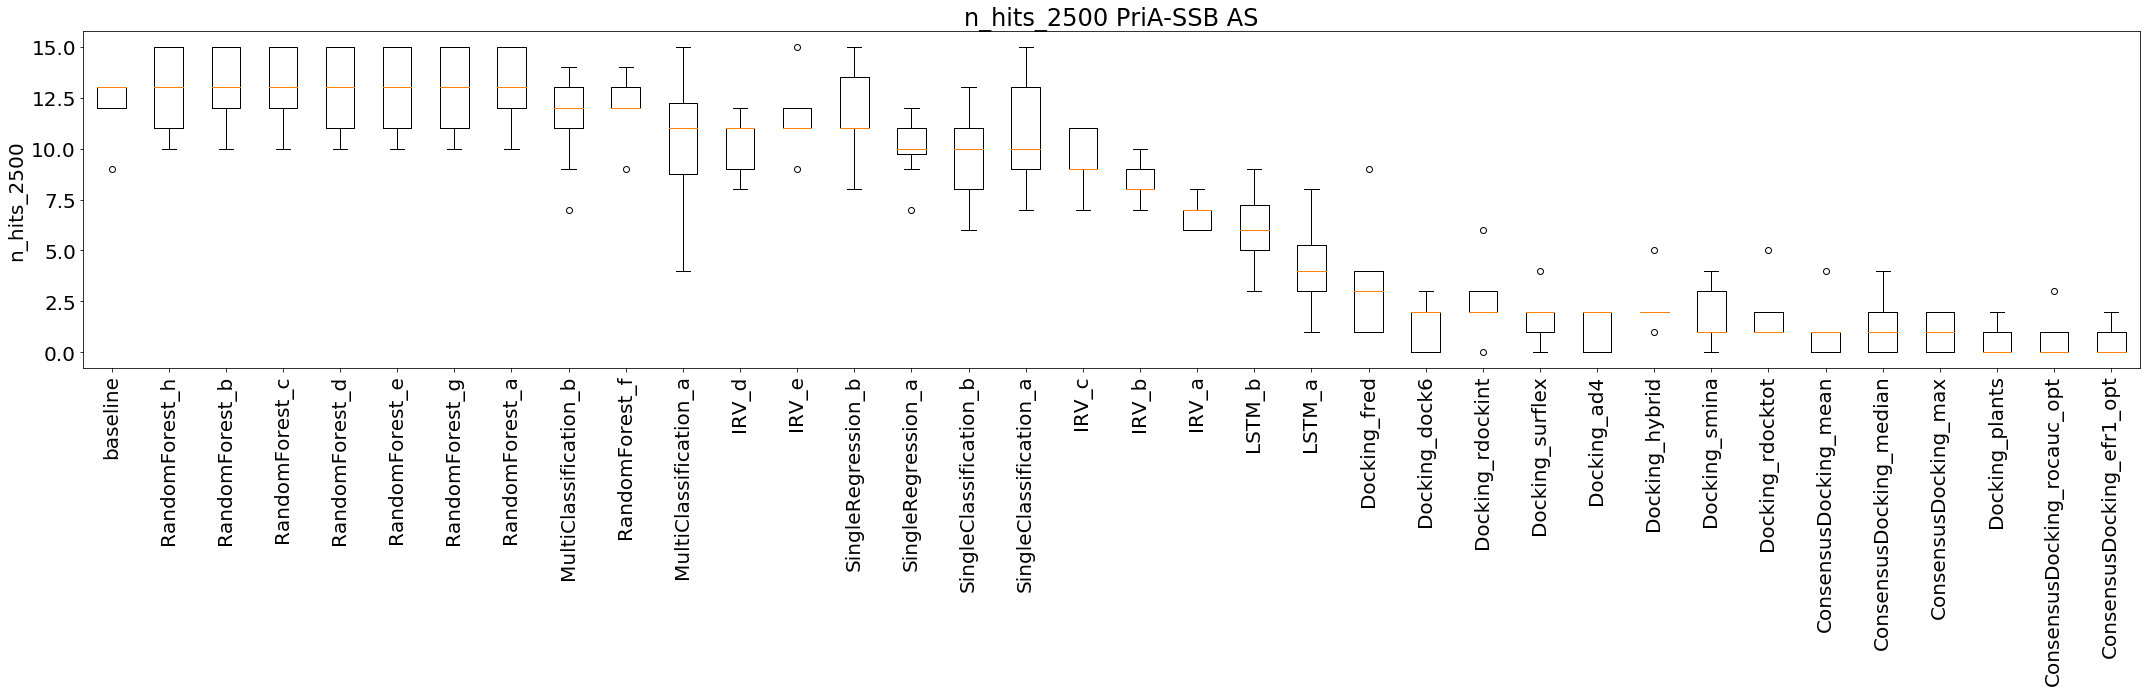

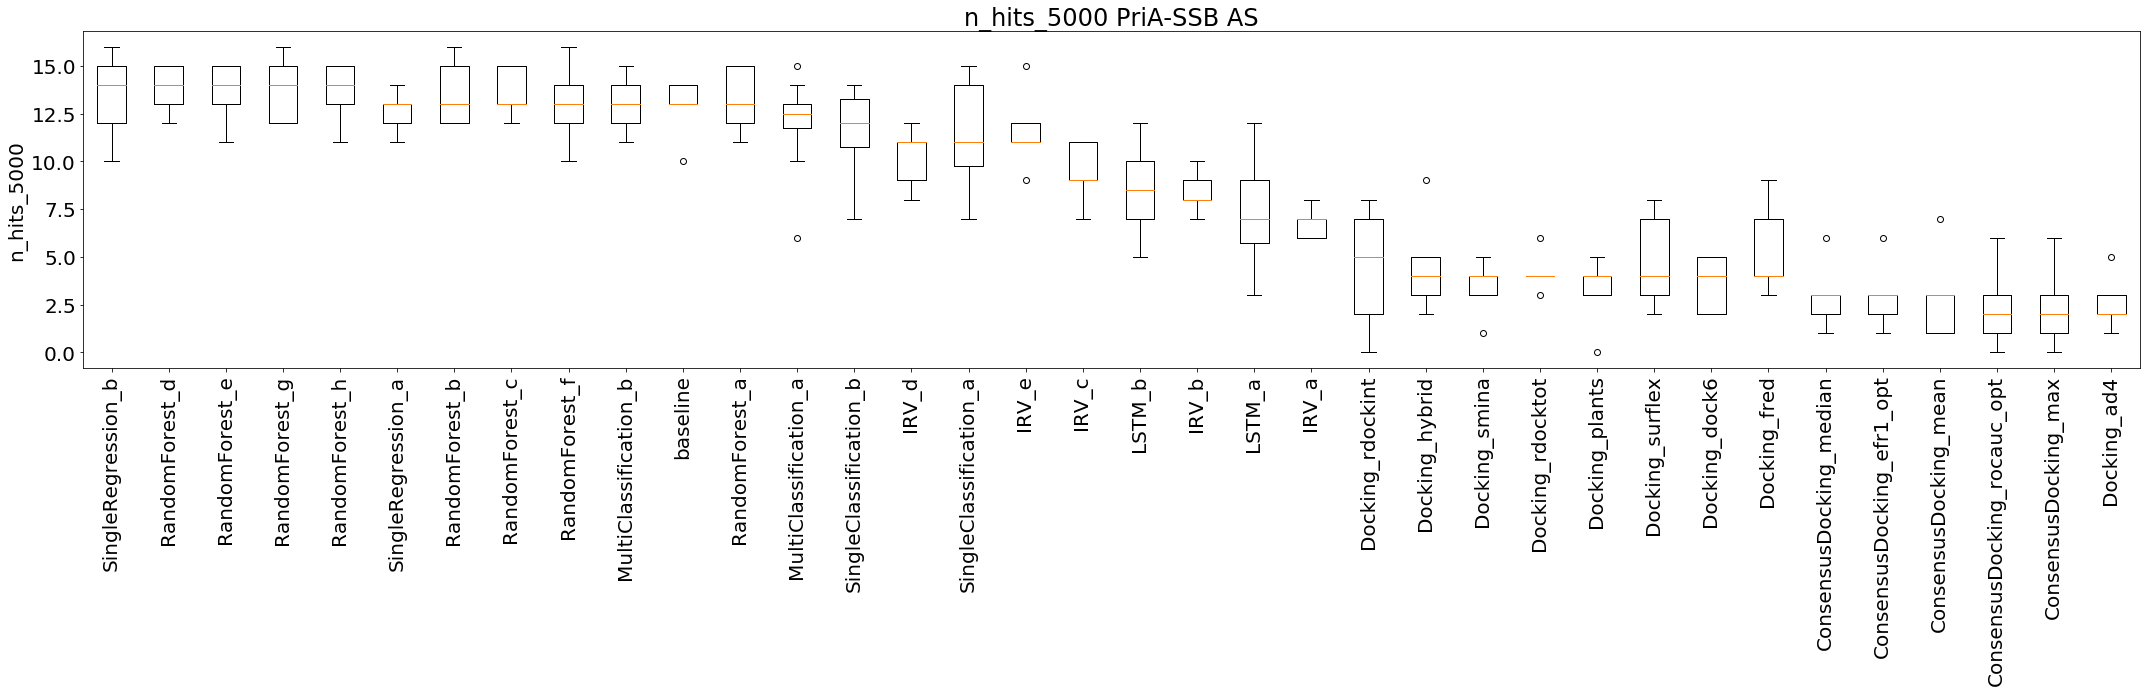

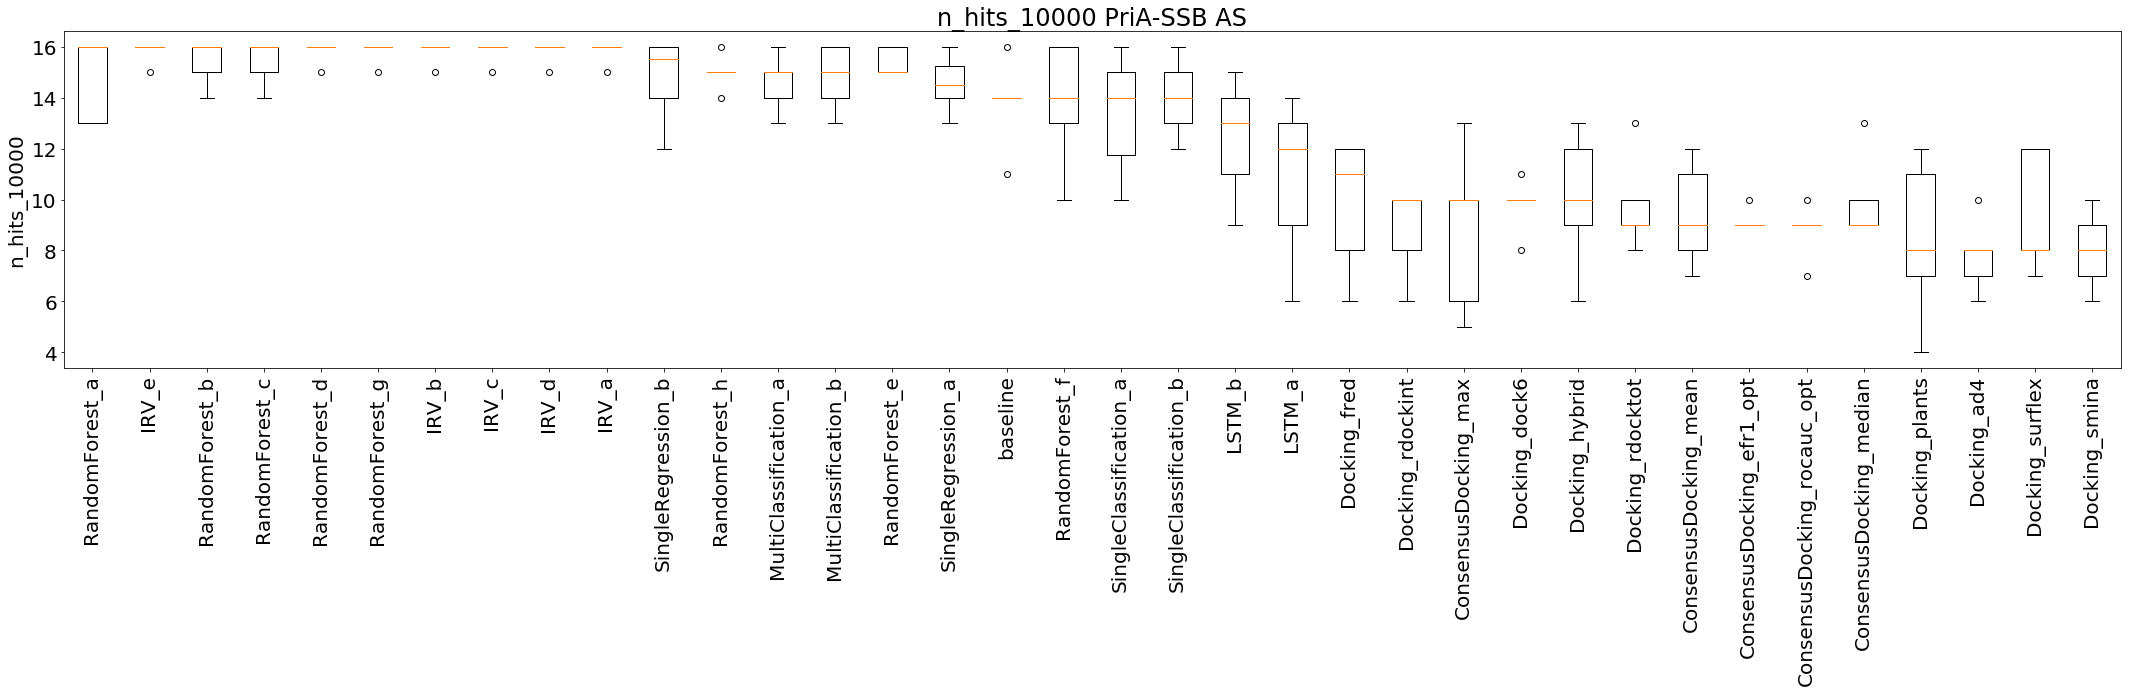

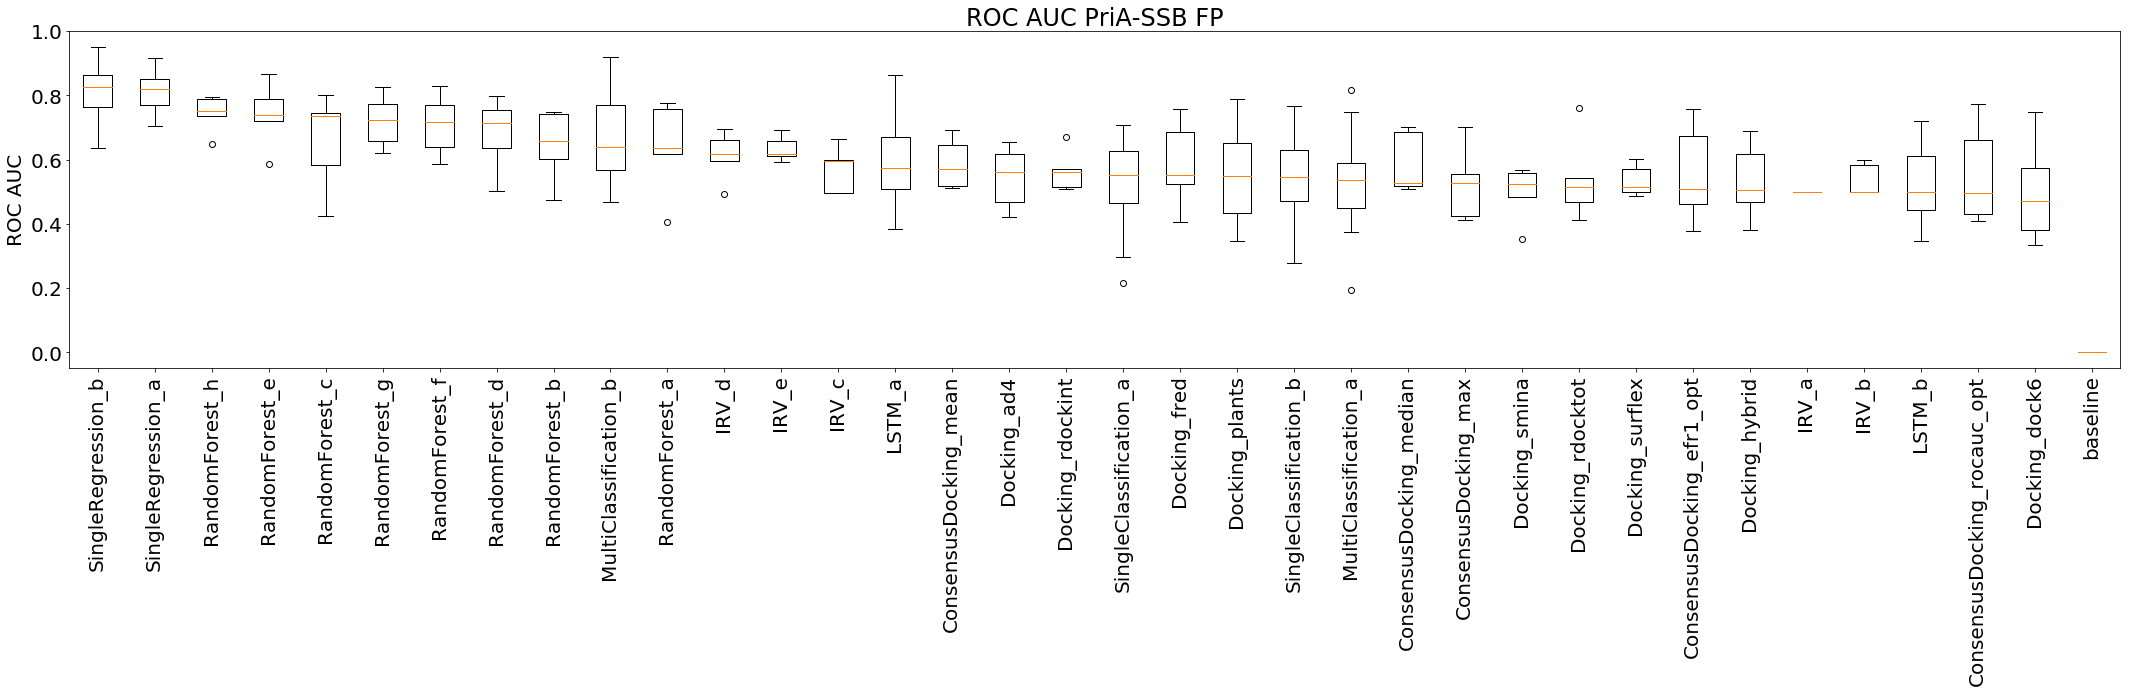

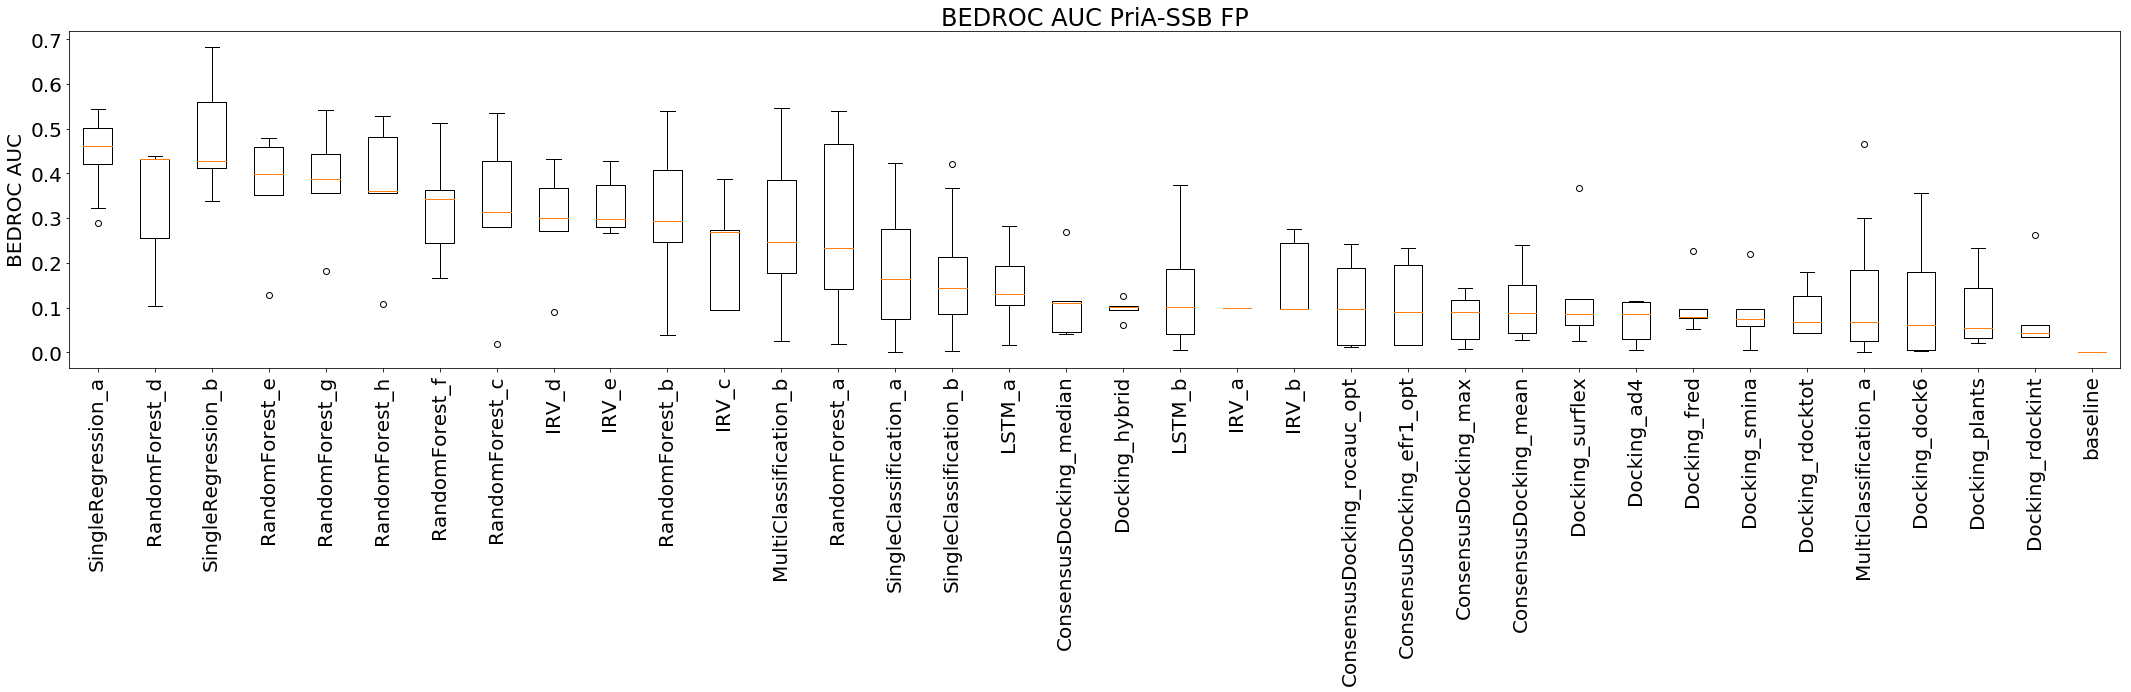

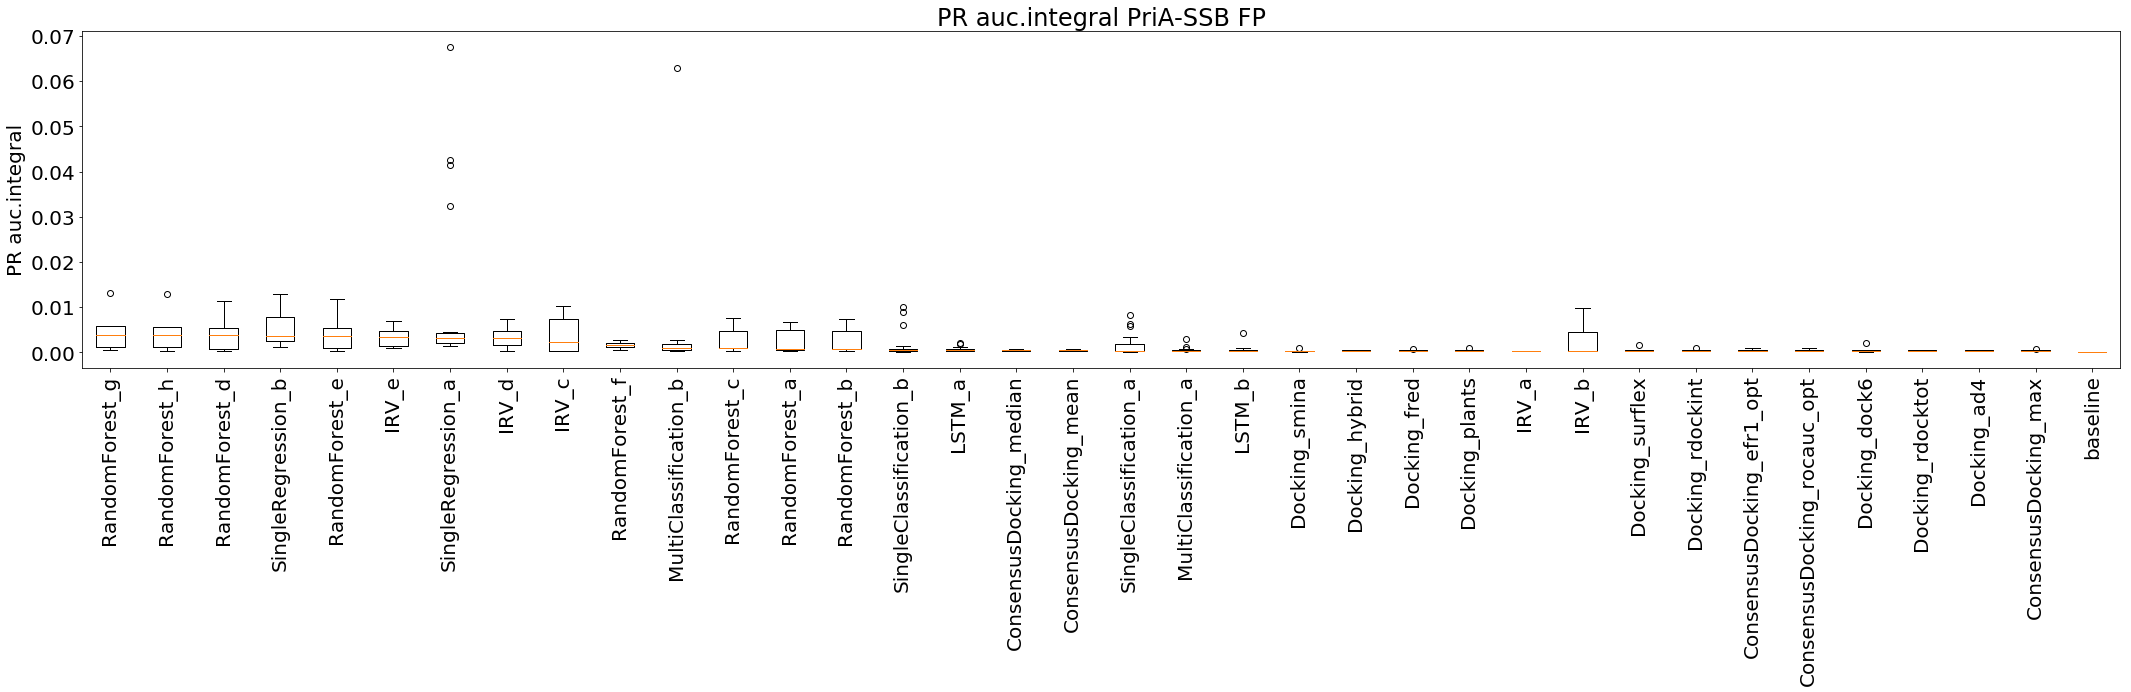

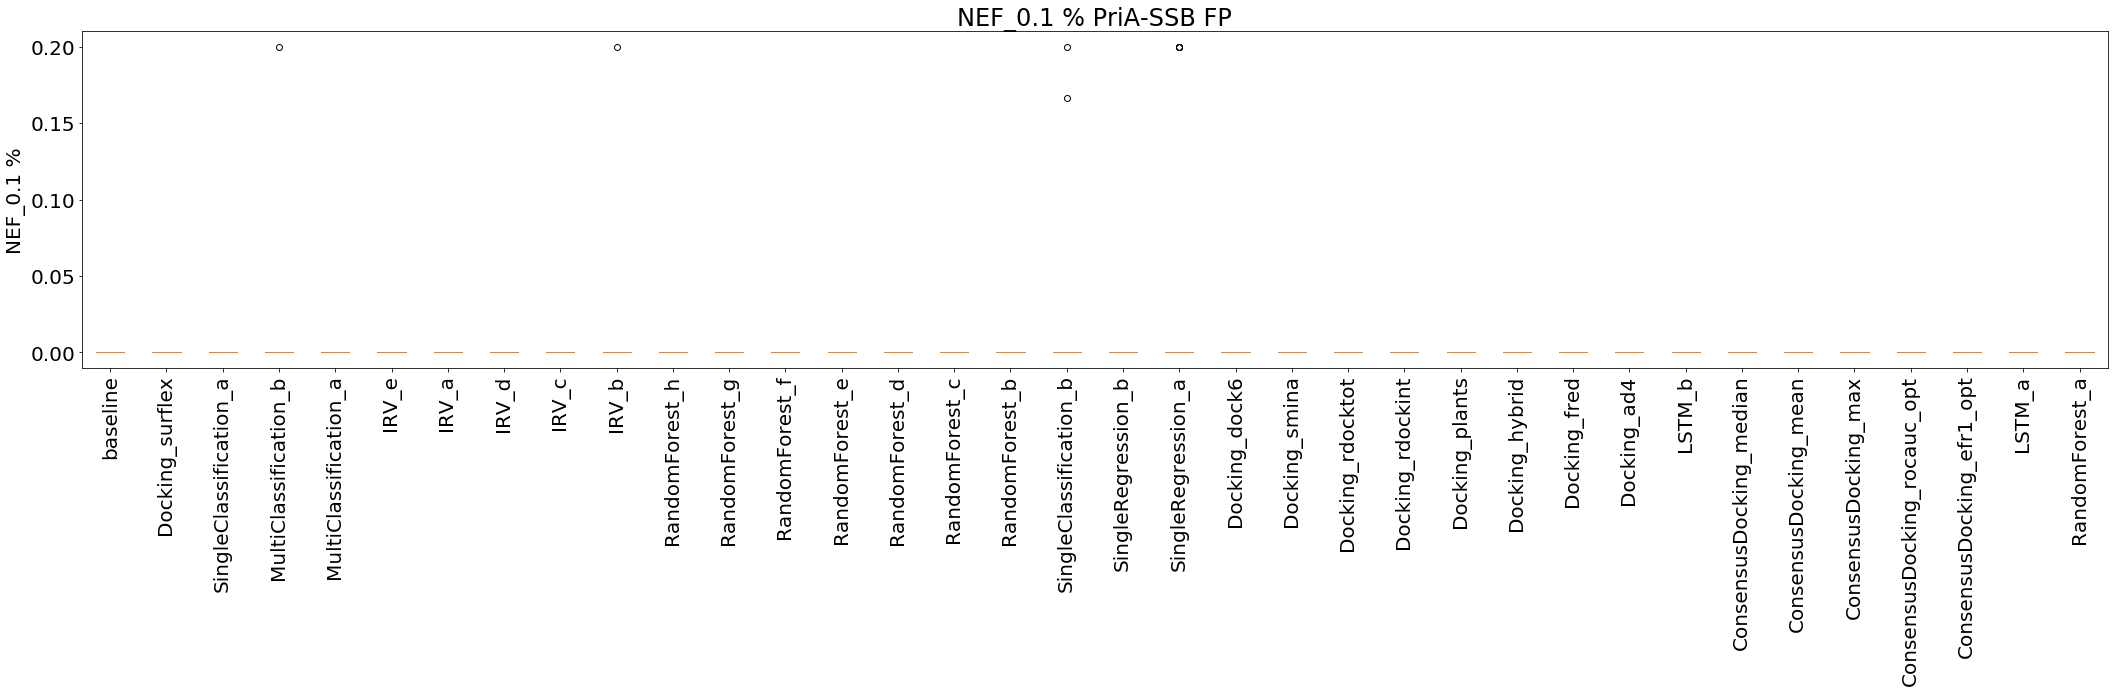

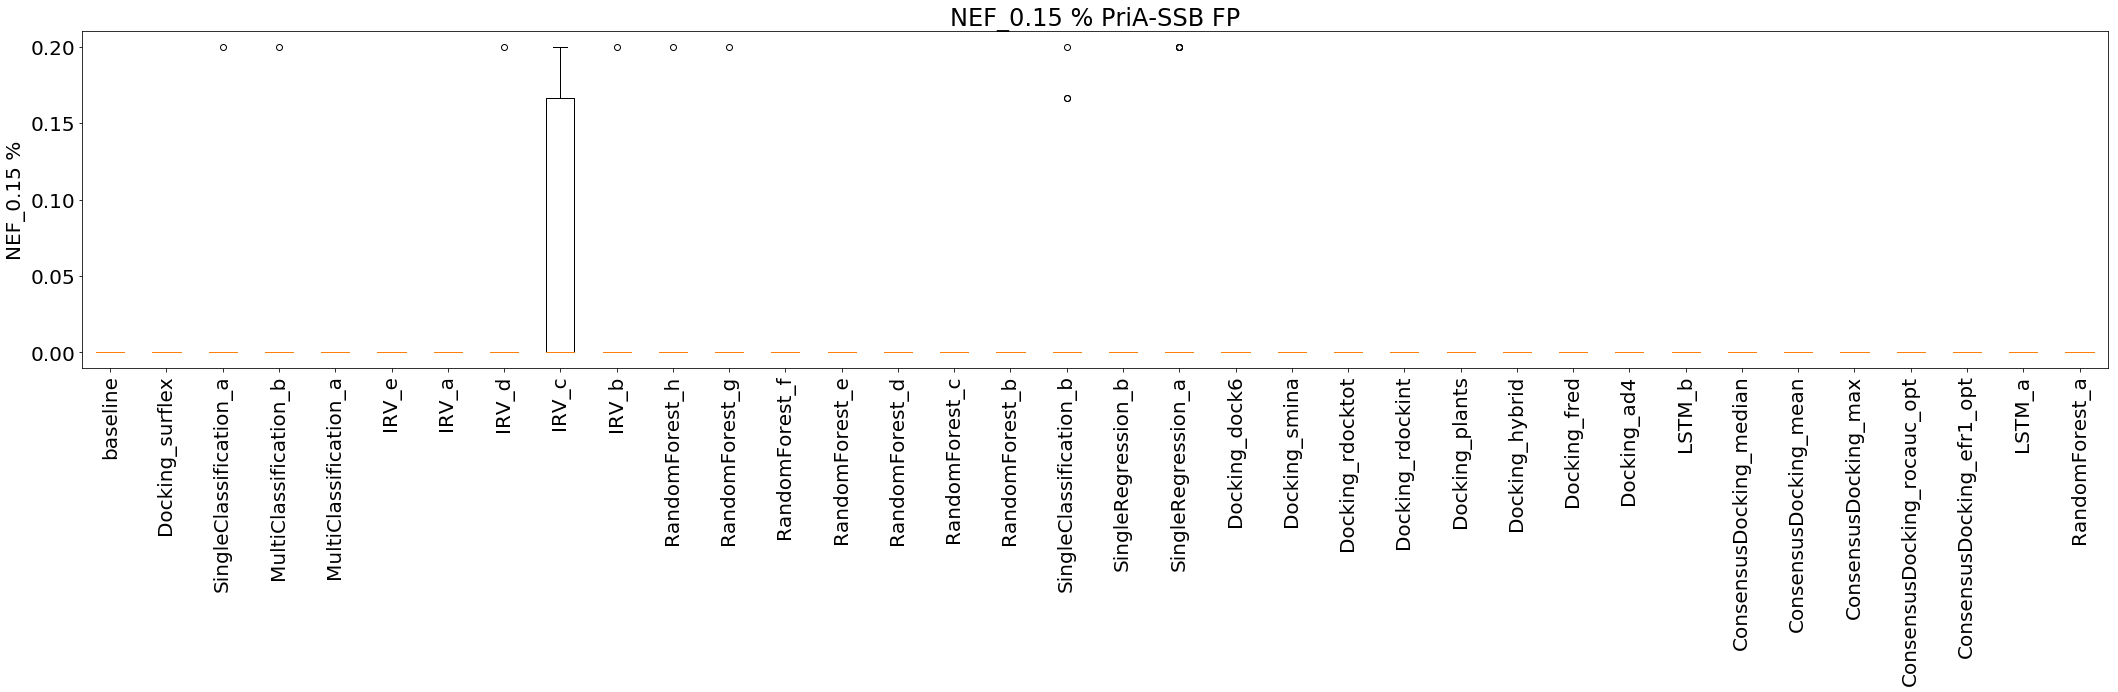

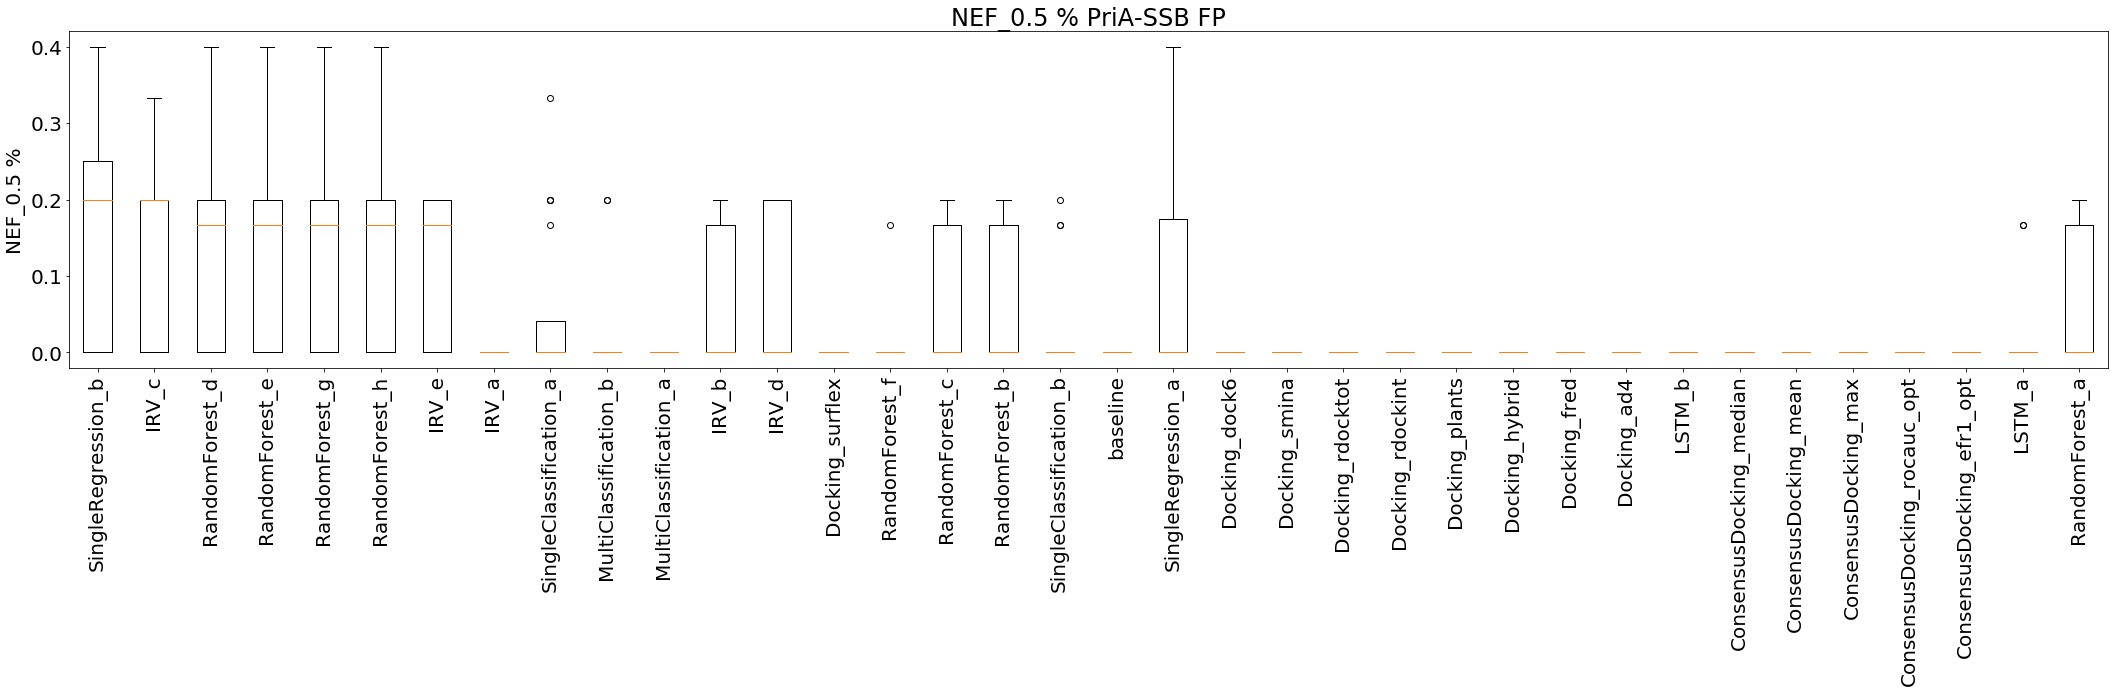

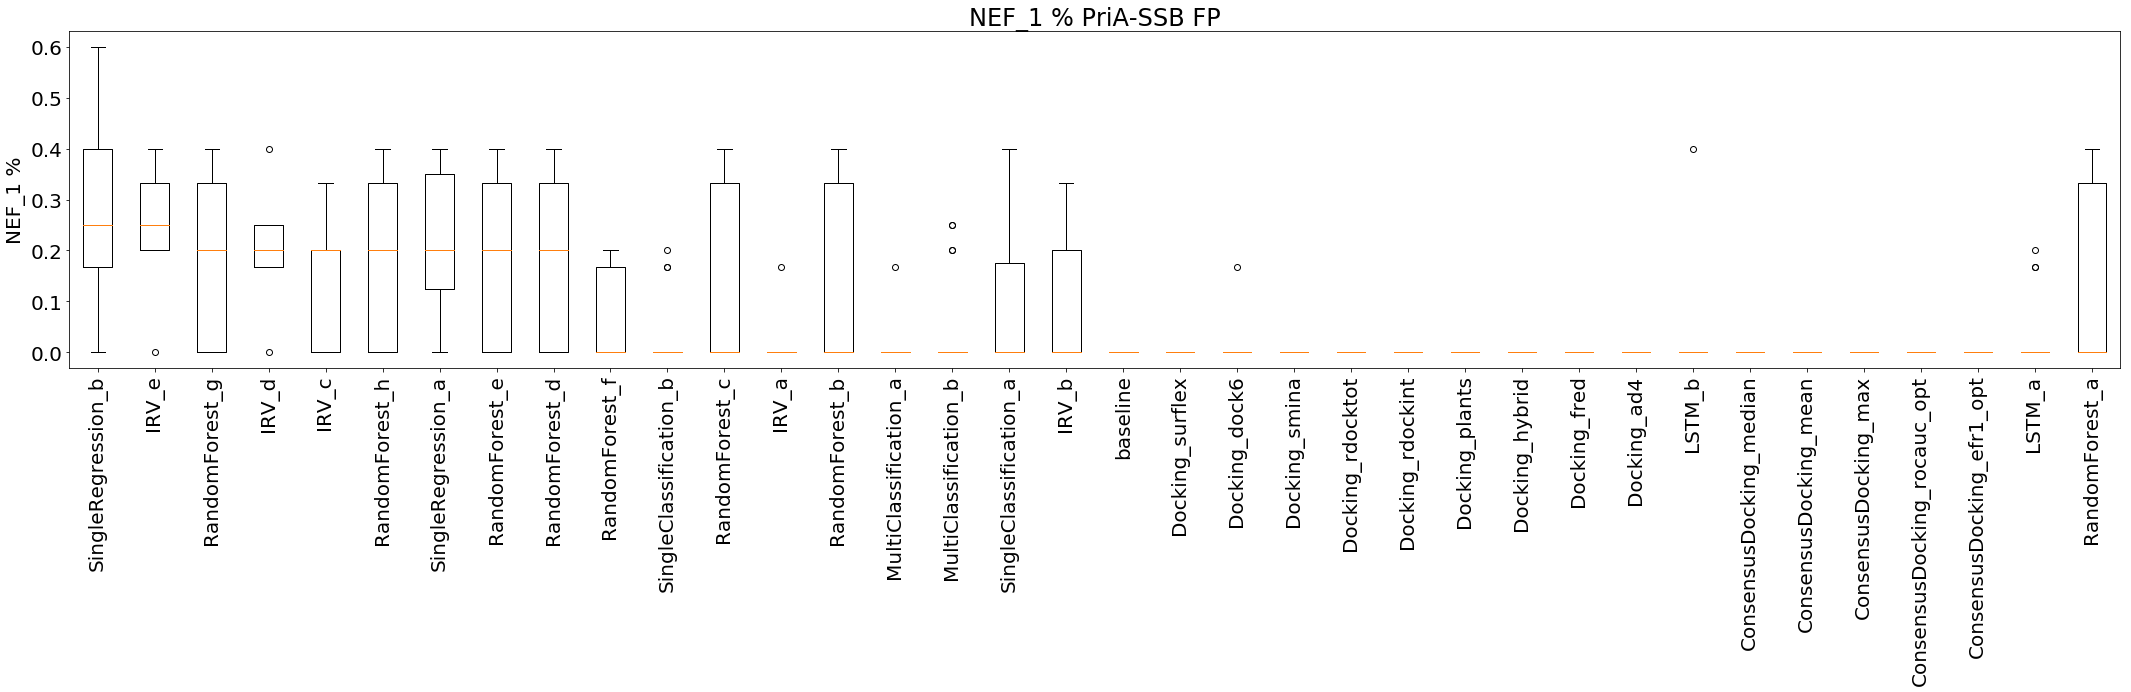

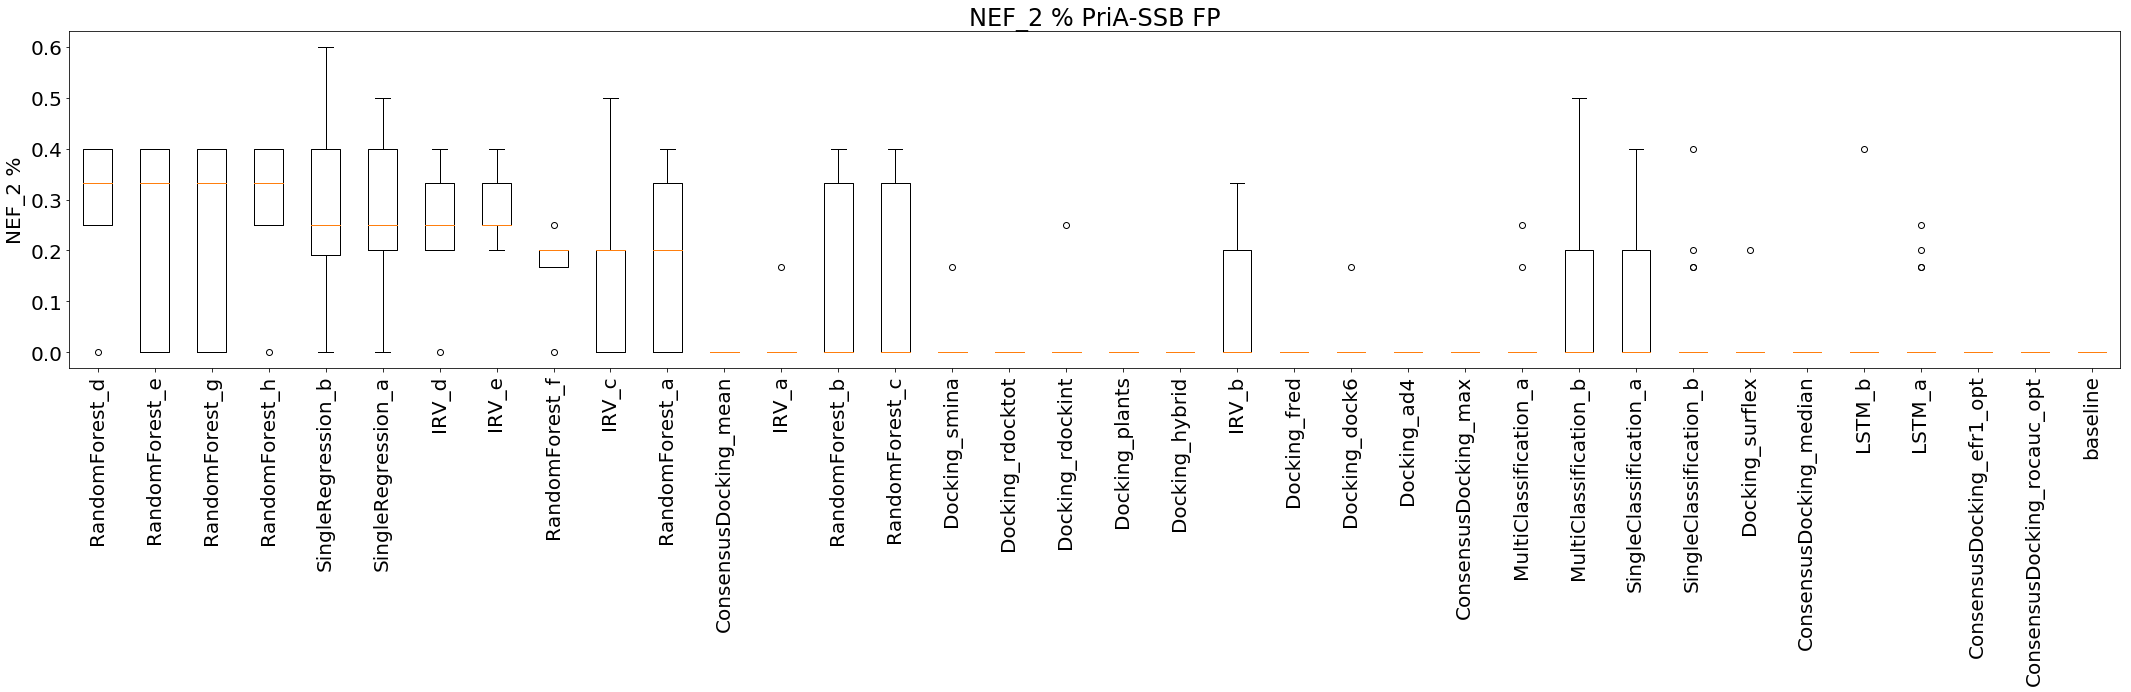

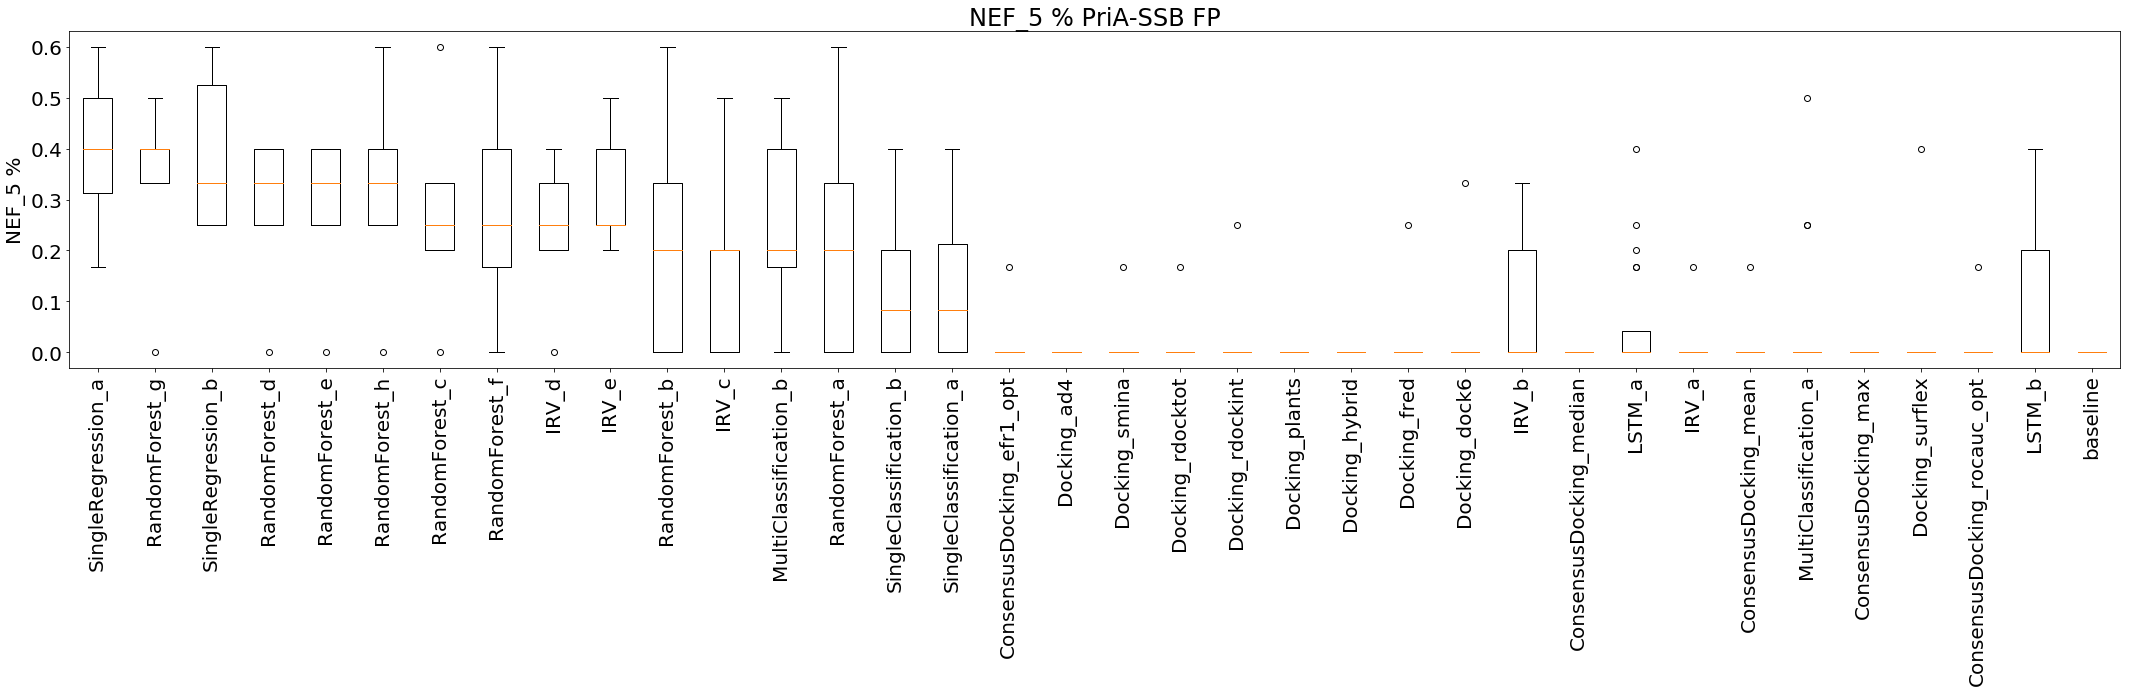

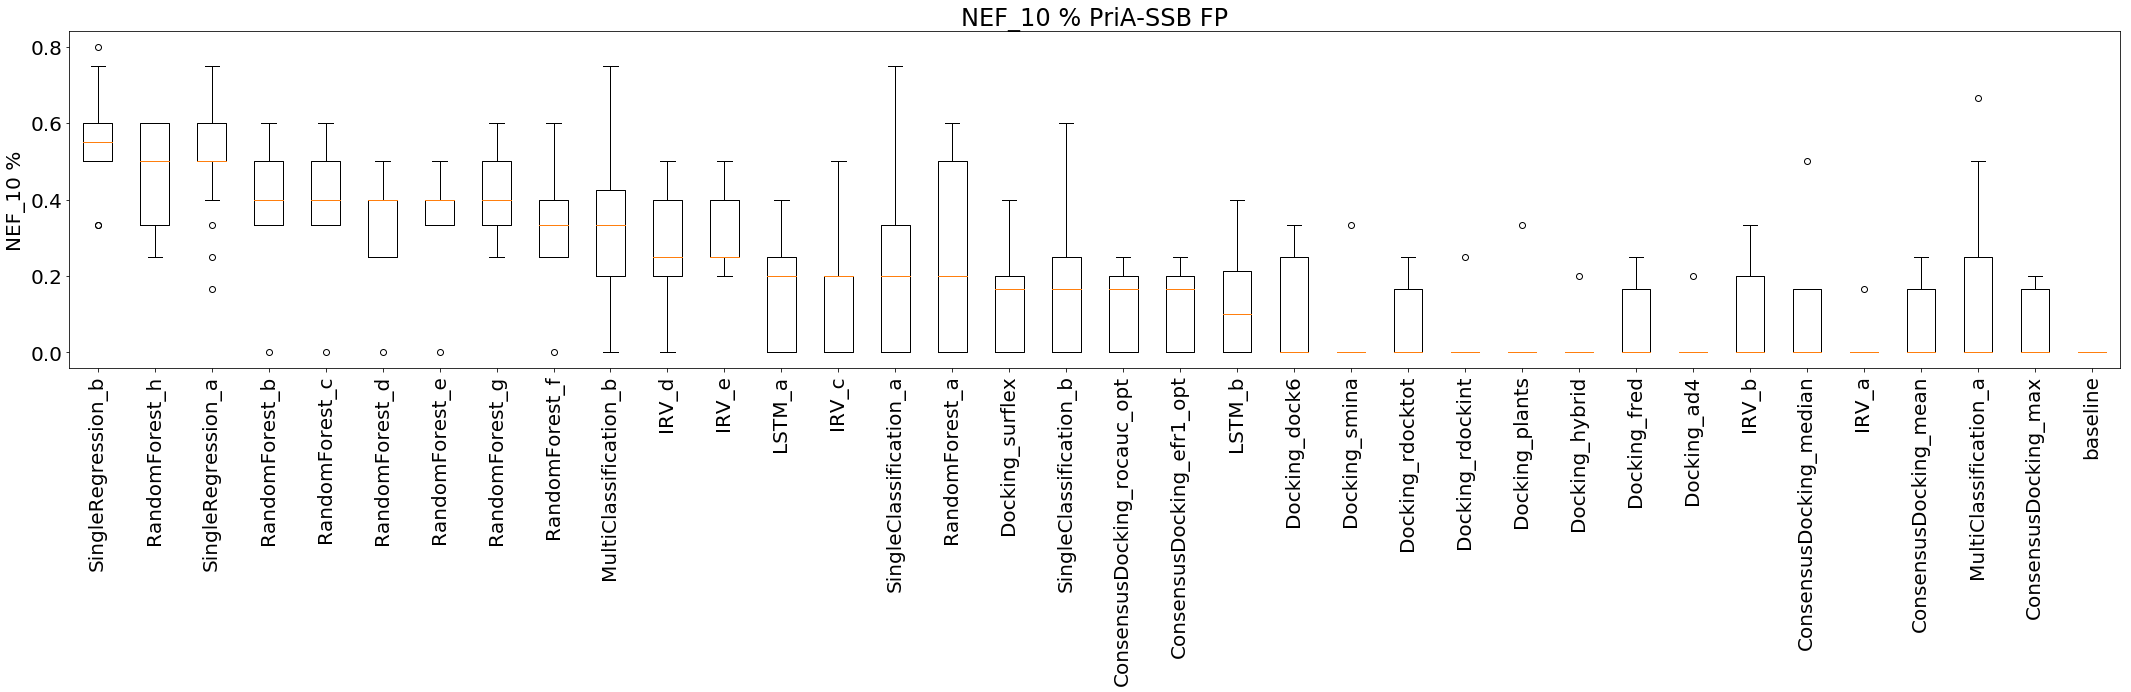

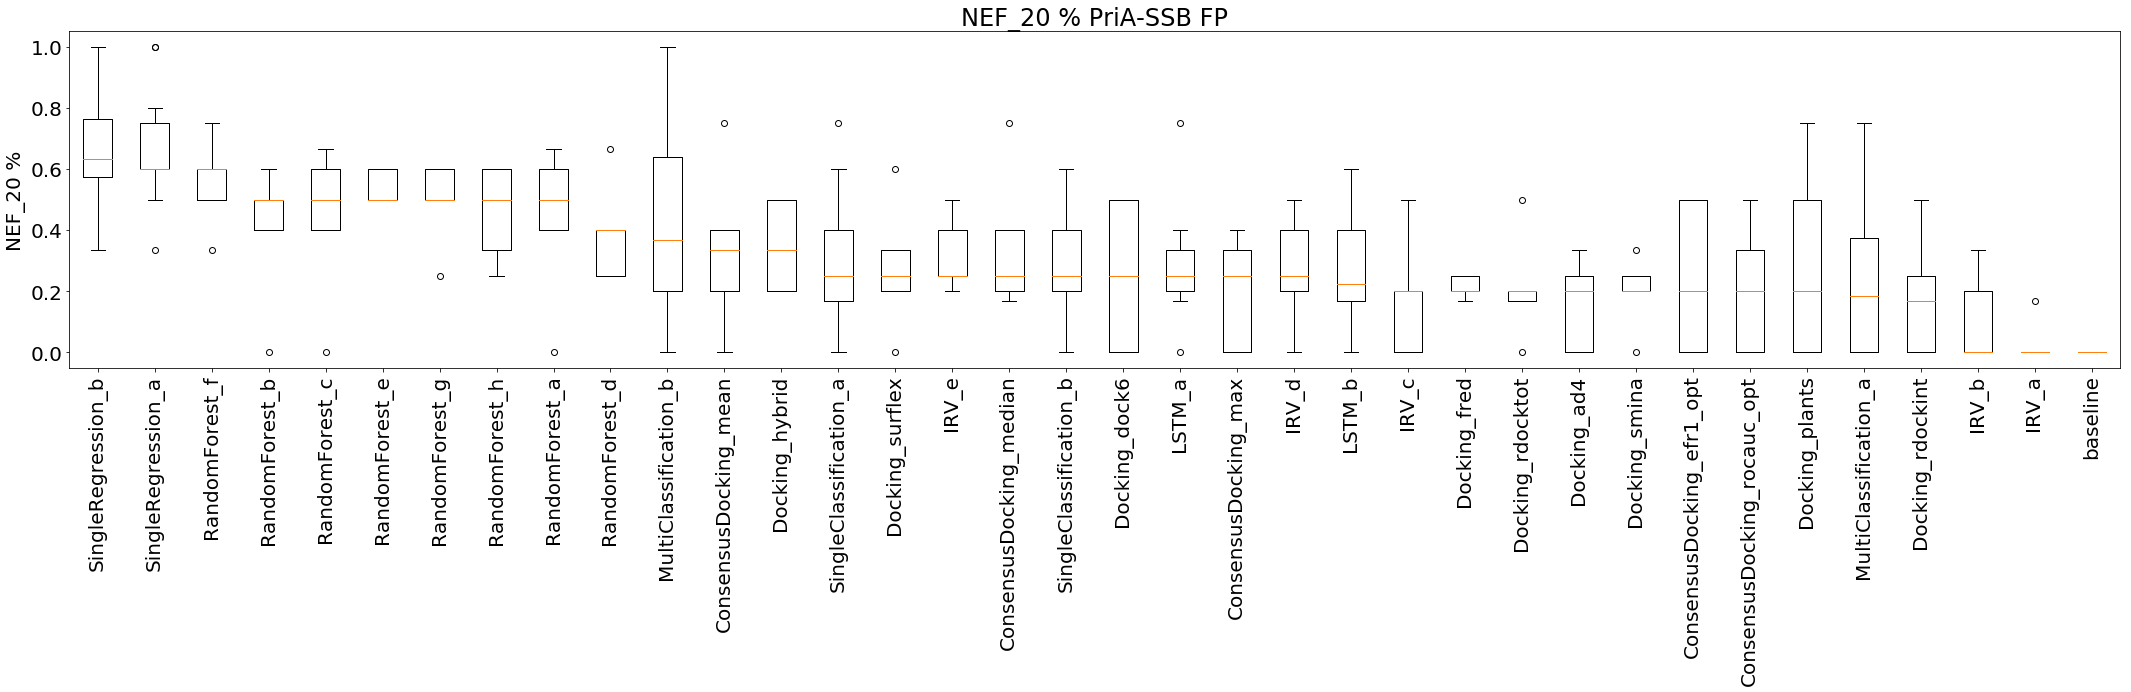

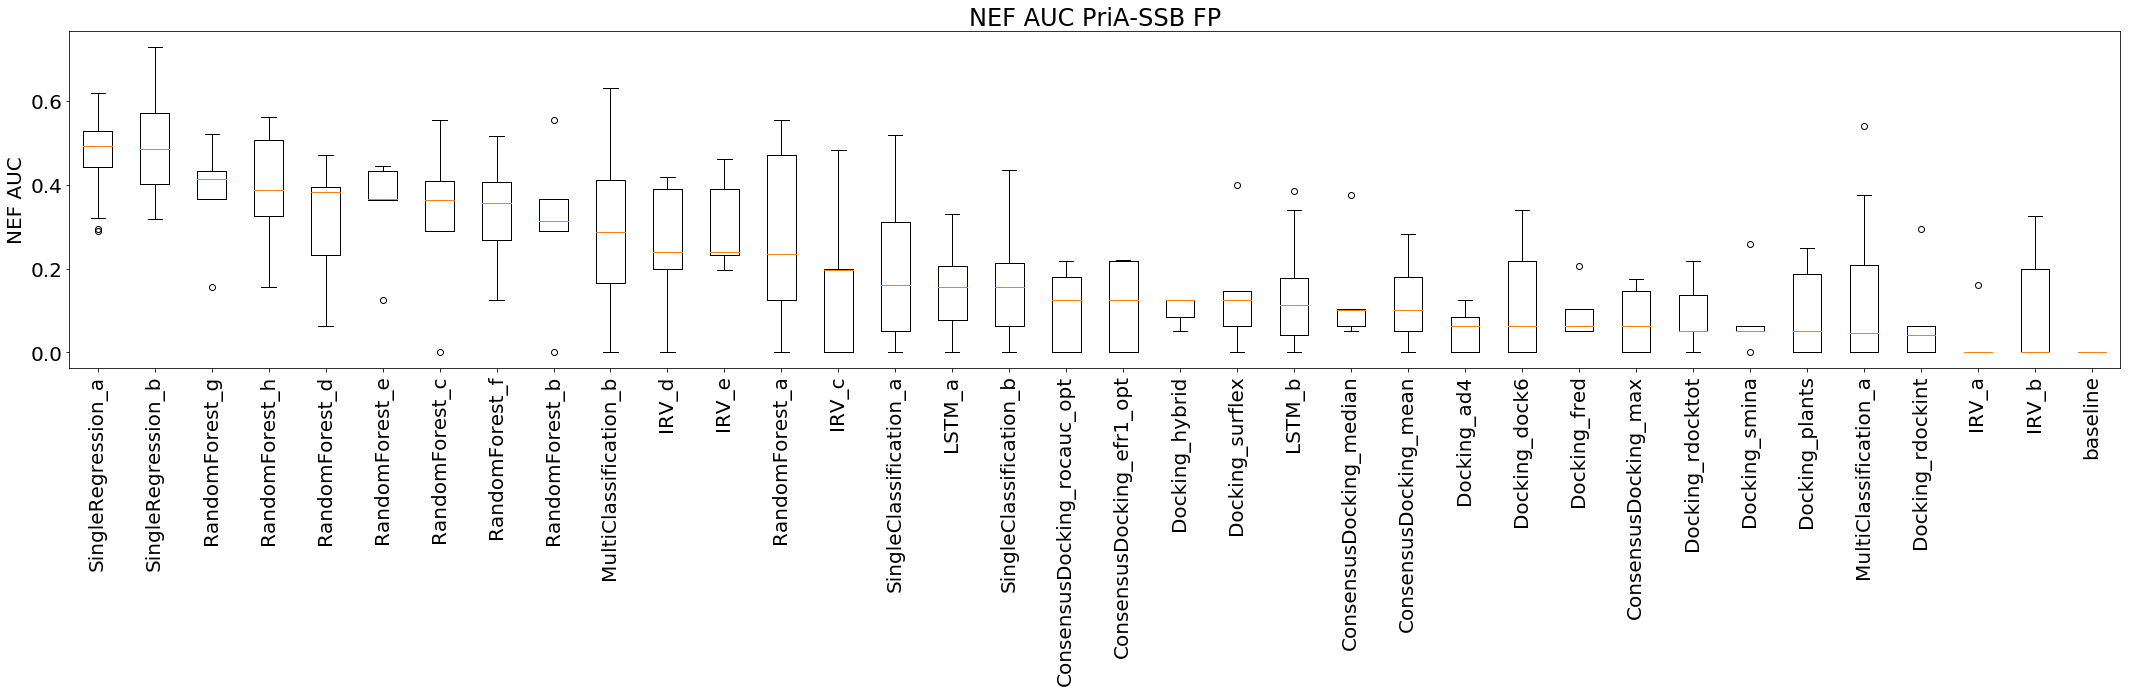

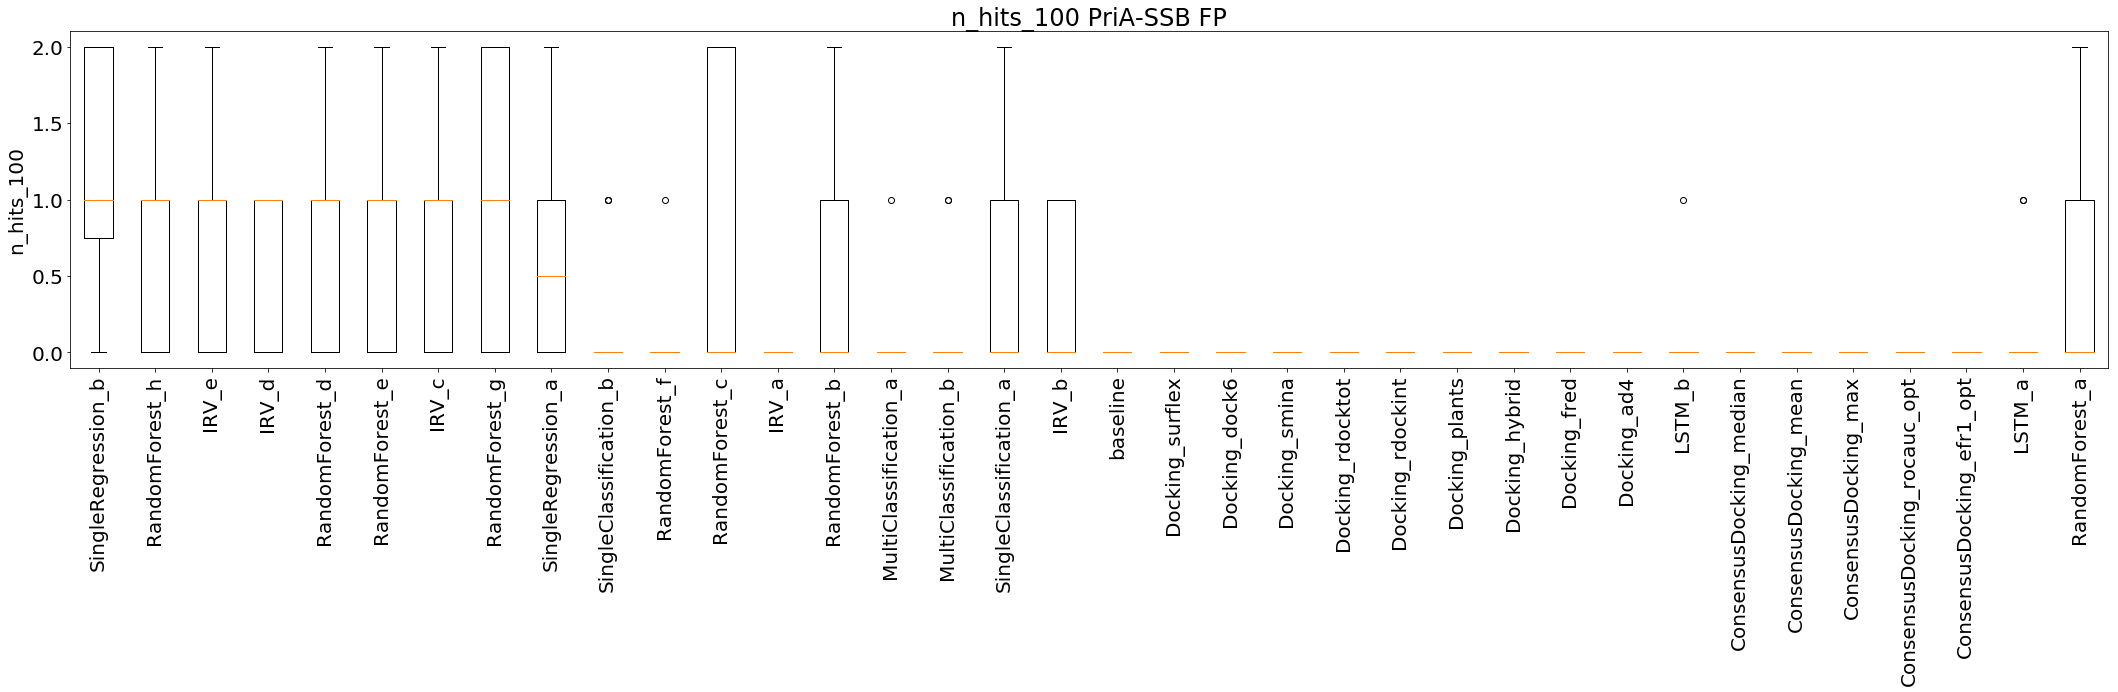

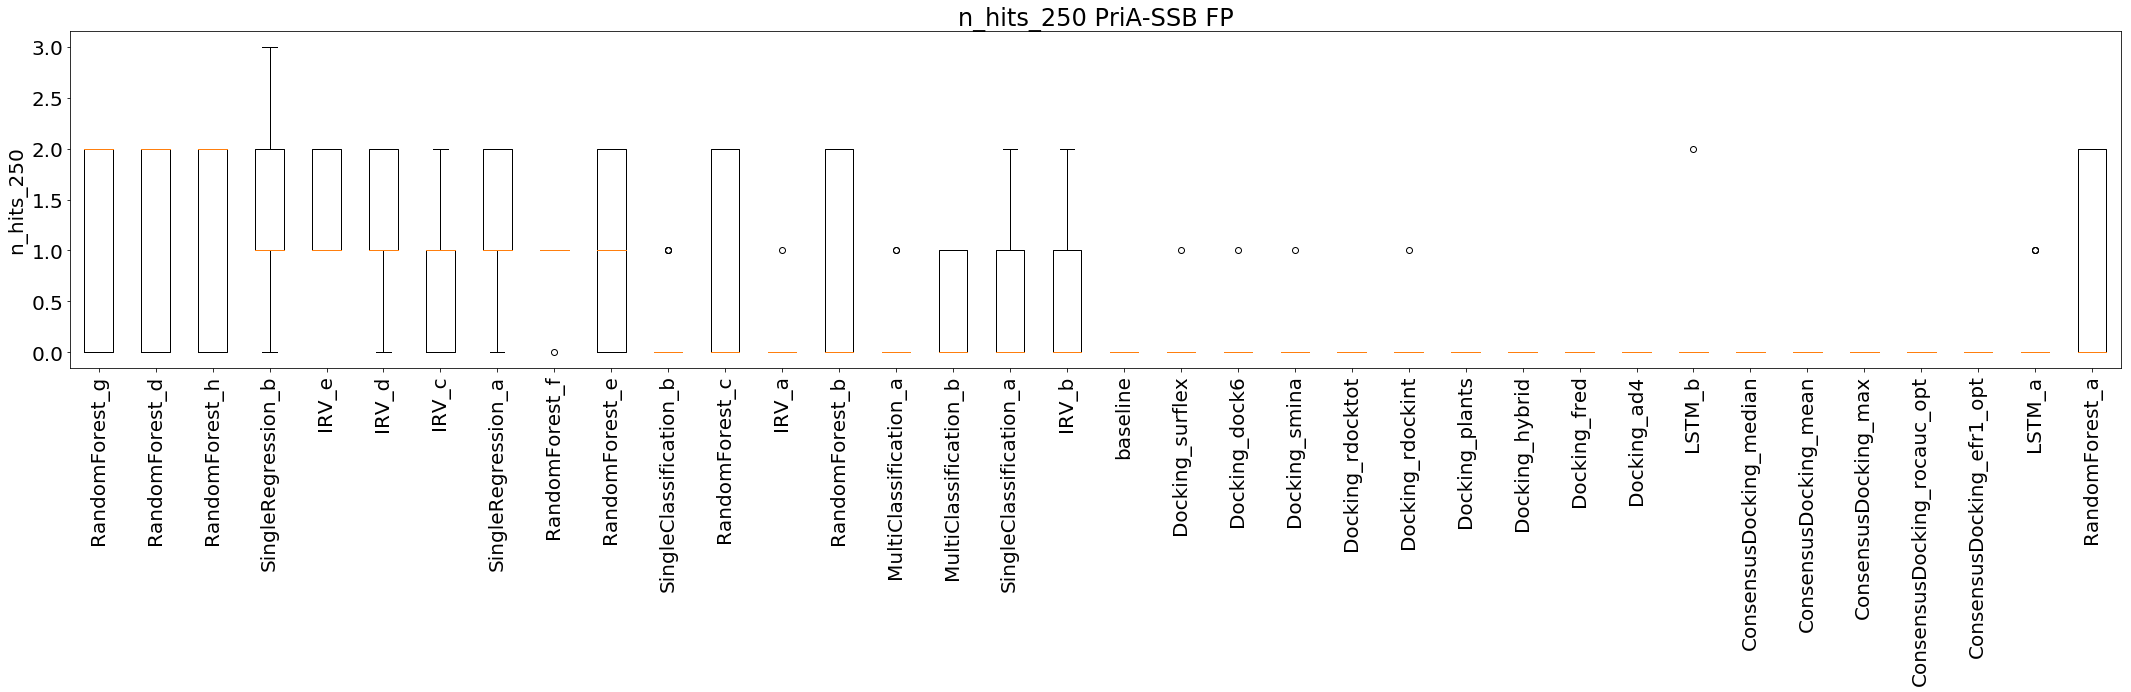

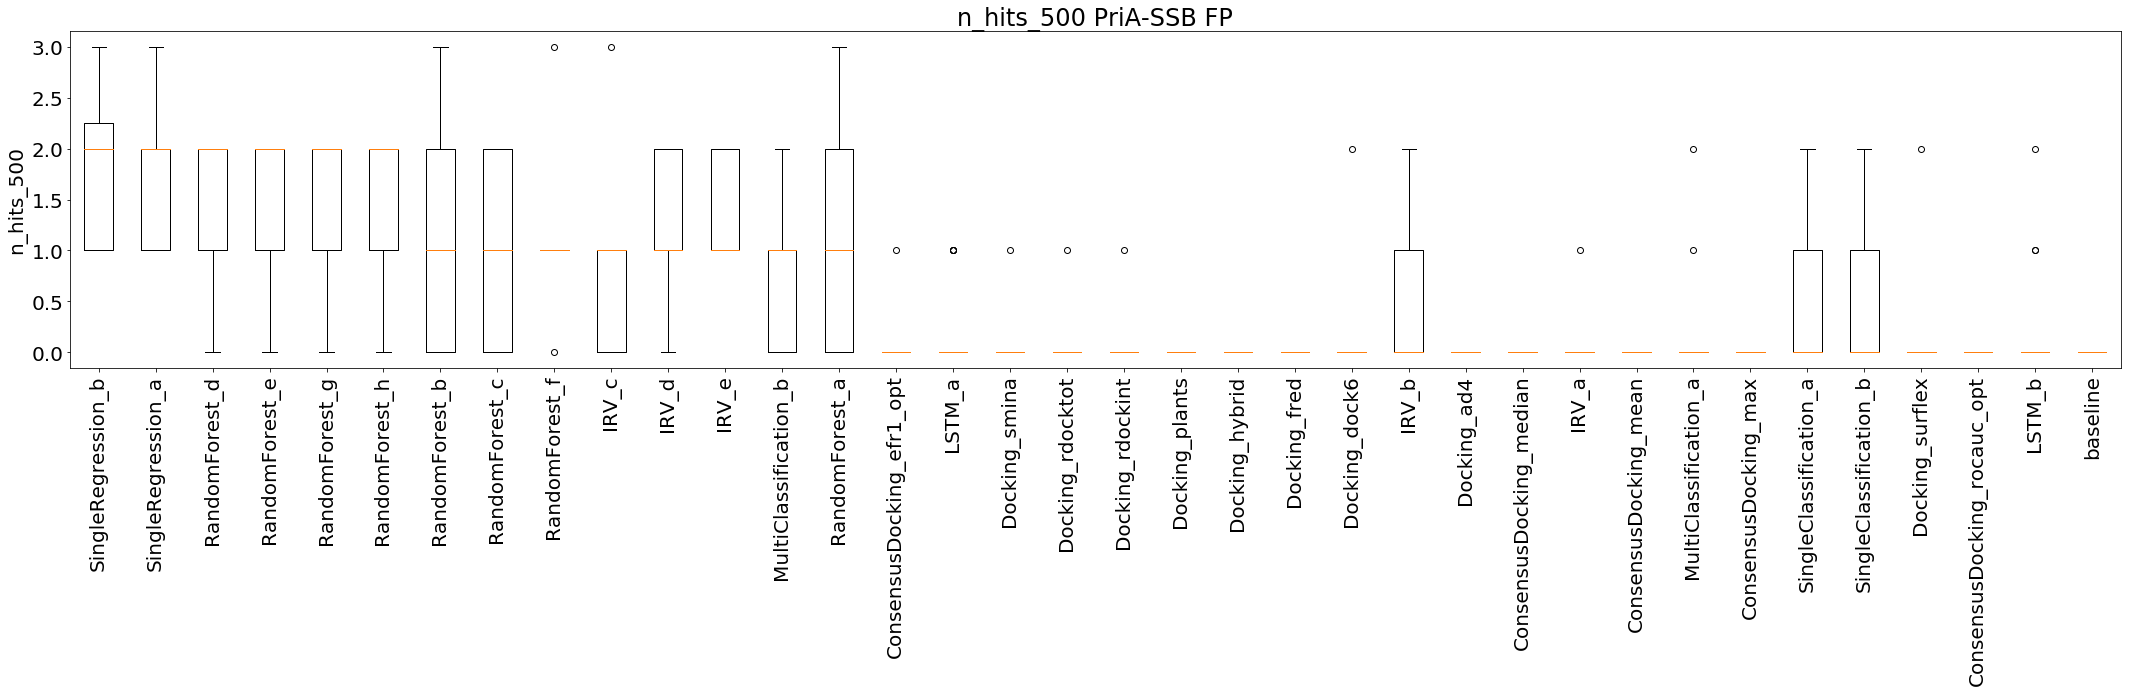

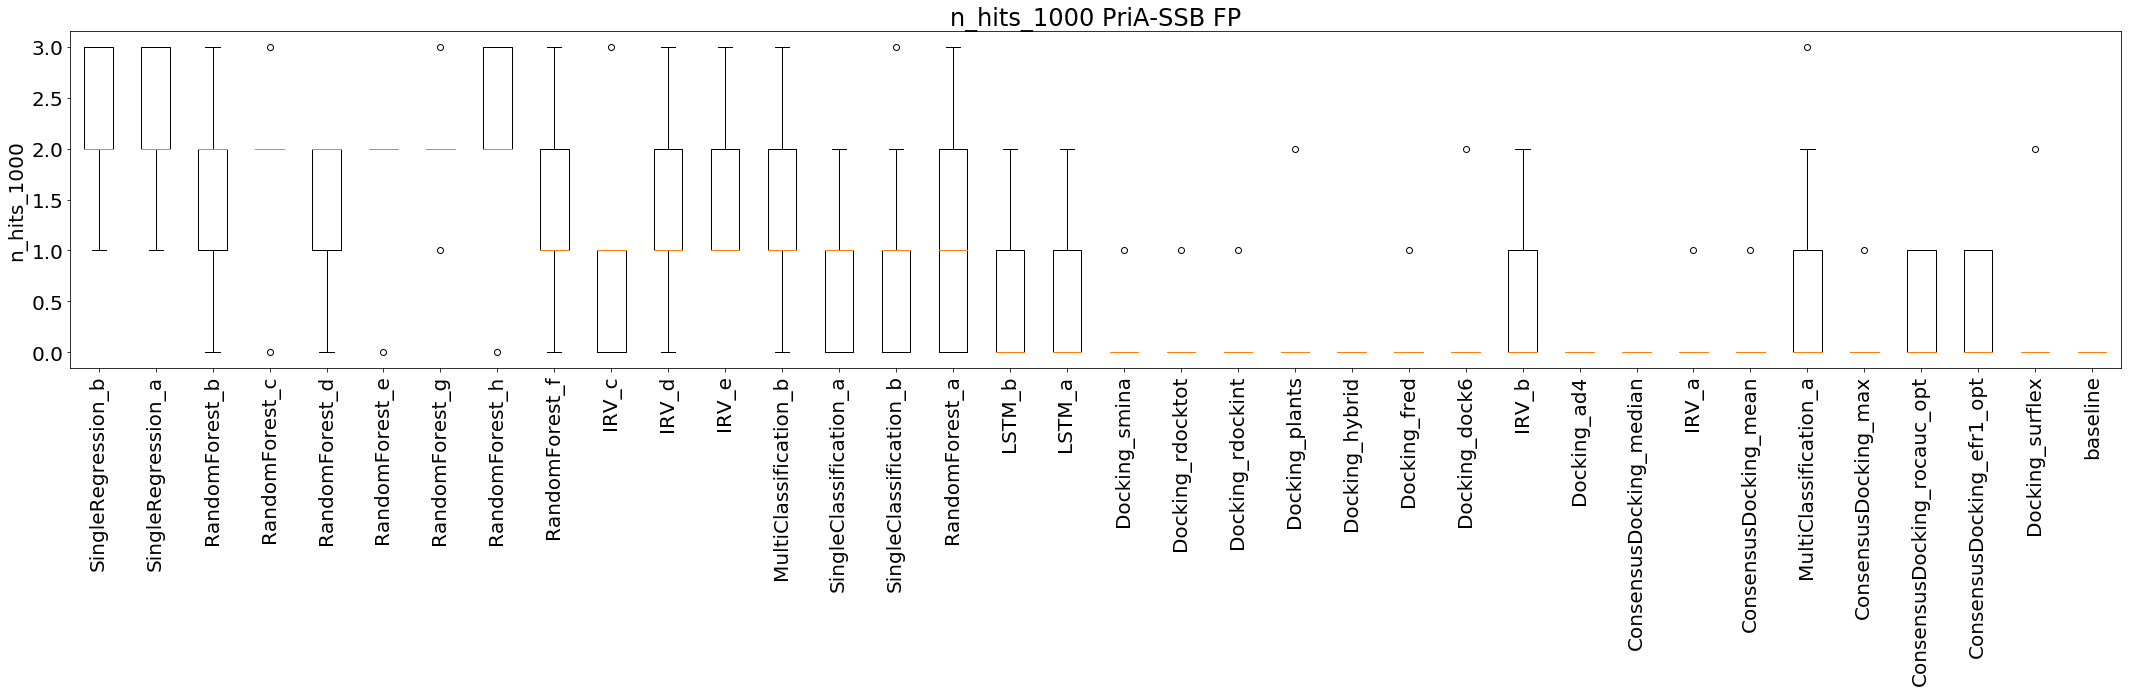

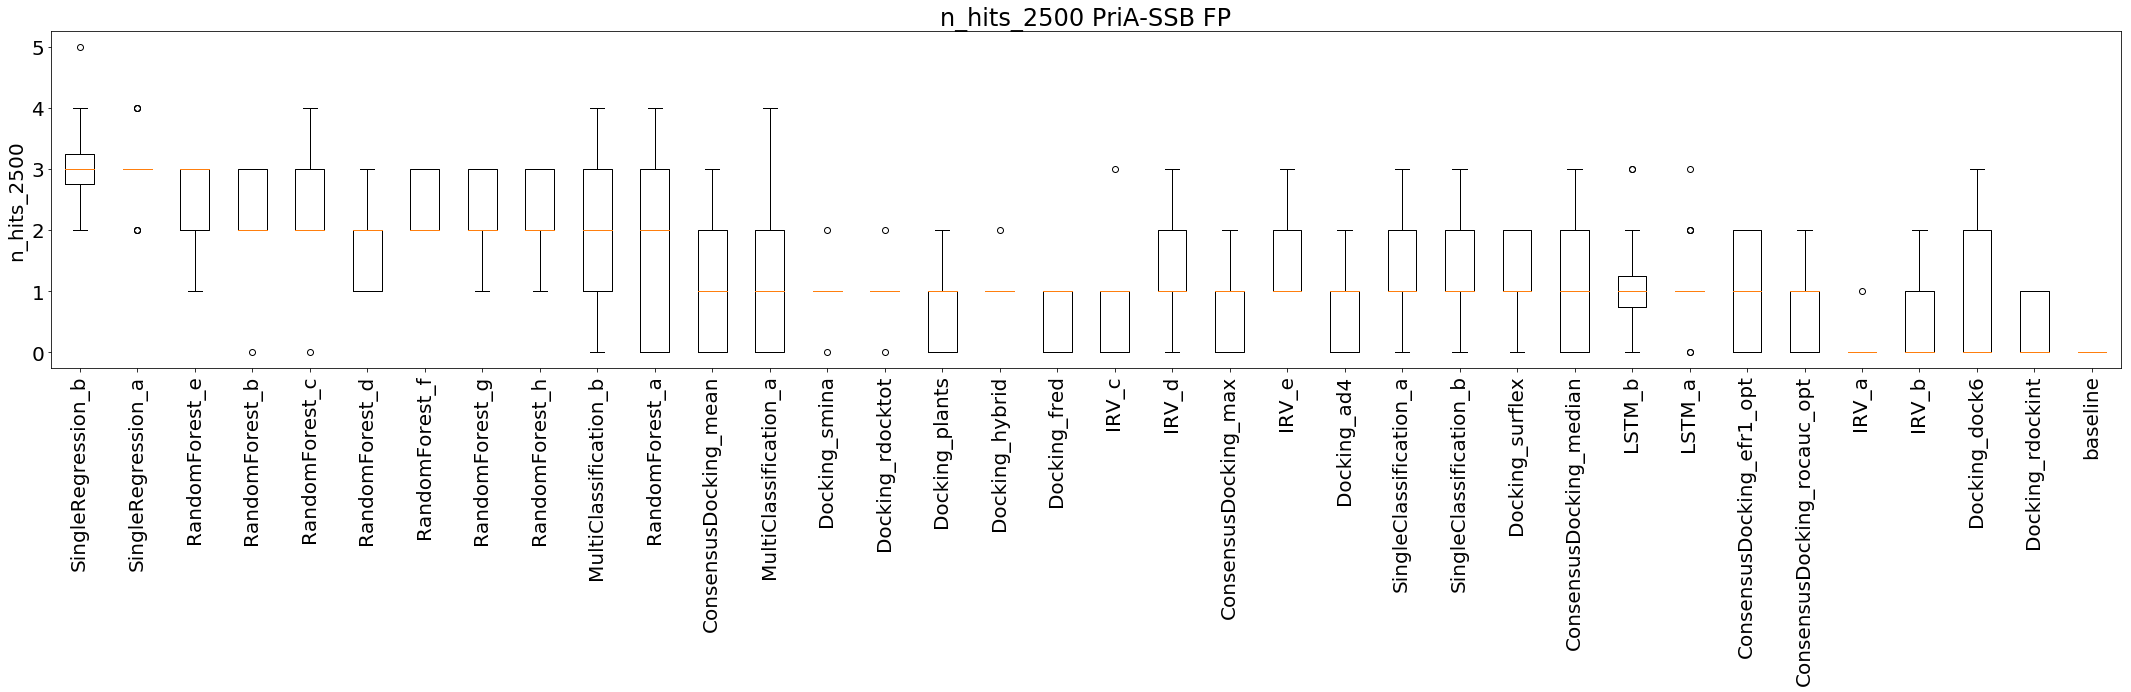

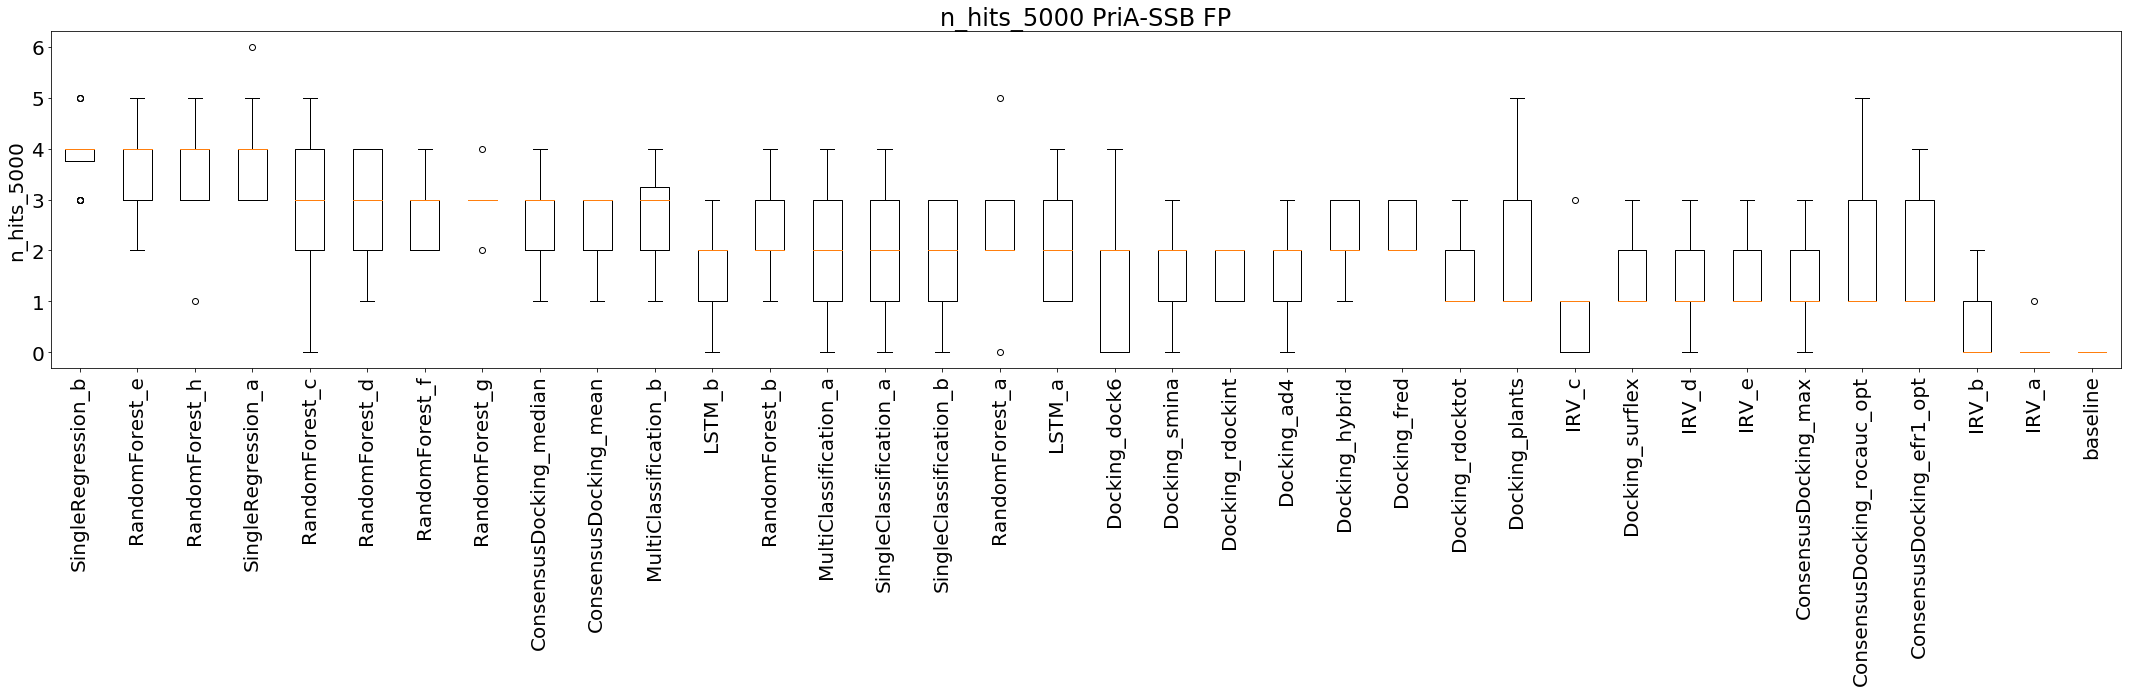

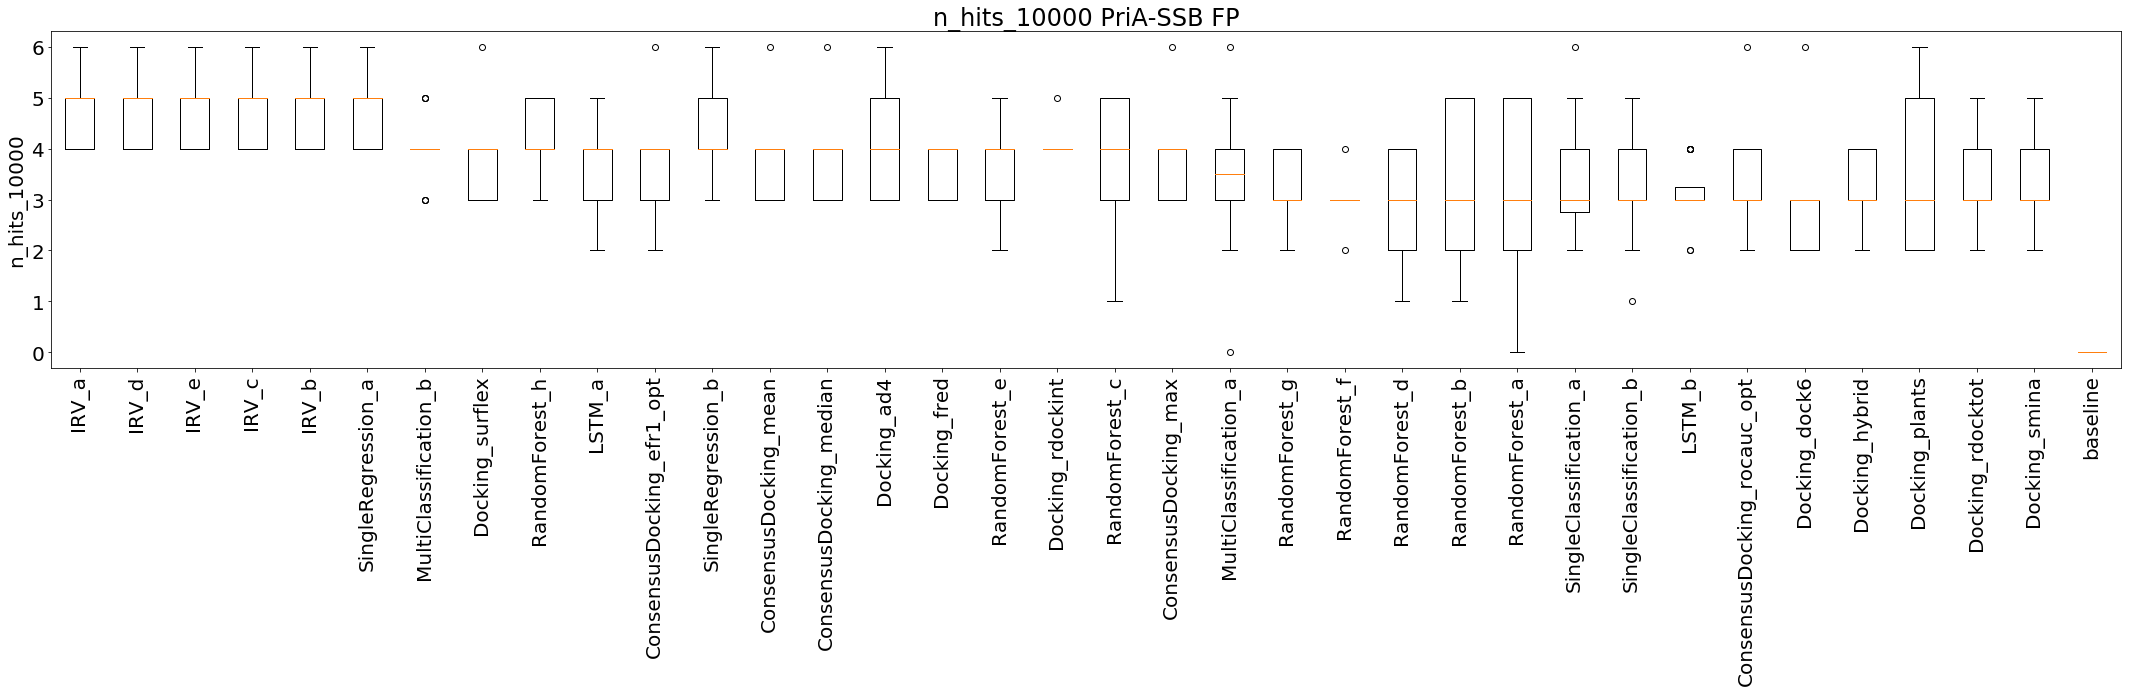

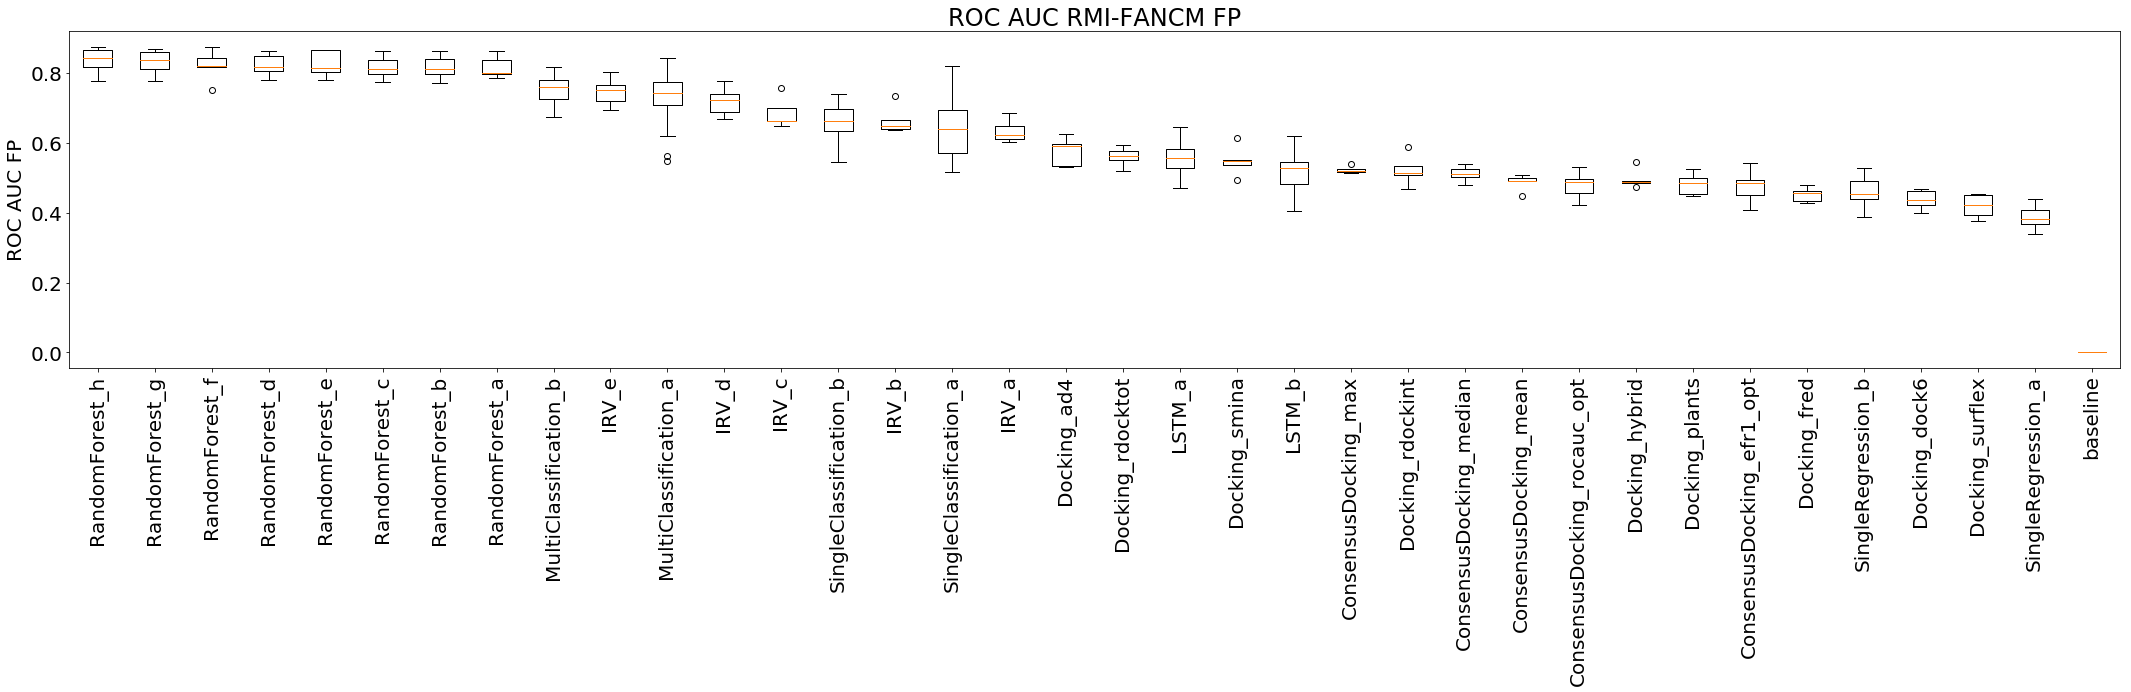

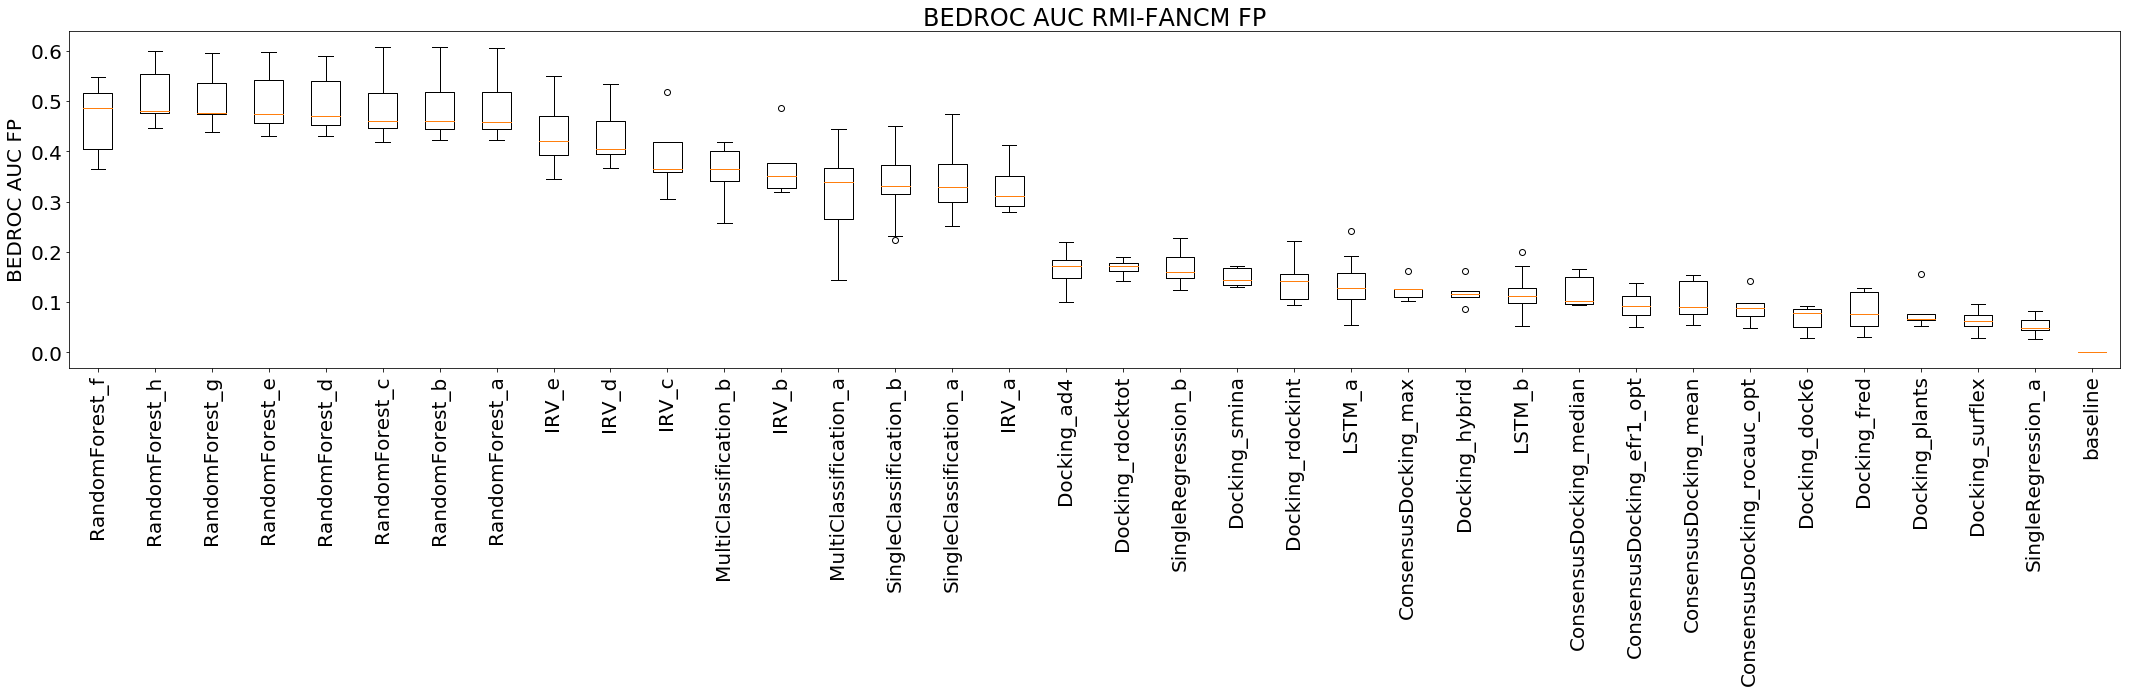

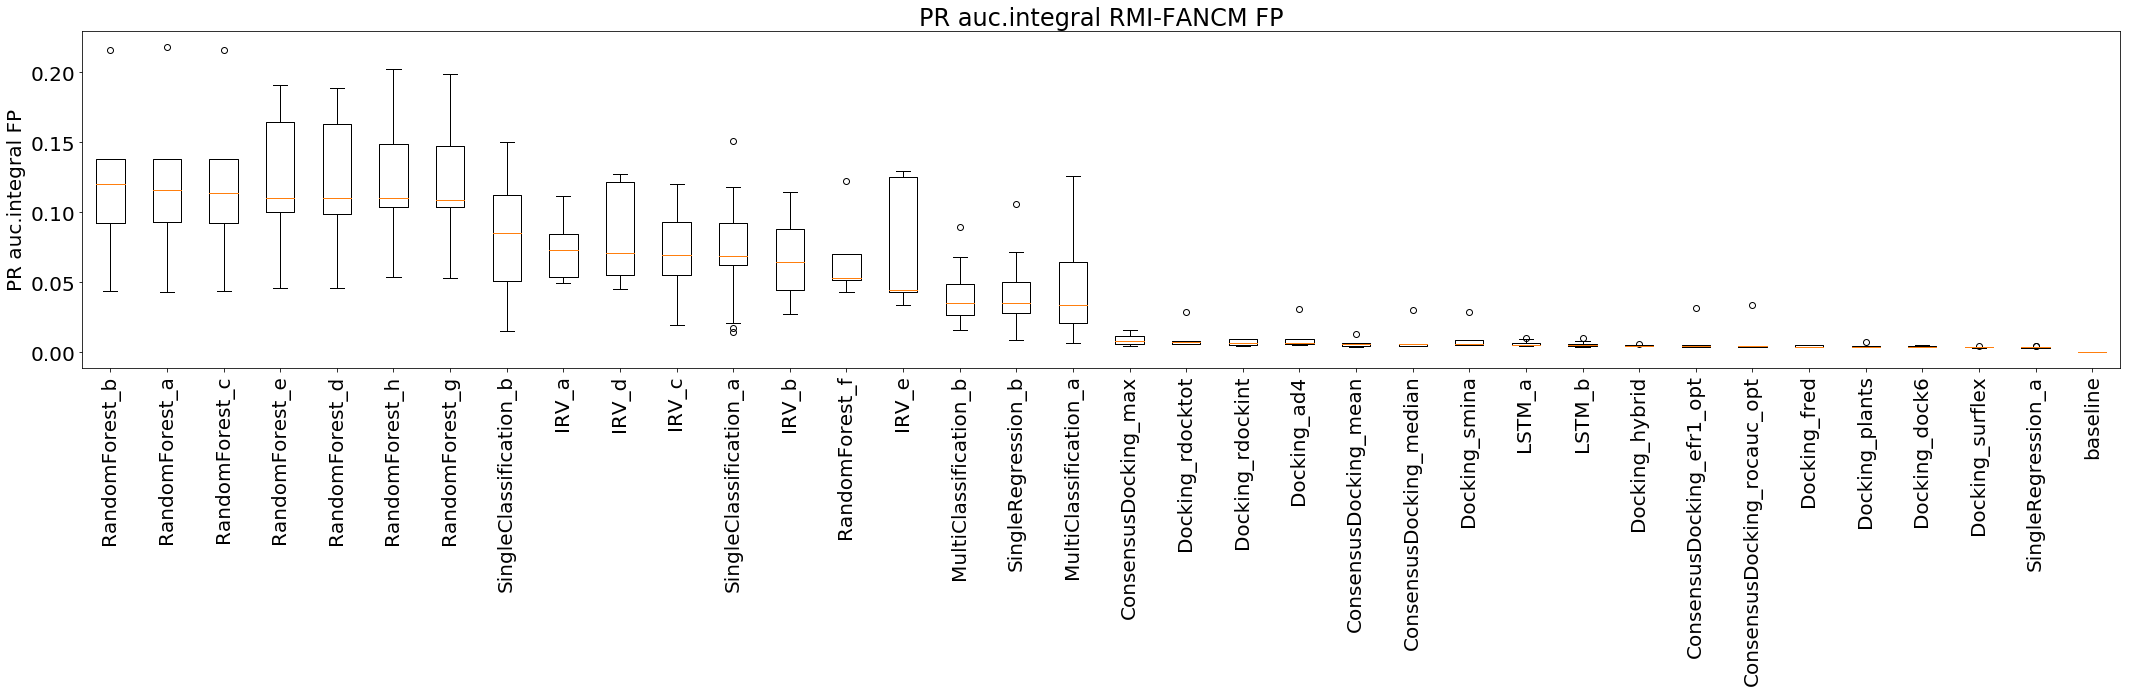

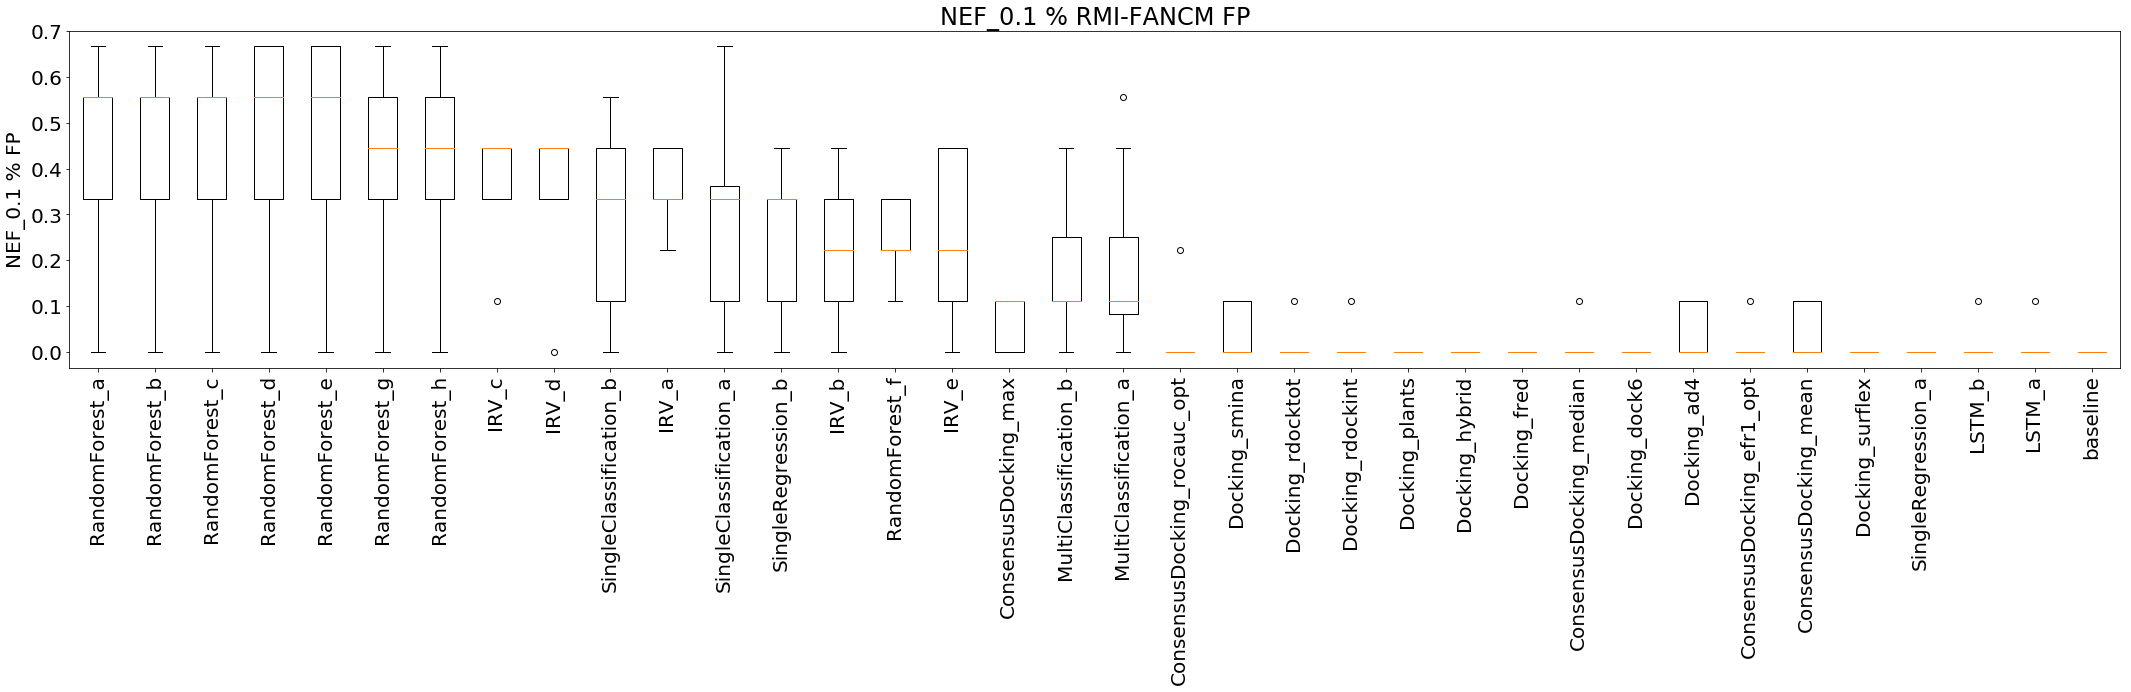

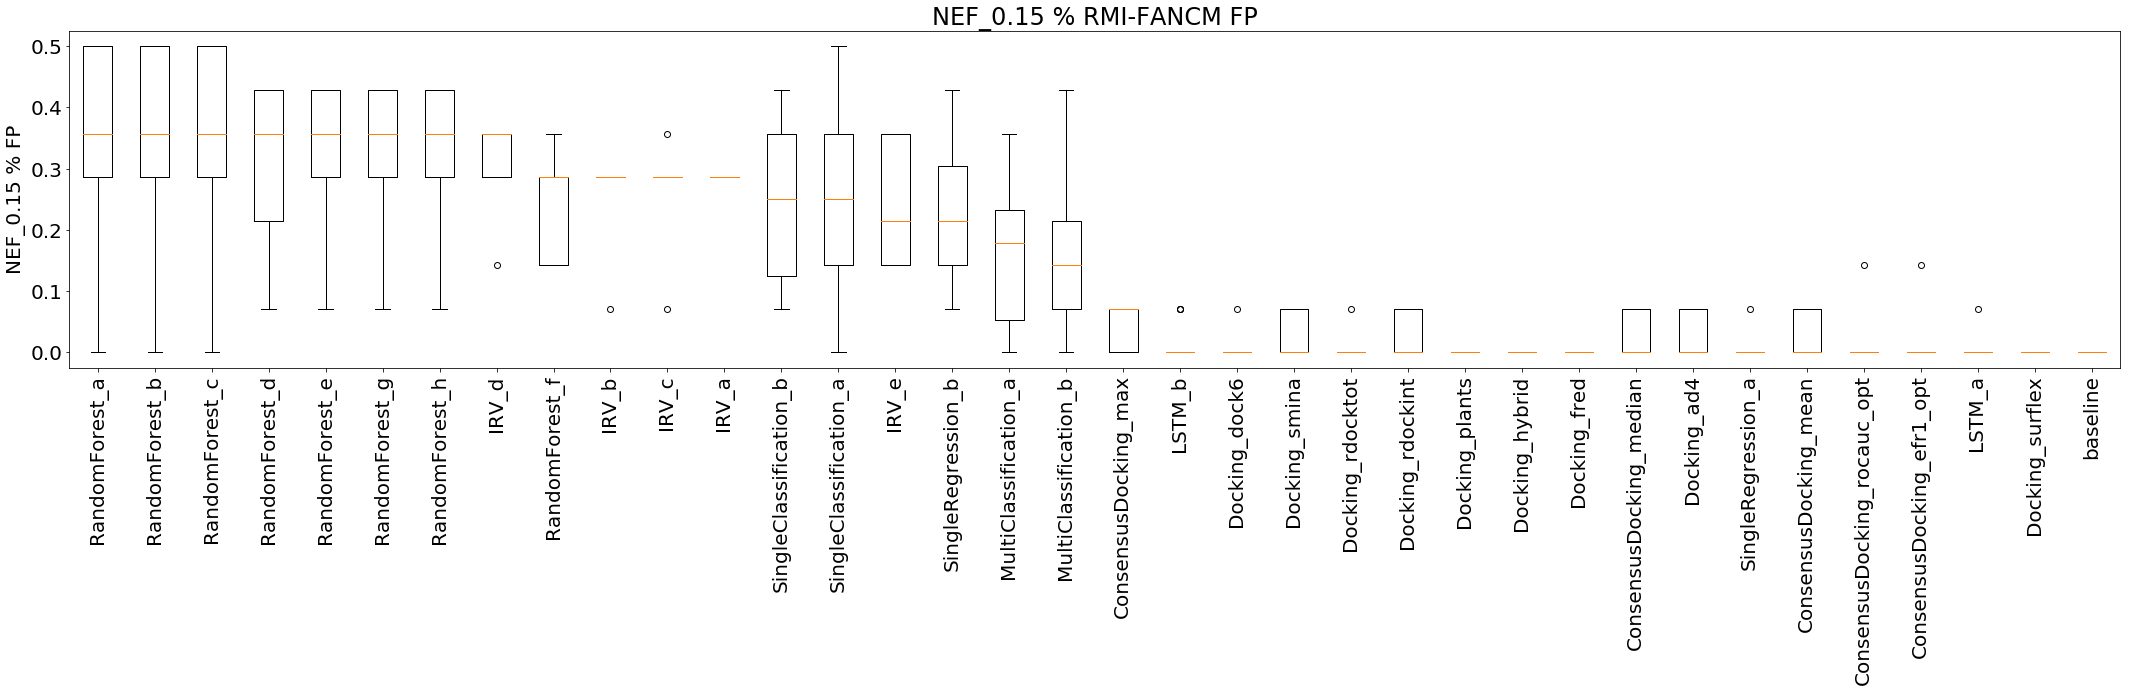

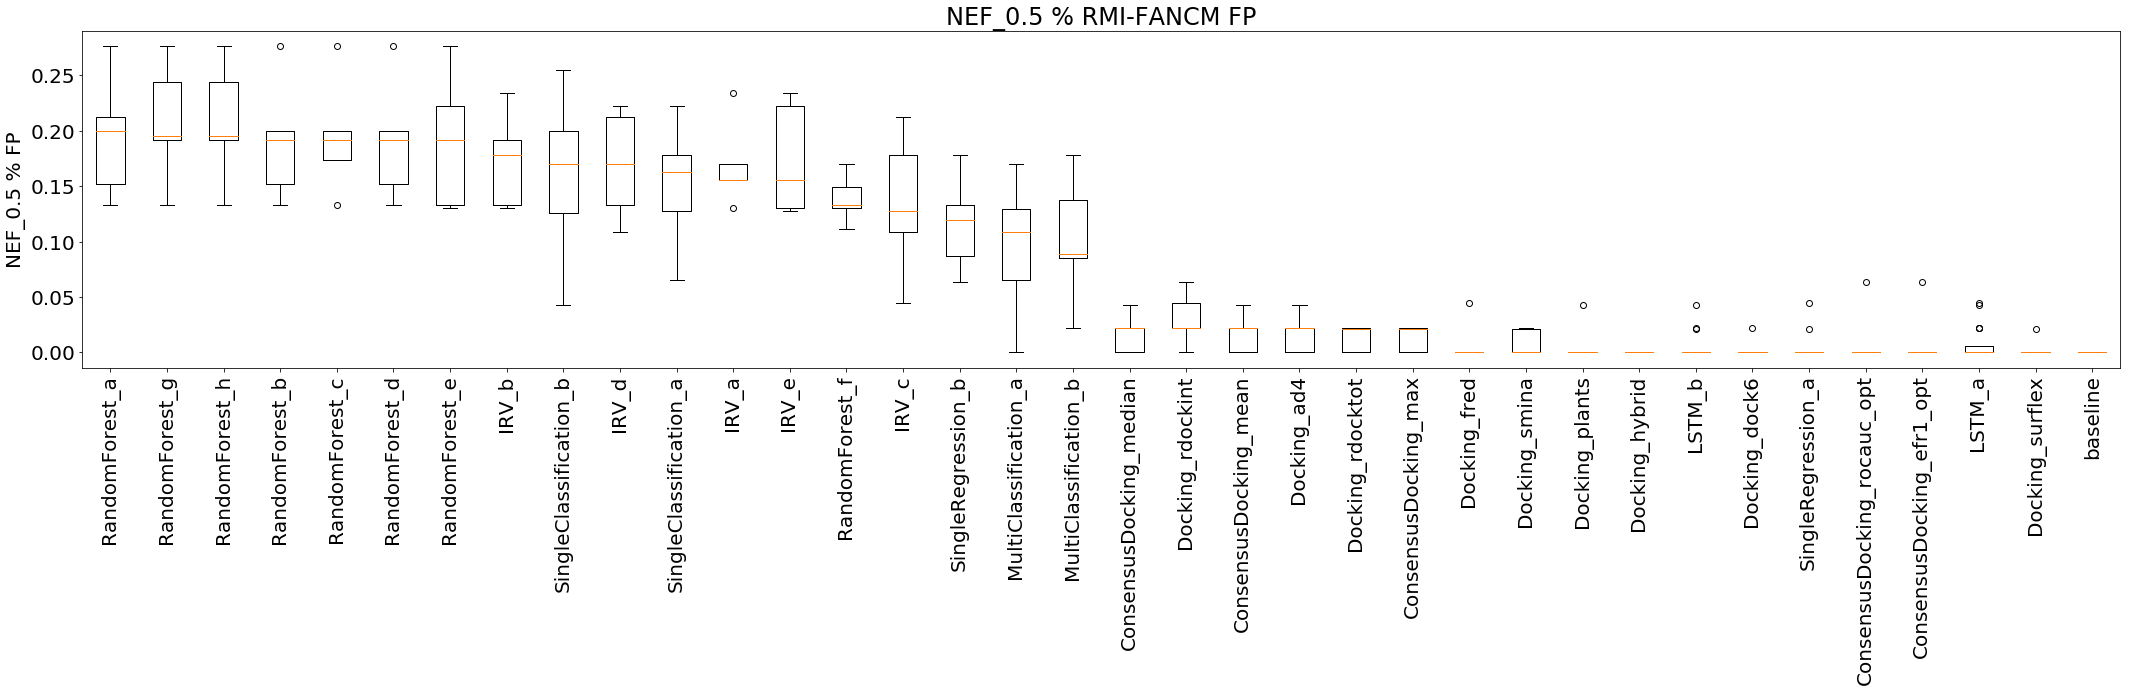

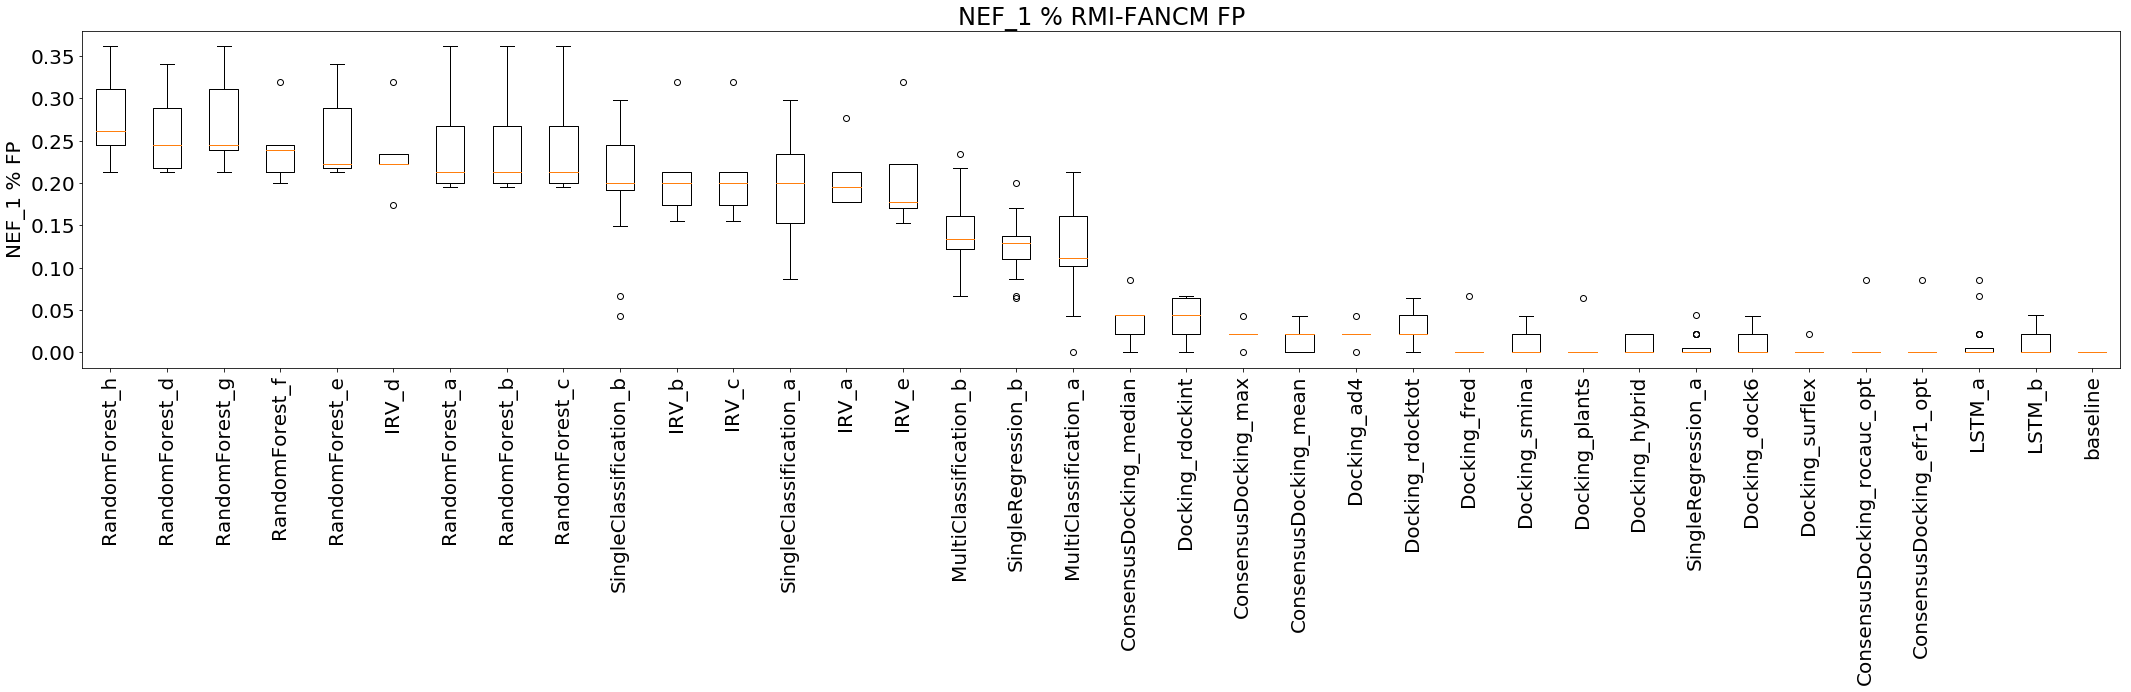

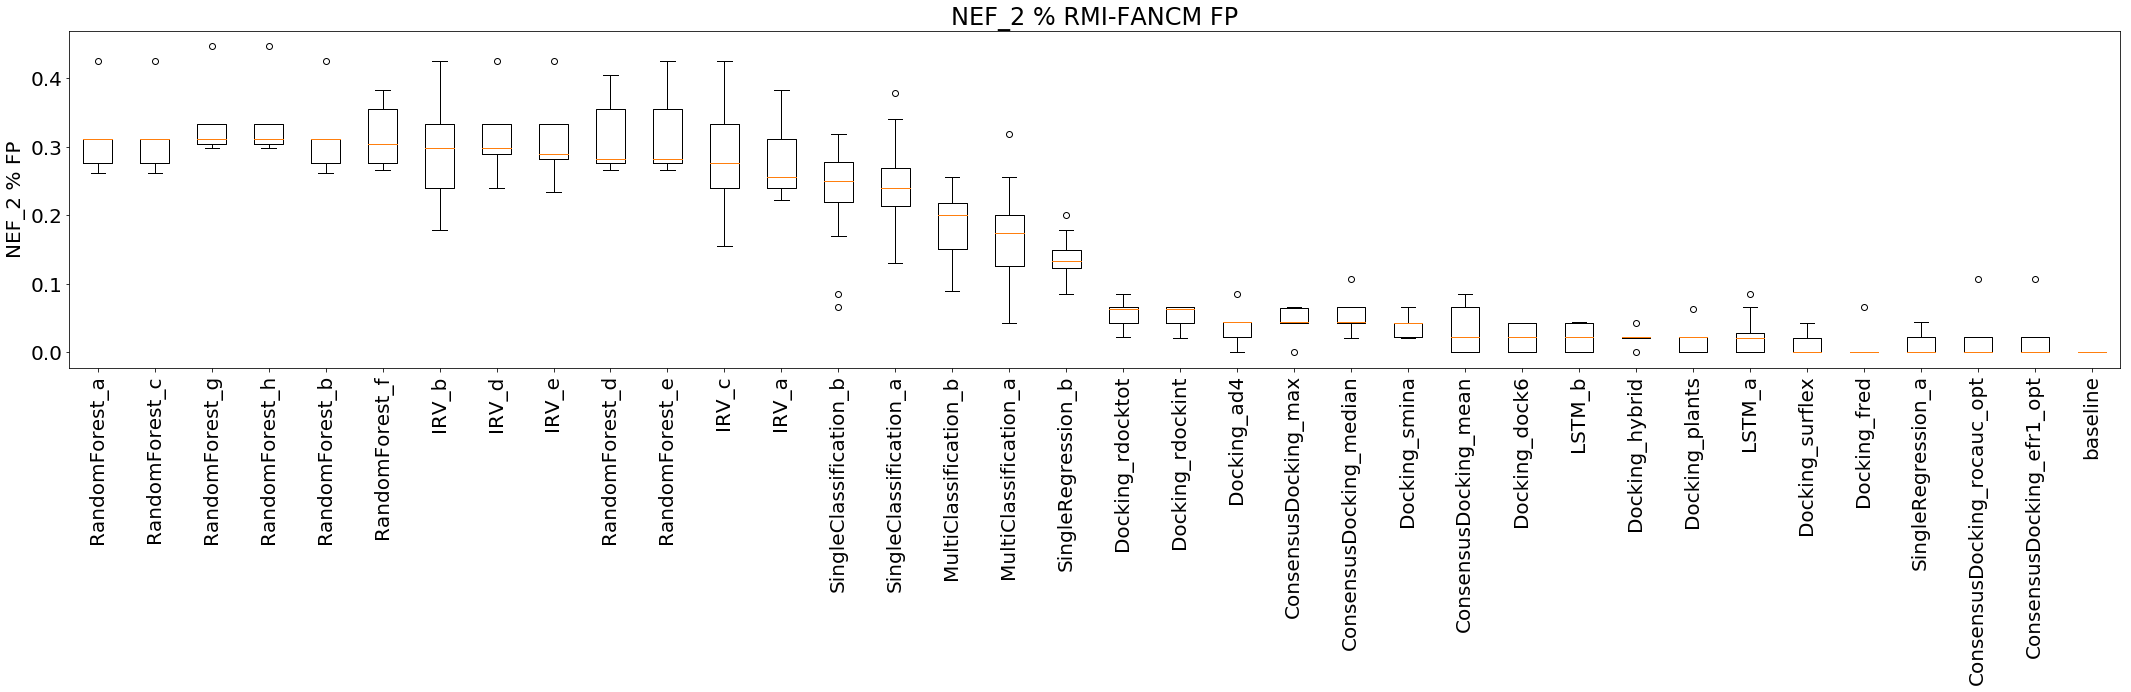

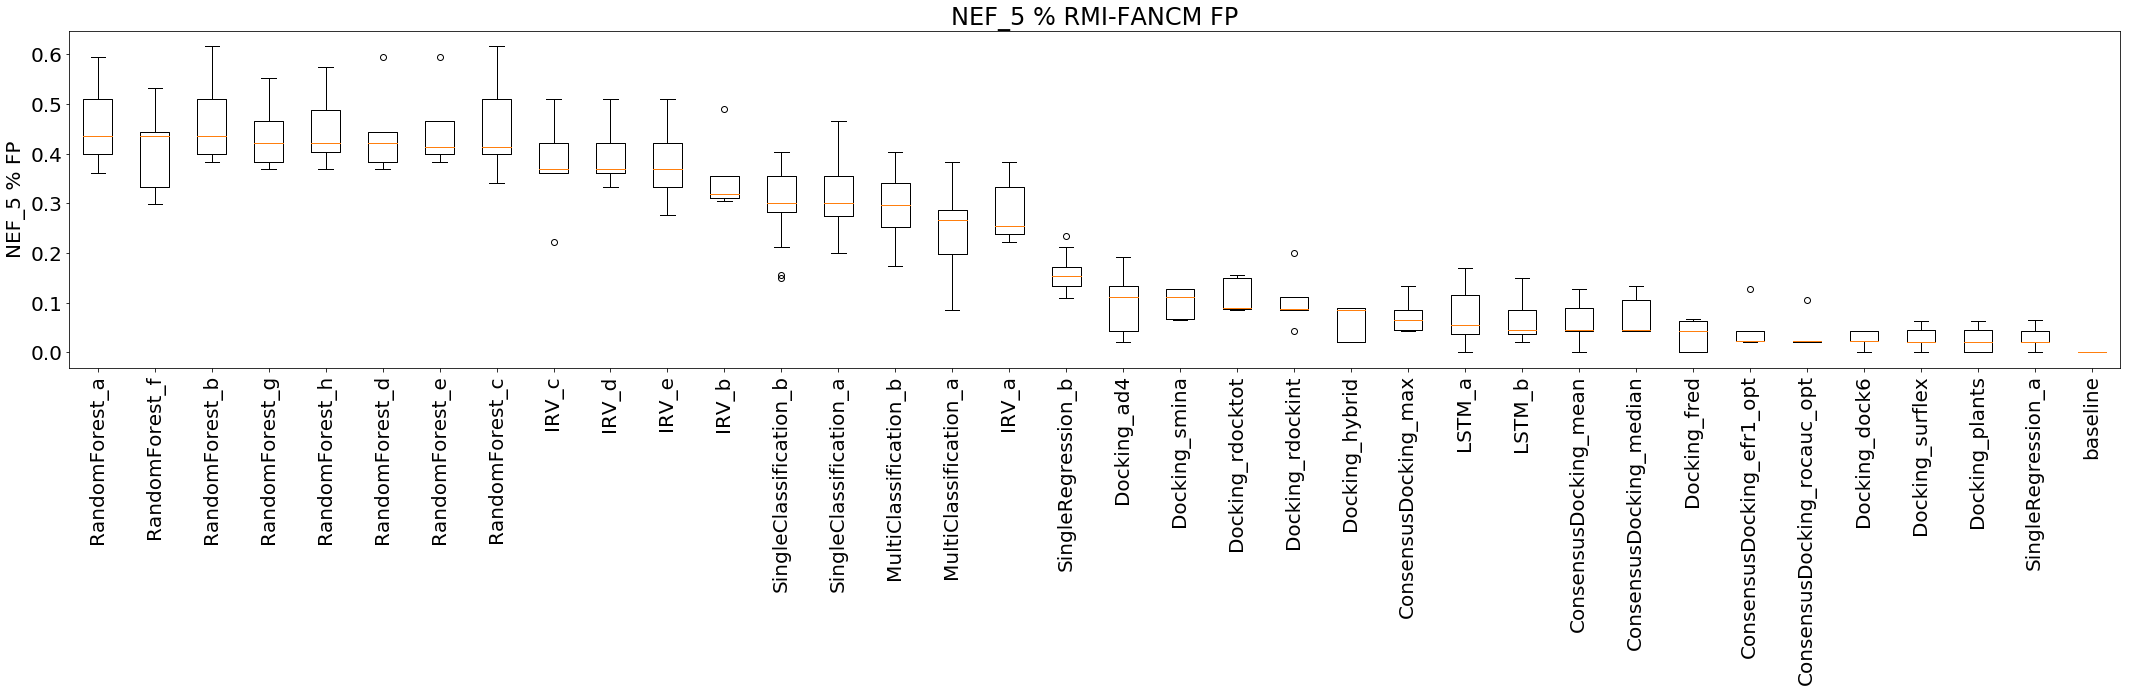

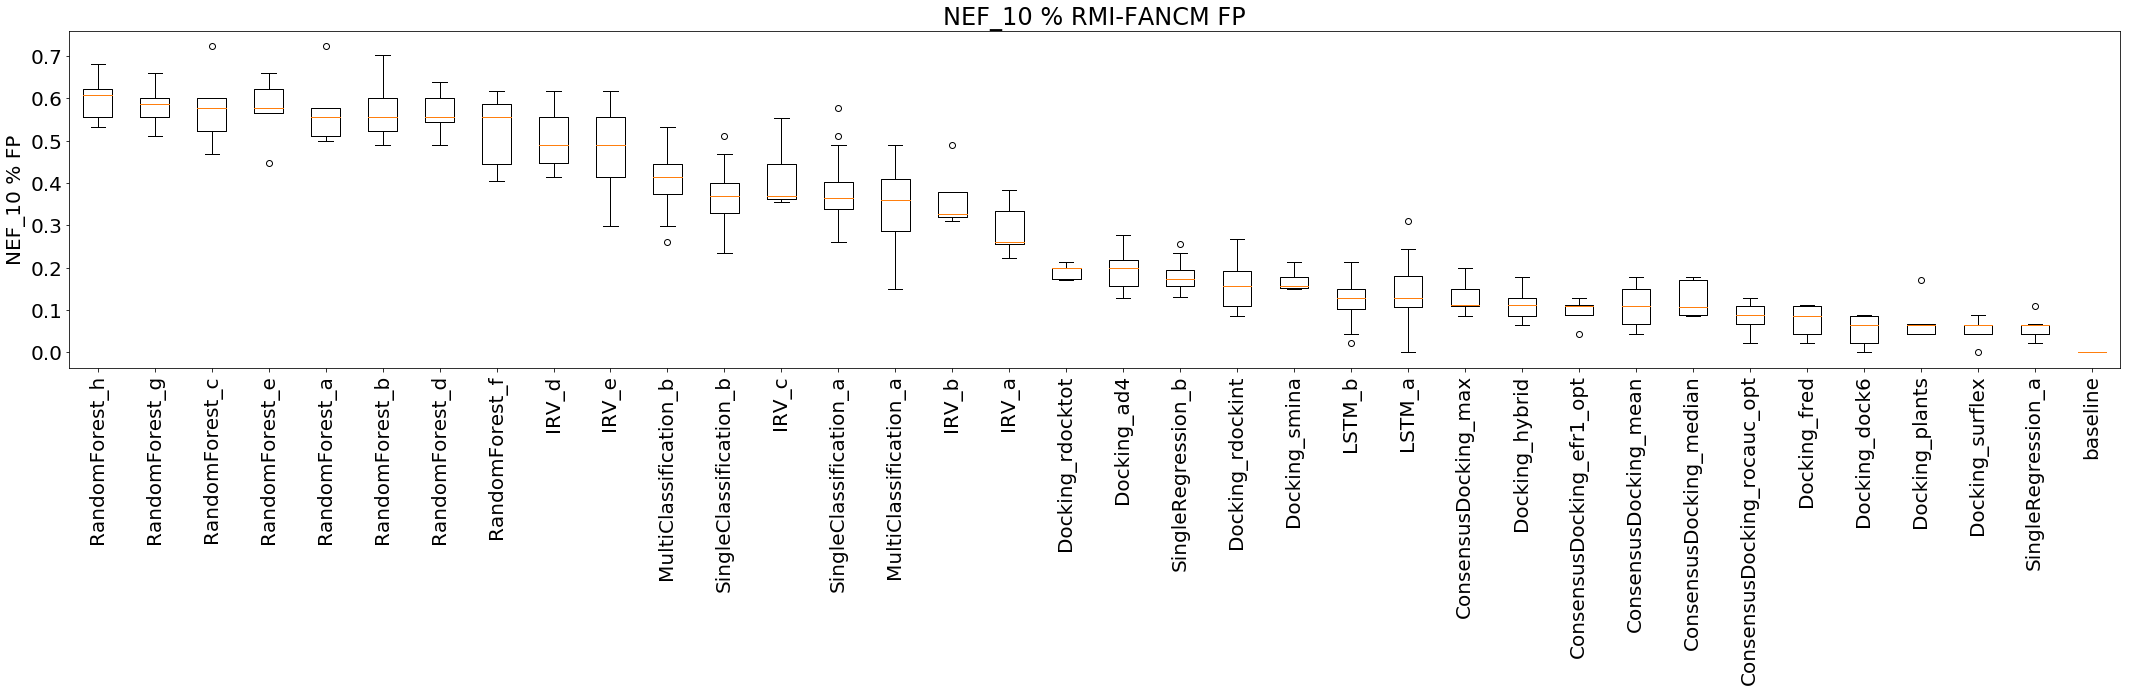

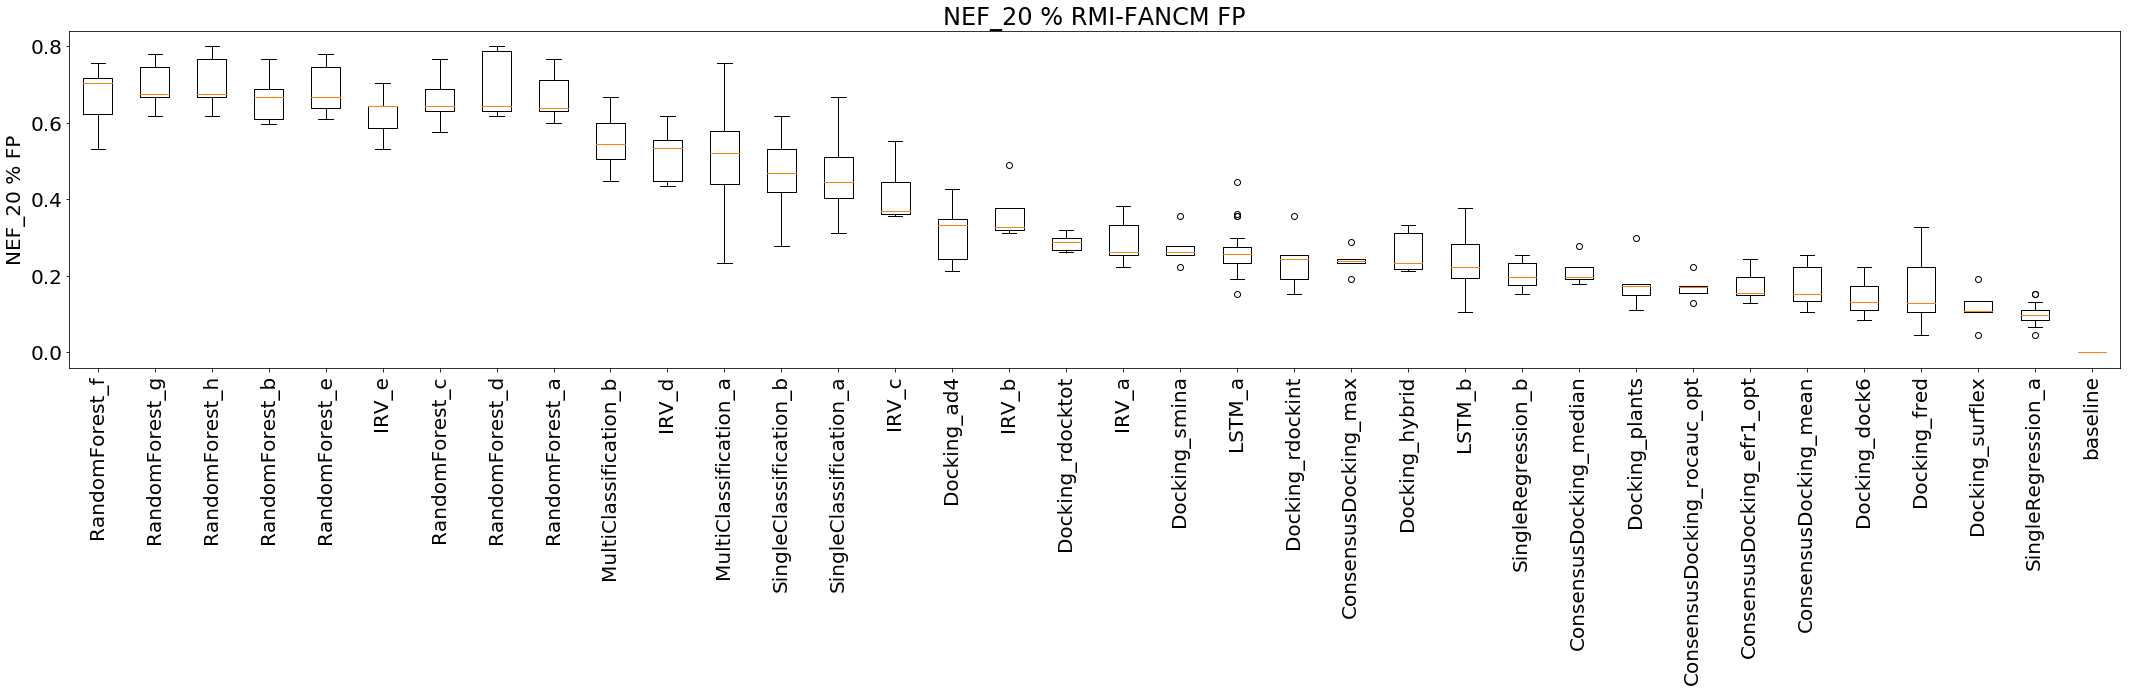

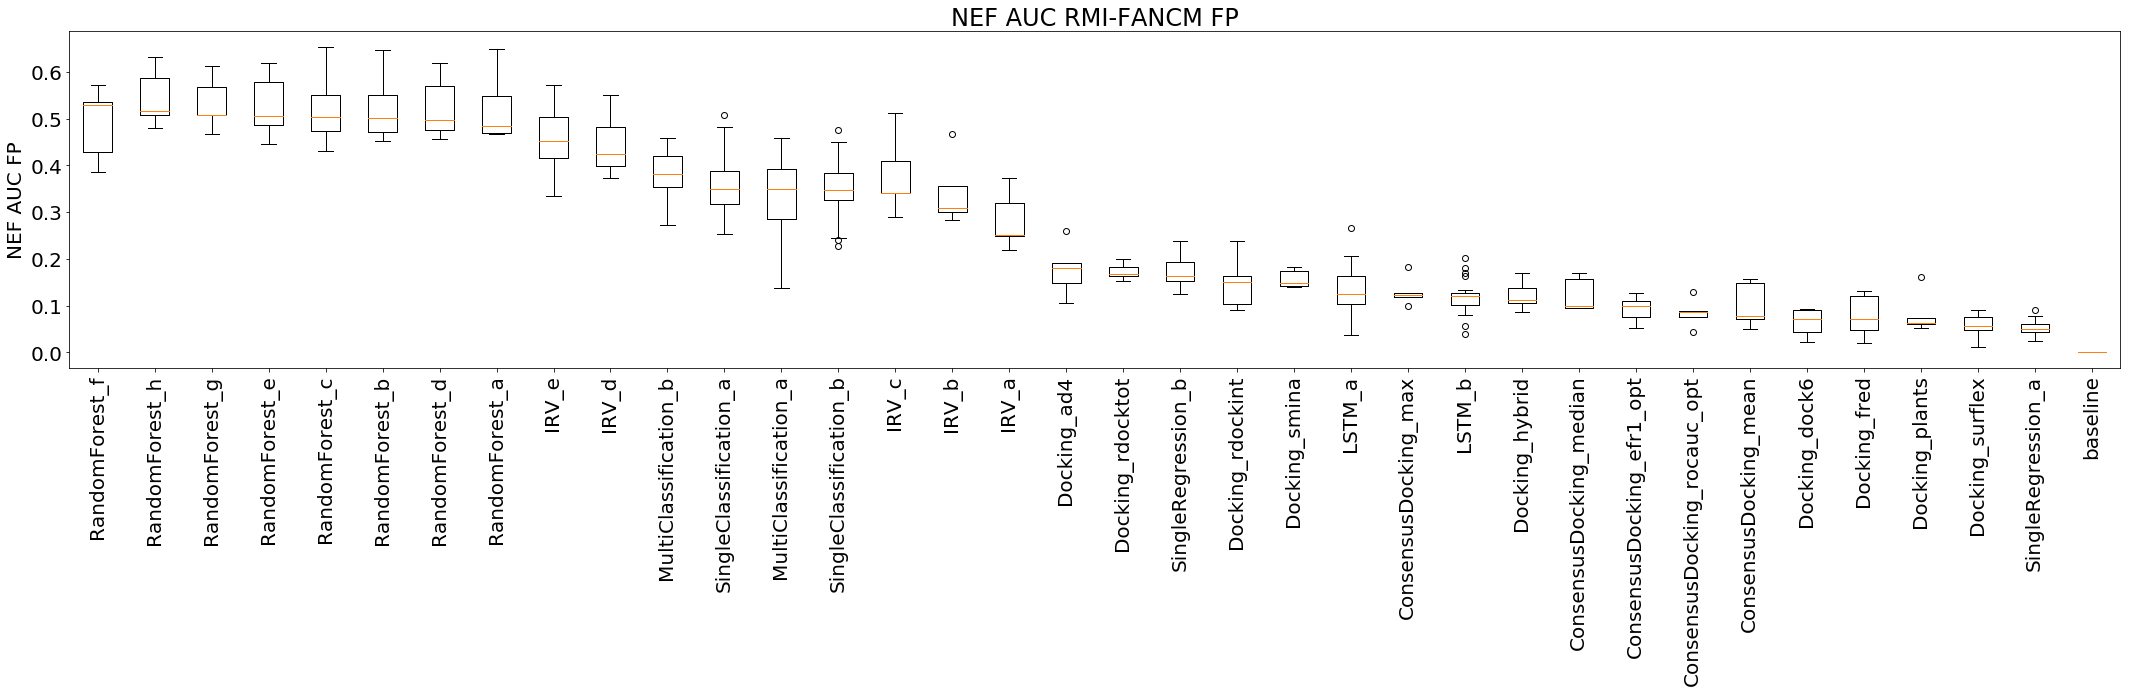

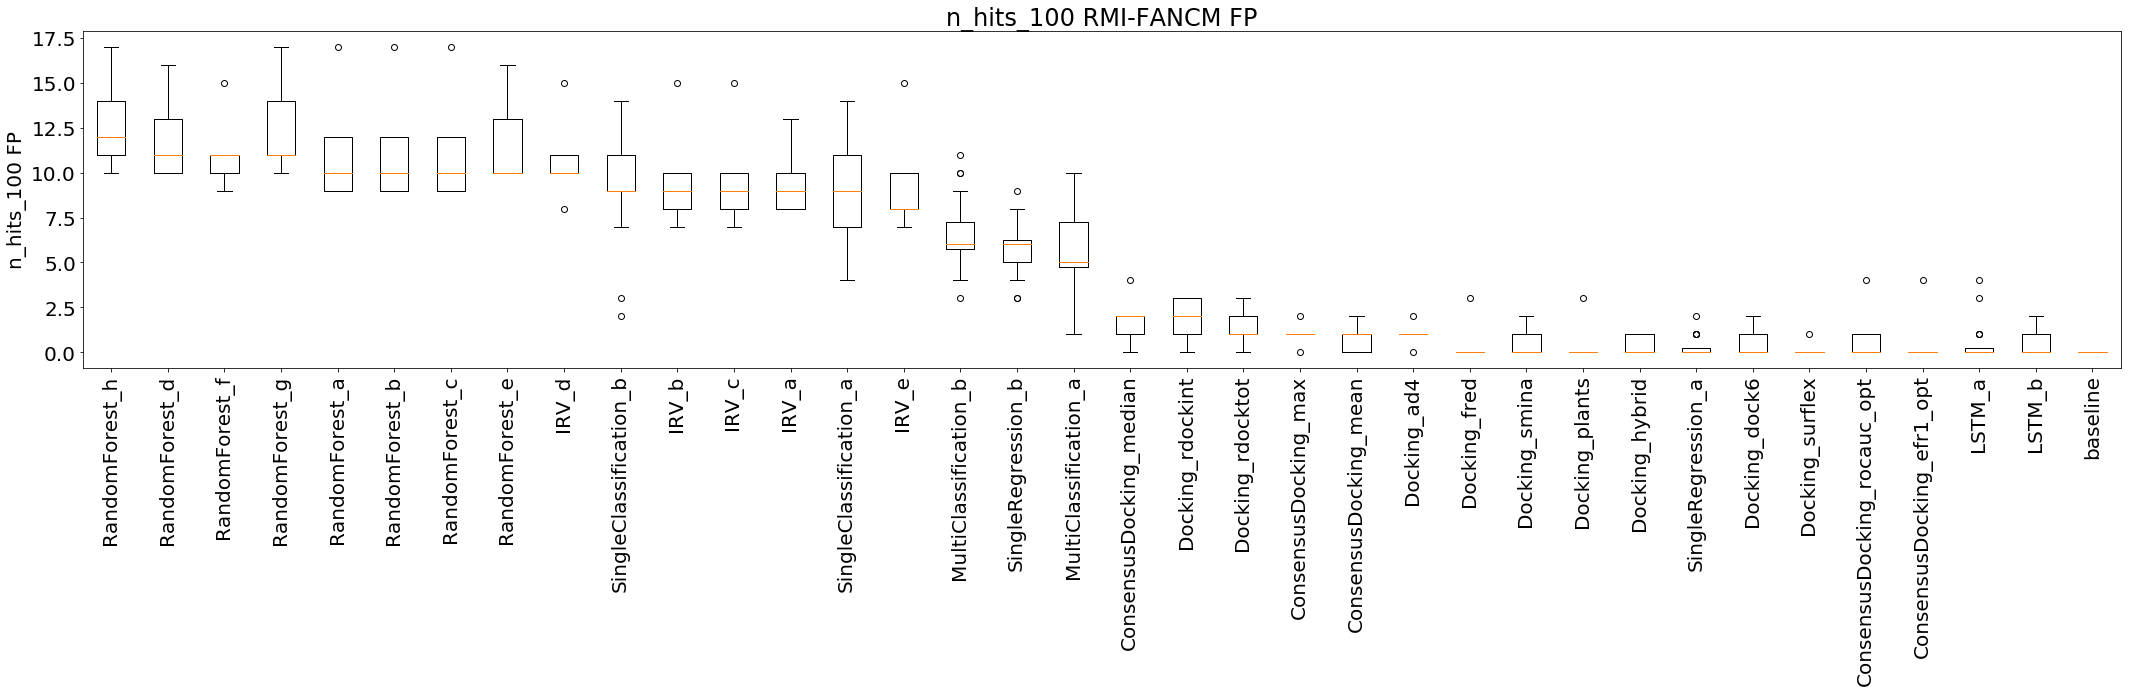

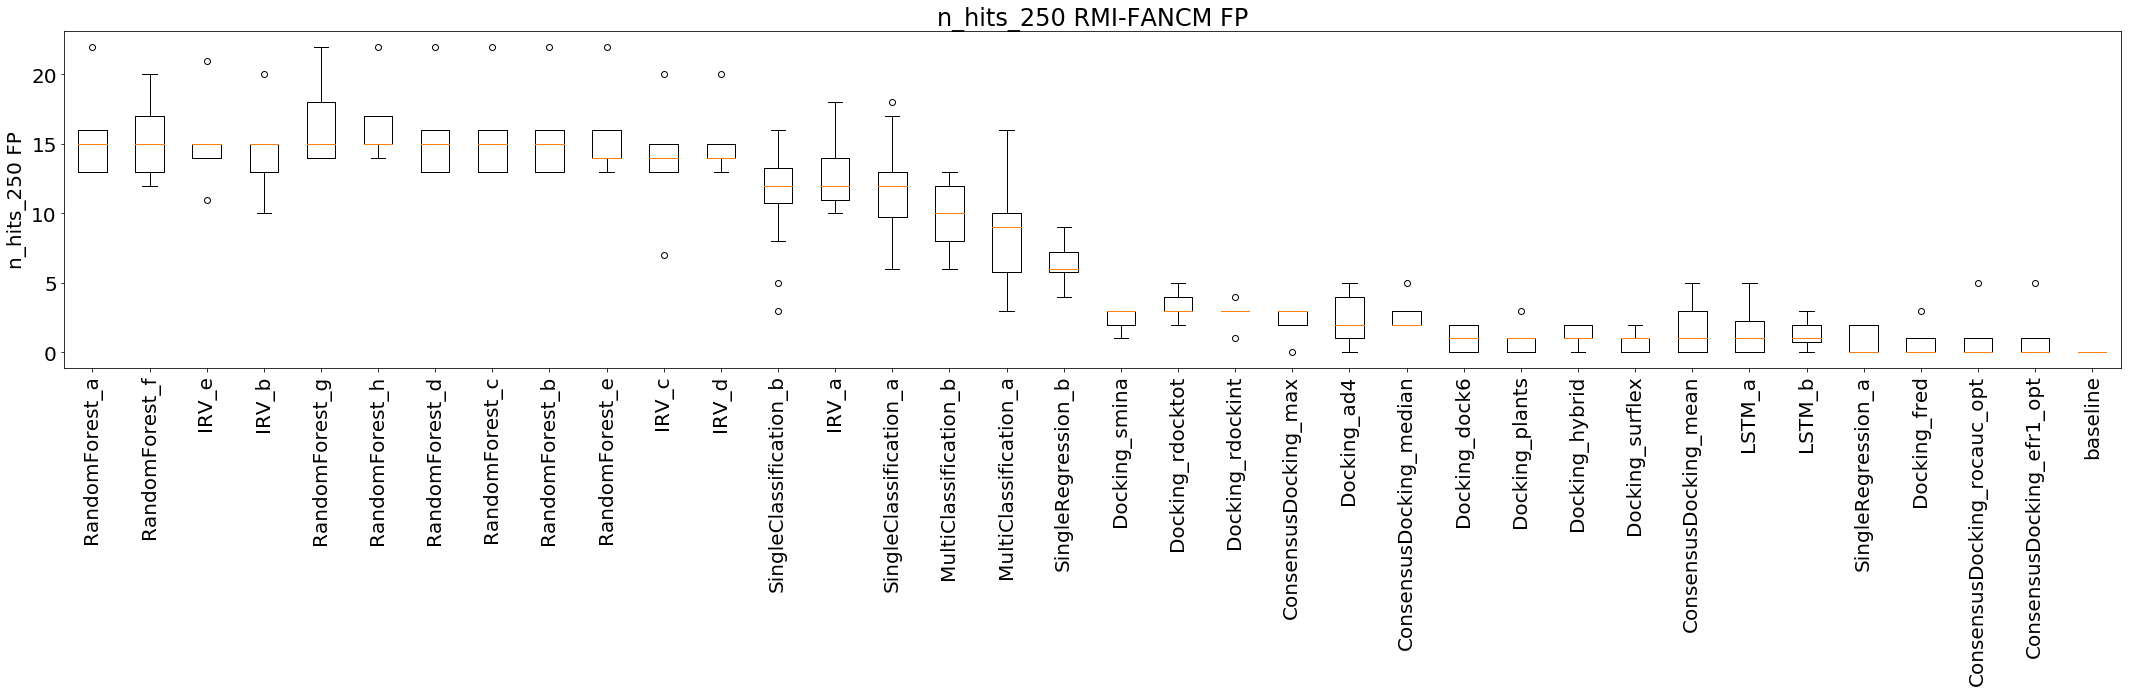

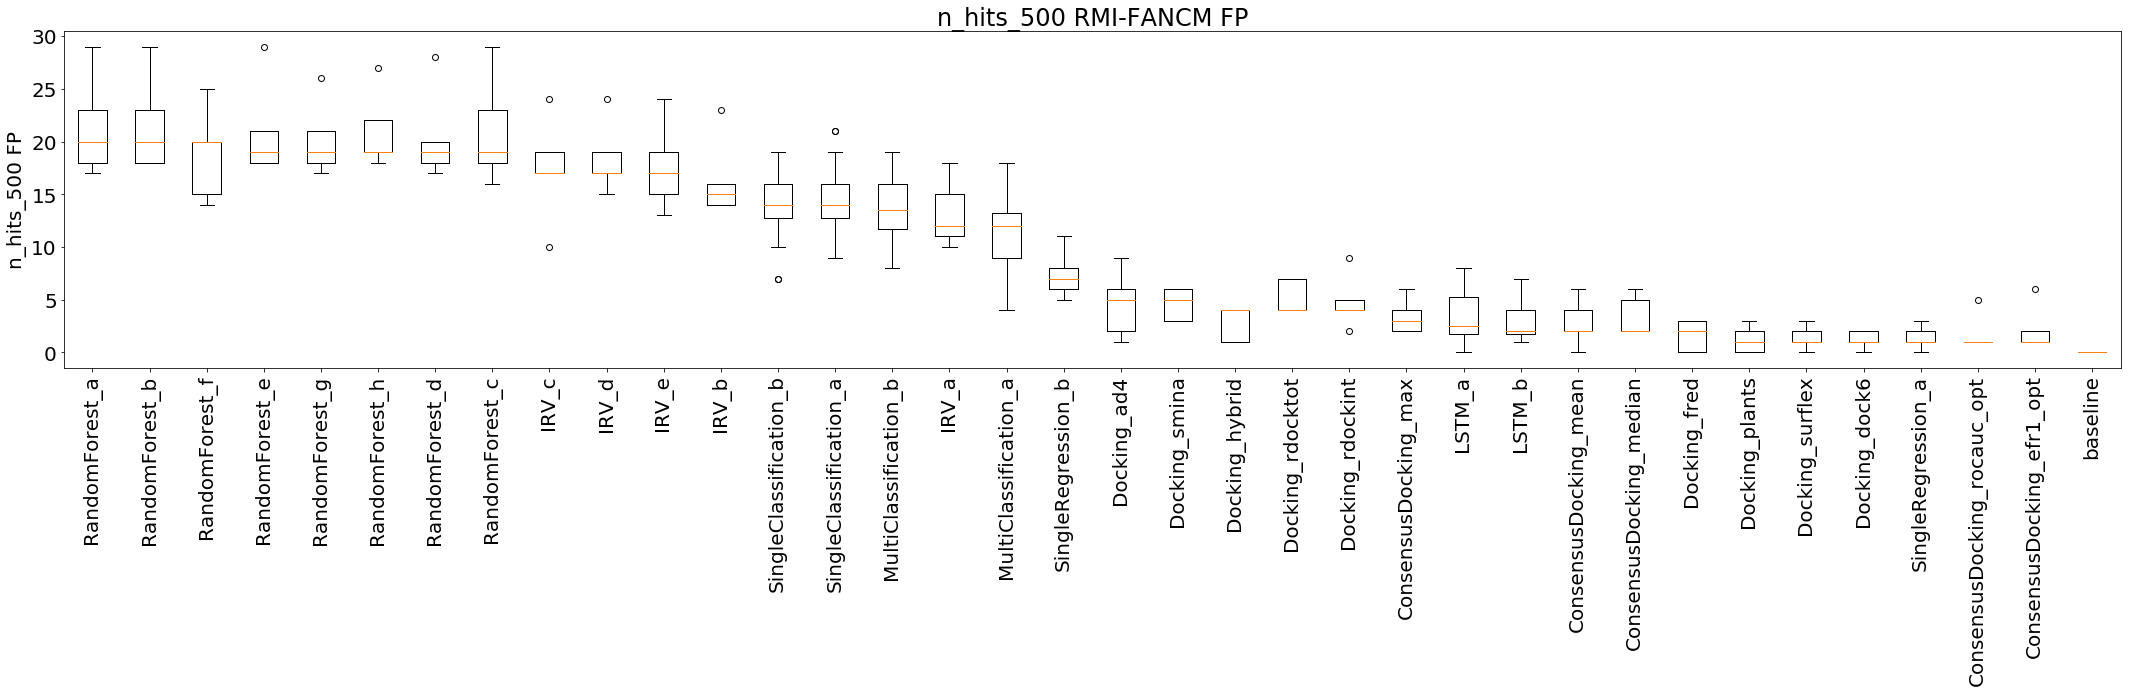

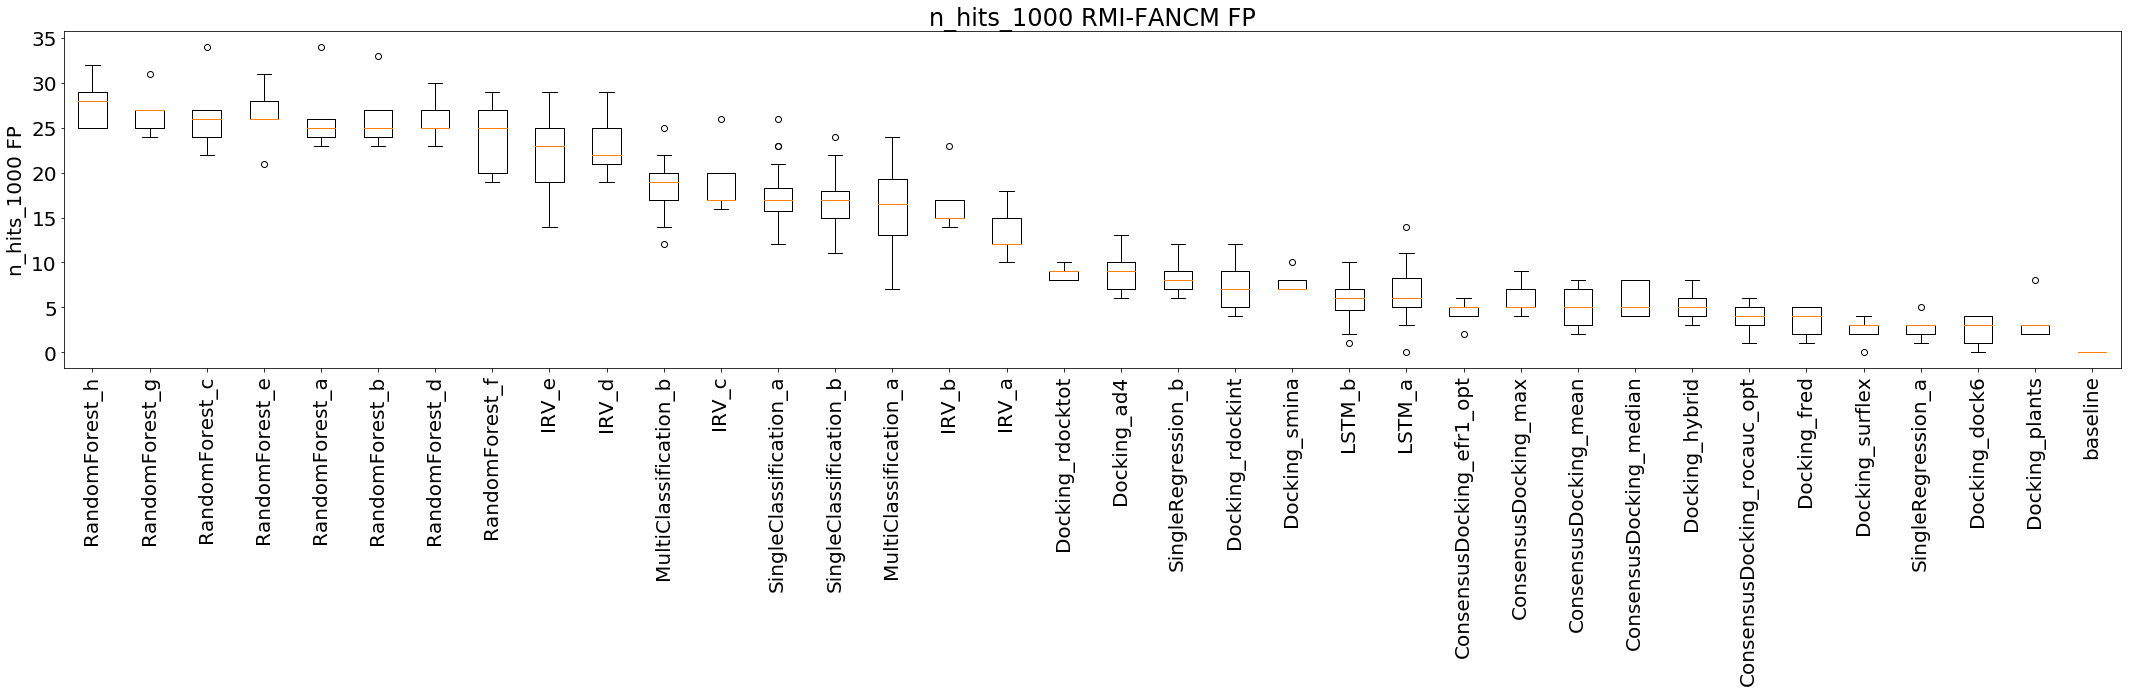

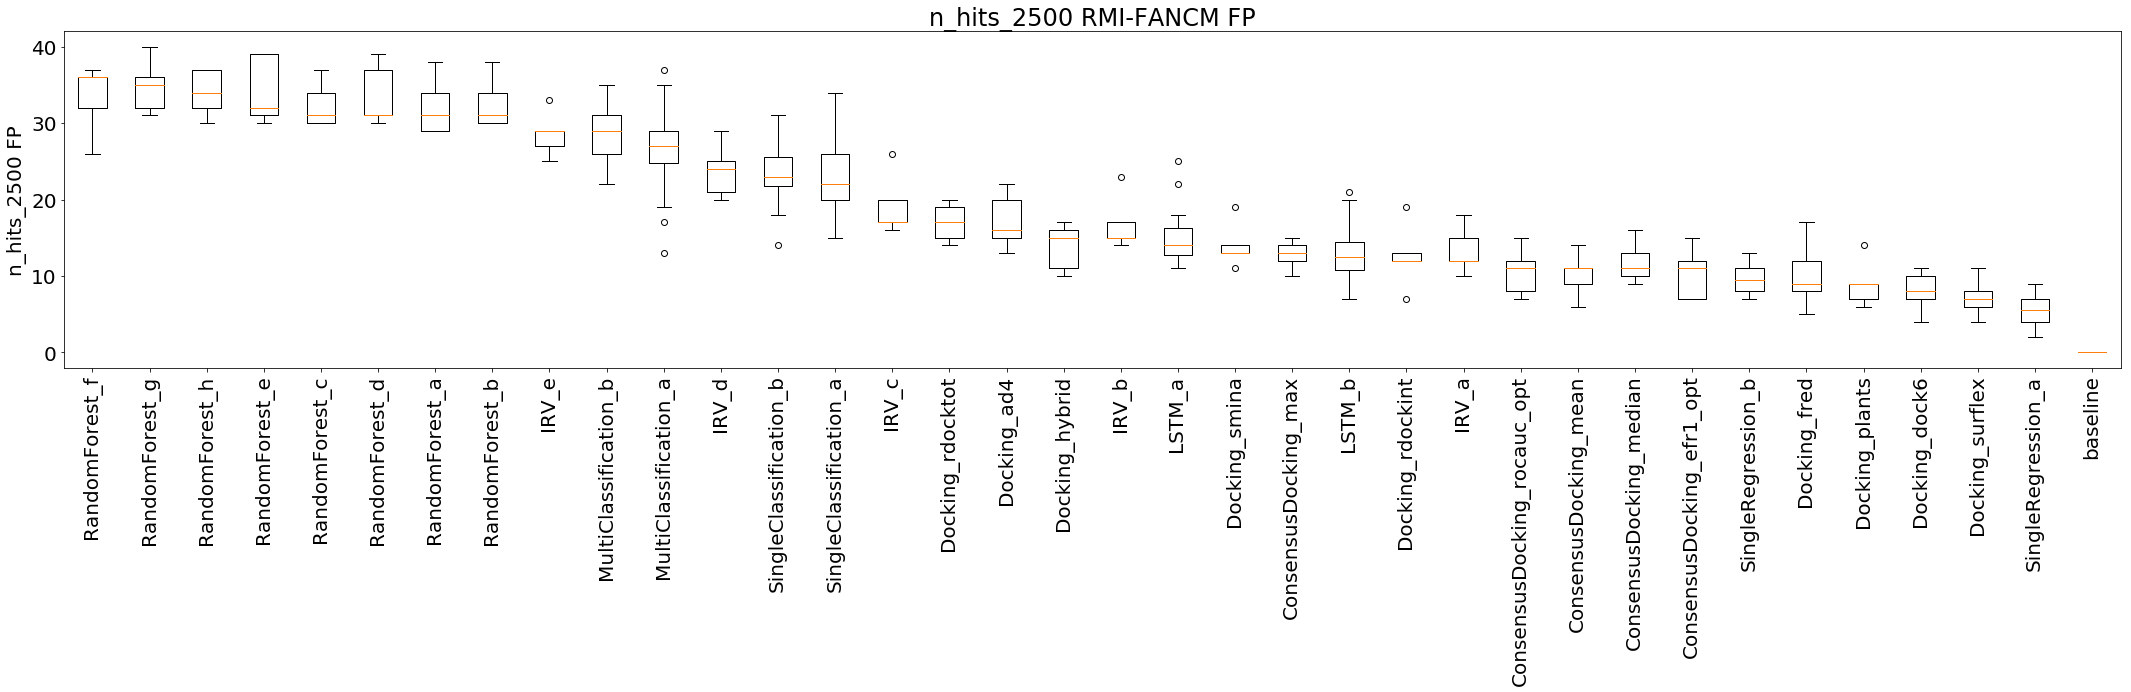

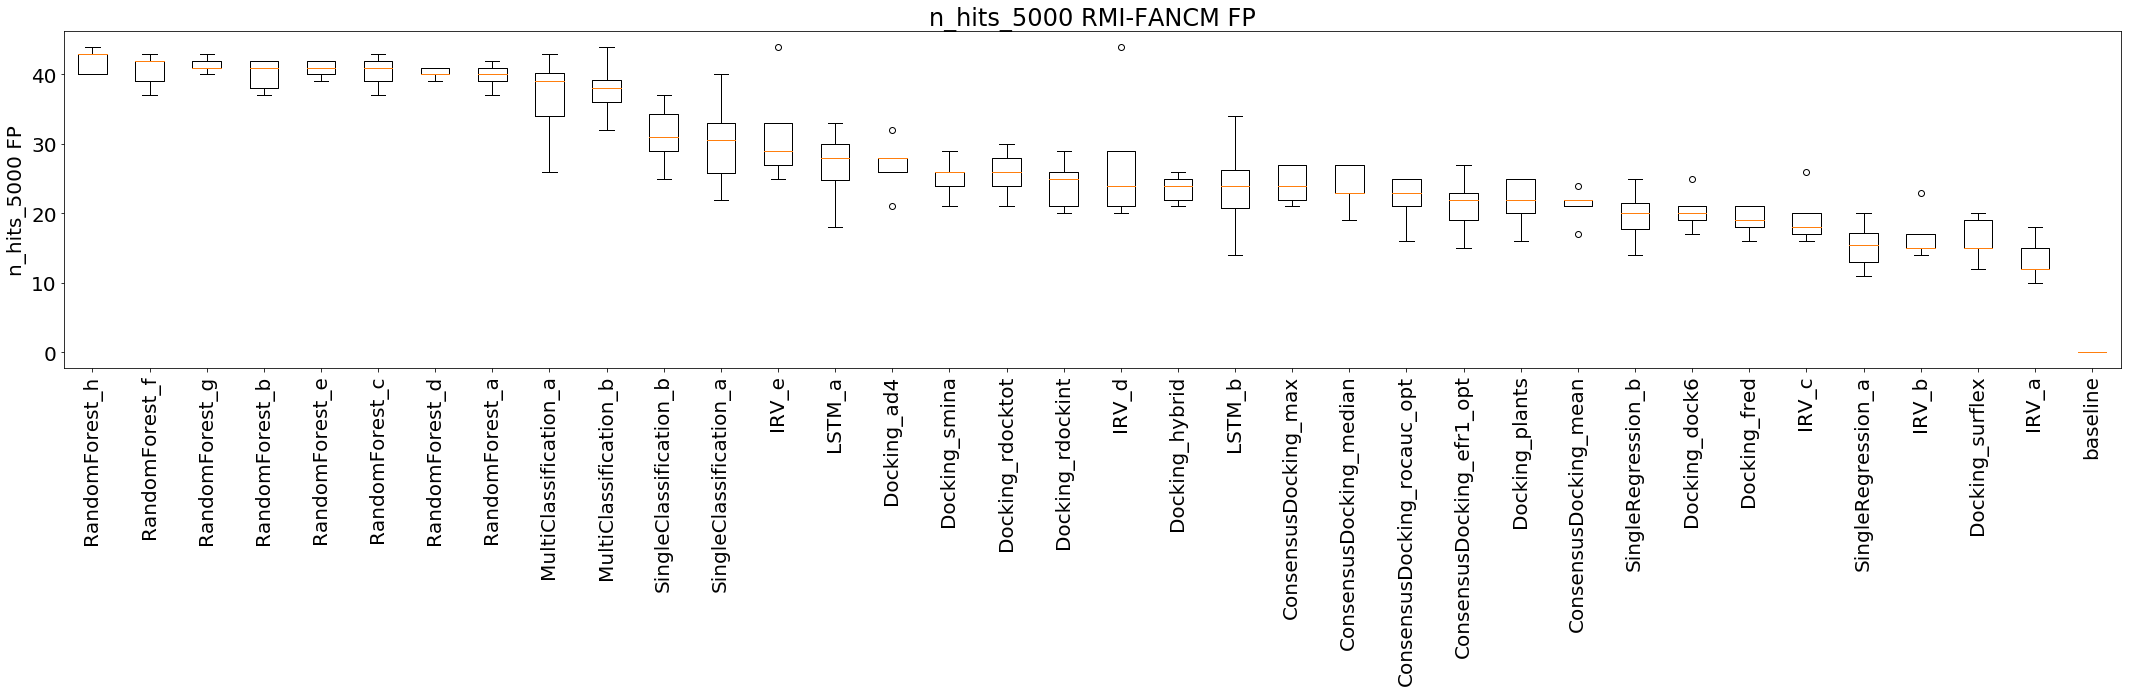

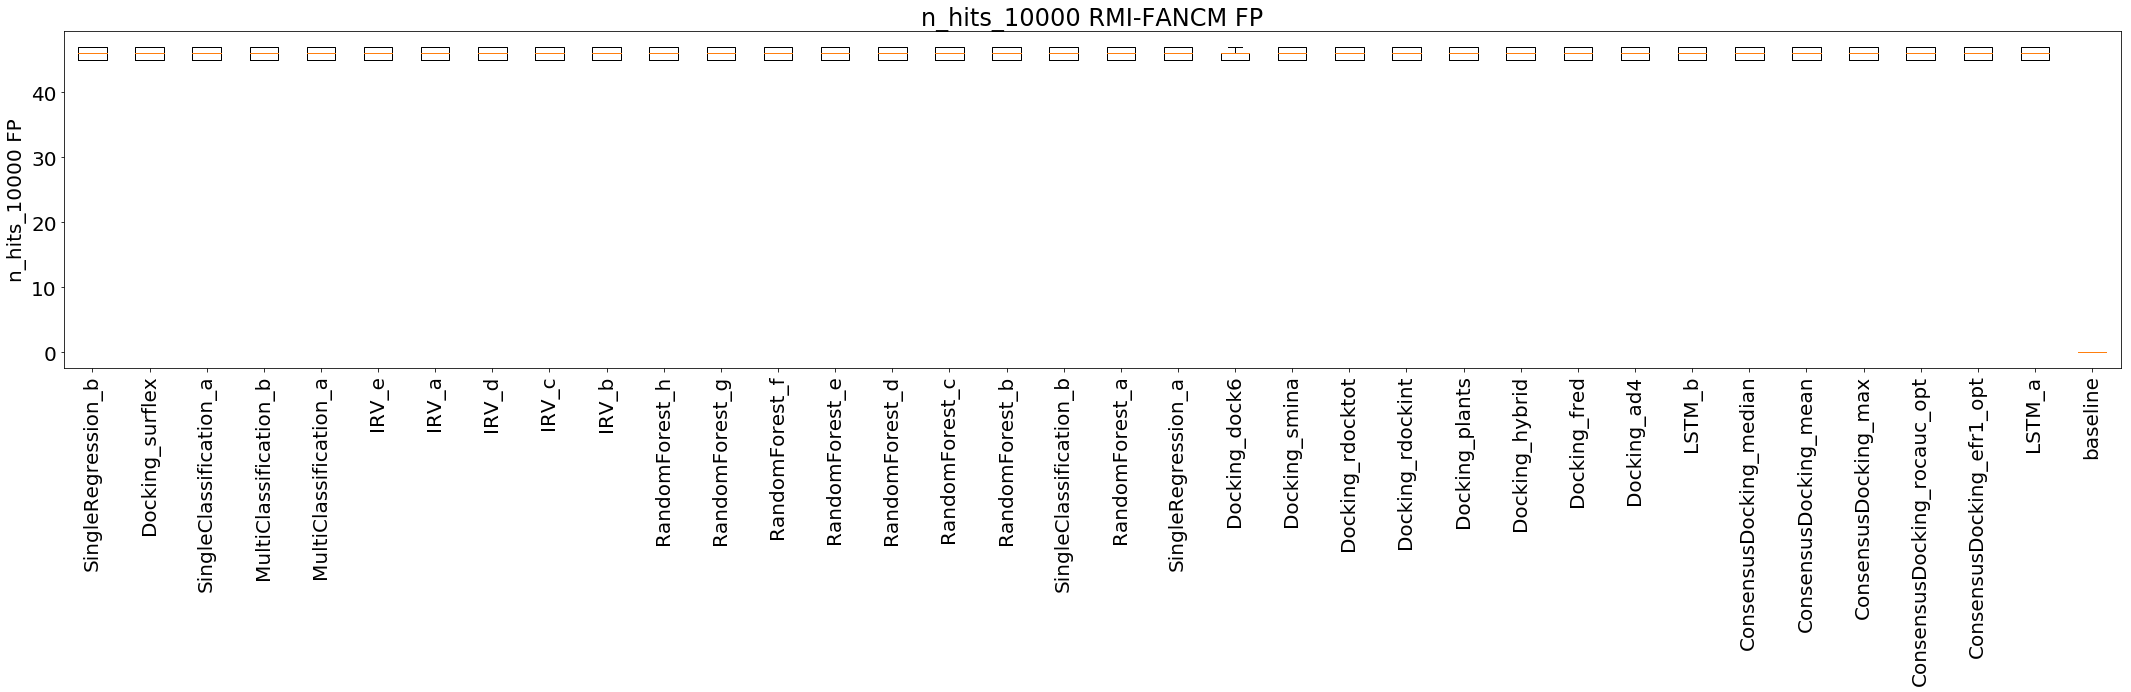

In [11]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/cv_boxplots/'
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)

---
### DTK + Means Tables

In [12]:
agg_comp_dict_dtk_means = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=1, median_w=0, tukey_w=1)
ordered_df = get_model_ordering(agg_comp_dict_dtk_means, metric_names)
ordered_df

ROC AUC PriA-SSB AS                ROC AUC PriA-SSB FP               ROC AUC RMI-FANCM FP             BEDROC AUC PriA-SSB AS             BEDROC AUC PriA-SSB FP            BEDROC AUC RMI-FANCM FP        PR auc.integral PriA-SSB AS        PR auc.integral PriA-SSB FP       PR auc.integral RMI-FANCM FP              NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP             NEF_0.1 % RMI-FANCM FP             NEF_0.15 % PriA-SSB AS             NEF_0.15 % PriA-SSB FP            NEF_0.15 % RMI-FANCM FP              NEF_0.5 % PriA-SSB AS              NEF_0.5 % PriA-SSB FP             NEF_0.5 % RMI-FANCM FP                NEF_1 % PriA-SSB AS                NEF_1 % PriA-SSB FP               NEF_1 % RMI-FANCM FP                NEF_2 % PriA-SSB AS                NEF_2 % PriA-SSB FP               NEF_2 % RMI-FANCM FP                NEF_5 % PriA-SSB AS                NEF_5 % PriA-SSB FP               NEF_5 % RMI-FANCM FP               NEF_10 % PriA-SSB AS  \
0                 RandomForest_e, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0        SingleClassification_b, 1.0            SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_a, 1.0           SingleRegression_a, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0                         IRV_c, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_b, 1.0                RandomForest_h, 1.0   
1                 RandomForest_d, 2.0            SingleRegression_b, 2.0                RandomForest_g, 2.0                RandomForest_g, 2.0            SingleRegression_a, 2.0                RandomForest_g, 2.0         MultiClassification_b, 2.0            SingleRegression_a, 2.0        SingleClassification_a, 2.0                         IRV_d, 2.0                        IRV_b, 1.0                RandomForest_e, 2.0                RandomForest_a, 2.0                         IRV_d, 2.0                RandomForest_c, 2.0                RandomForest_a, 2.0                RandomForest_d, 2.0                RandomForest_g, 1.0                RandomForest_e, 2.0            SingleRegression_a, 2.0                RandomForest_g, 2.0                RandomForest_g, 1.0                         IRV_e, 1.0                RandomForest_g, 2.0                RandomForest_g, 1.0            SingleRegression_b, 2.0                RandomForest_h, 1.0                RandomForest_d, 1.0   
2                 RandomForest_h, 3.0                RandomForest_h, 3.0                RandomForest_e, 3.0                RandomForest_d, 3.0                RandomForest_g, 3.0                RandomForest_e, 3.0                RandomForest_g, 3.0                RandomForest_g, 3.0                RandomForest_h, 2.0                         IRV_c, 3.0       SingleClassification_b, 3.0                RandomForest_d, 2.0                         IRV_e, 3.0                RandomForest_h, 2.0                RandomForest_a, 2.0                RandomForest_d, 3.0                RandomForest_h, 2.0                RandomForest_c, 3.0                RandomForest_d, 2.0                         IRV_e, 3.0                RandomForest_d, 3.0                RandomForest_e, 3.0            SingleRegression_b, 3.0                RandomForest_f, 3.0                RandomForest_d, 3.0                RandomForest_g, 3.0                RandomForest_a, 3.0                RandomForest_g, 3.0   
3                 RandomForest_c, 4.0                RandomForest_e, 4.0      